![](img/name.png)

# What is namespace:

A namespace is a system that has a unique name for each and every object in Python. An object might be a variable or a method. Python itself maintains a namespace in the form of a Python dictionary. Let’s go through an example, a directory-file system structure in computers. Needless to say, that one can have multiple directories having a file with the same name inside every directory. But one can get directed to the file, one wishes, just by specifying the absolute path to the file. 
Real-time example, the role of a namespace is like a surname. One might not find a single “Alice” in the class there might be multiple “Alice” but when you particularly ask for “Alice Lee” or “Alice Clark” (with a surname), there will be only one (time being don’t think of both first name and surname are same for multiple students).
On similar lines, the Python interpreter understands what exact method or variable one is trying to point to in the code, depending upon the namespace. So, the division of the word itself gives a little more information. Its Name (which means name, a unique identifier) + Space(which talks something related to scope). Here, a name might be of any Python method or variable and space depends upon the location from where is trying to access a variable or a method.

# Types of namespaces :
 
When Python interpreter runs solely without any user-defined modules, methods, classes, etc. Some functions like print(), id() are always present, these are built-in namespaces. When a user creates a module, a global namespace gets created, later the creation of local functions creates the local namespace. The built-in namespace encompasses the global namespace and the global namespace encompasses the local namespace.

![](img/types_namespace-1.png)

# The lifetime of a namespace :
 
A lifetime of a namespace depends upon the scope of objects, if the scope of an object ends, the lifetime of that namespace comes to an end. Hence, it is not possible to access the inner namespace’s objects from an outer namespace

In [ ]:
# var1 is in the global namespace
var1 = 5
def some_func():
 
    # var2 is in the local namespace
    var2 = 6
    def some_inner_func():
 
        # var3 is in the nested local
        # namespace
        var3 = 7

![](img/namespaces.png)

# As shown in the above figure, the same object name can be present in multiple namespaces as isolation between the same name is maintained by their namespace.

In [2]:
# Python program processing
# global variable
 
count = 5
def some_method():
    global count
    count = count + 1
    print(count)
some_method()

6


#But in some cases, one might be interested in updating or processing global variables only, as shown in the following example, one should mark it explicitly as global and the update or process.   Note that the line “count = count +1” references the global variable and therefore uses the global variable, but compare this to the same line written “count = 1”.  Then the line “global count” is absolutely needed according to scope rules.

# Scope of Objects in Python :
 
Scope refers to the coding region from which a particular Python object is accessible. Hence one cannot access any particular object from anywhere from the code, the accessing has to be allowed by the scope of the object.
Let’s take an example to have a detailed understanding of the same: 

In [5]:
def some_func():
    print("Inside some_func")
    def some_inner_func():
        var = 10
        print("Inside inner function, value of var:",var)
    some_inner_func()
    print("Try printing var from outer function: ",var)
some_func()

Inside some_func
Inside inner function, value of var: 10


NameError: name 'var' is not defined

# Scope Resolution in Python | LEGB Rule

LEGB rule is used to decide the order in which the namespaces
 are to be searched for scope resolution. The scopes are listed below in terms of hierarchy(highest to lowest/narrowest to broadest):

Local(L): Defined inside function/class

Enclosed(E): Defined inside enclosing functions(Nested function concept)

Global(G): Defined at the uppermost level

Built-in(B): Reserved names in Python builtin modules

![](img/legb.png)

# Local Scope in Python
Local scope refers to variables defined in the current function. Always, a function will first look up a variable name in its local scope. Only if it does not find it there, the outer scopes are checked. 

In [6]:
# Local Scope
pi = 'global pi variable'
def inner():
    pi = 'inner pi variable'
    print(pi)
  
inner()

inner pi variable


# Local and Global Scopes in Python
If a variable is not defined in the local scope, then, it is 
 for in the higher scope, in this case, the global scope. 

 #expected the program prints out the value in the local scope on the execution of inner(). It is because it is defined inside the function and that is the first place where the variable is looked up. The pi value in global scope is printed on the execution of print(pi) on line 9.   

In [7]:
# Global Scope
pi = 'global pi variable'
def inner():
    pi = 'inner pi variable'
    print(pi)
  
inner()
print(pi)

inner pi variable
global pi variable


# Local, Enclosed, and Global Scopes in Python
For the enclosed scope, we need to define an outer function enclosing the inner function, comment out the local pi variable of the inner function and refer to pi using the nonlocal keyword. 

In [8]:
# Enclosed Scope
pi = 'global pi variable'
  
def outer():
    pi = 'outer pi variable'
    def inner():
        # pi = 'inner pi variable'
        nonlocal pi
        print(pi)
    inner()
  
outer()
print(pi)

outer pi variable
global pi variable


#When outer() is executed, inner() and consequently the print functions are executed, which print the value the enclosed pi variable. The statement in line 10 looks for variable in local scope of inner, but does not find it there. Since pi is referred with the nonlocal keyword, it means that pi needs to be accessed from the outer function(i.e the outer scope). To summarize, the pi variable is not found in local scope, so the higher scopes are looked up. It is found in both enclosed and global scopes. But as per the LEGB hierarchy, the enclosed scope variable is considered even though we have one defined in the global scope. 

#

# Local, Enclosed, Global, and Built-in Scopes

#The final check can be done by importing pi from math module and commenting on the global, enclosed, and local pi variables as shown below: 

In [9]:
# Built-in Scope
from math import pi
  
# pi = 'global pi variable'
  
def outer():
    # pi = 'outer pi variable'
    def inner():
        # pi = 'inner pi variable'
        print(pi)
    inner()
  
outer()

3.141592653589793


#pi is not defined in either local, enclosed or global scope, the built-in scope is looked up i.e the pi value imported from the math module. Since the program is able to find the value of pi in the outermost scope, the following output is obtained,

# Python Closures
Before seeing what a closure is, we have to first understand what nested functions and non-local variables are.

# Nested functions in Python
A function that is defined inside another function is known as a nested function.
 Nested functions are able to access variables of the enclosing scope. 
In Python, these non-local variables can be accessed only within their 
scope and not outside their scope. This can be illustrated by the following example: 

In [10]:
# Python program to illustrate
# nested functions
def outerFunction(text):
    text = text
 
    def innerFunction():
        print(text)
 
    innerFunction()
 
if __name__ == '__main__':
    outerFunction('Hey!')

Hey!


#As we can see innerFunction() can easily be accessed inside the outerFunction body but not outside of its body. Hence, here, innerFunction() is treated as nested Function which uses text as non-local variable.

# First Class functions in Python

#First class objects in a language are handled uniformly throughout. They may be stored in data structures, passed as arguments, or used in control structures. A programming language is said to support first-class functions if it treats functions as first-class objects. Python supports the concept of First Class functions.

Properties of first class functions:

A function is an instance of the Object type.

You can store the function in a variable.

You can pass the function as a parameter to another function.

You can return the function from a function.

You can store them in data structures such as hash tables, lists, …

# Examples illustrating First Class functions in Python

1. Functions are objects: 

Python functions are first class objects. In the example below, we are assigning function to a variable. This assignment doesn’t call the function. It takes the function object referenced by shout and creates a second name pointing to it, yell.

In [12]:
# Python program to illustrate functions
# can be treated as objects
def shout(text):
    return text.upper()
  
print (shout('Hello'))
  
yell = shout
  
print (yell('Hello'))

HELLO
HELLO


# 2. Functions can be passed as arguments to other functions: 

Because functions are objects we can pass them as arguments to other functions. Functions that can accept other functions as arguments are also called higher-order functions. In the example below, we have created a function greet which takes a function as an argument.

In [13]:
def shout(text):
    return text.upper()
  
def whisper(text):
    return text.lower()
  
def greet(func):
    # storing the function in a variable
    greeting = func("""Hi, I am created by a function
                    passed as an argument.""")
    print (greeting) 
  
greet(shout)
greet(whisper)

HI, I AM CREATED BY A FUNCTION
                    PASSED AS AN ARGUMENT.
hi, i am created by a function
                    passed as an argument.


# 3. Functions can return another function:

 Because functions are objects we can return a function from another function. In the below example, the create_adder function returns adder function.

In [14]:
 #Python program to illustrate functions
# Functions can return another function
  
def create_adder(x):
    def adder(y):
        return x+y
  
    return adder
  
add_15 = create_adder(15)
  
print (add_15(10))

25


# Python Closures
A Closure is a function object that remembers values in enclosing scopes even if they are not present in memory. 

It is a record that stores a function together with an environment: a mapping 
associating each free variable of the function (variables that are used locally 
but defined in an enclosing scope) with the value or reference to which the name
 was bound when the closure was created.
A closure—unlike a plain function—allows the function to access those captured variables 
through the closure’s copies of their values or references, even when the function is invoked outside their scope.

In [11]:
# Python program to illustrate
# closures
def outerFunction(text):
    text = text
 
    def innerFunction():
        print(text)
 
    # Note we are returning function
    # WITHOUT parenthesis
    return innerFunction 
 
if __name__ == '__main__':
    myFunction = outerFunction('Hey!')
    myFunction()

Hey!


#As observed from the above code, closures help to invoke functions outside their scope.
The function innerFunction has its scope only inside the outerFunction. But with the use of closures, we can easily extend its scope to invoke a function outside its scope.

# Decorators in Python

#Decorators are a very powerful and useful tool in Python since it allows programmers to modify the behaviour of a function or class. Decorators allow us to wrap another function in order to extend the behaviour of the wrapped function, without permanently modifying it. But before diving deep into decorators let us understand some concepts that will come in handy in learning the decorators.

First Class Objects

In Python, functions are first class objects which means that functions in Python can be used or passed as arguments.
Properties of first class functions:

A function is an instance of the Object type.

You can store the function in a variable.

You can pass the function as a parameter to another function.

You can return the function from a function.

You can store them in data structures such as hash tables, lists, …


# Example 1: Treating the functions as objects. 
 we have assigned the function shout to a variable. This will not call the function instead
  it takes the function object referenced by a shout and creates a second name pointing to it, yell.

In [15]:
def shout(text):
    return text.upper()
 
print(shout('Hello'))
 
yell = shout
 
print(yell('Hello'))

HELLO
HELLO


# Example 2: Passing the function as an argument 

 the greet function takes another function as a parameter (shout and whisper in this case). The function passed as an argument is then called inside the function greet.

In [16]:
def shout(text):
    return text.upper()
 
def whisper(text):
    return text.lower()
 
def greet(func):
    # storing the function in a variable
    greeting = func("""Hi, I am created by a function passed as an argument.""")
    print (greeting)
 
greet(shout)
greet(whisper)

HI, I AM CREATED BY A FUNCTION PASSED AS AN ARGUMENT.
hi, i am created by a function passed as an argument.


# Example 3: Returning functions from another function.

we have created a function inside of another function and then have returned the function created inside.
The above three examples depict the important concepts that are needed to understand decorators. After going through them let us now dive deep into decorators.

In [17]:

def create_adder(x):
    def adder(y):
        return x+y
 
    return adder
 
add_15 = create_adder(15)
 
print(add_15(10))

25


# Decorators
As stated above the decorators are used to modify the behaviour of function or class. In Decorators, functions are taken as the argument into another function and then called inside the wrapper function.

# Syntax

![](img/d3.png)

![](img/fun.png)

![](img/decorators.png)

In [18]:
# defining a decorator
def hello_decorator(func):
 
    # inner1 is a Wrapper function in
    # which the argument is called
     
    # inner function can access the outer local
    # functions like in this case "func"
    def inner1():
        print("Hello, this is before function execution")
 
        # calling the actual function now
        # inside the wrapper function.
        func()
 
        print("This is after function execution")
         
    return inner1
 
 
# defining a function, to be called inside wrapper
def function_to_be_used():
    print("This is inside the function !!")
 
 
# passing 'function_to_be_used' inside the
# decorator to control its behaviour
function_to_be_used = hello_decorator(function_to_be_used)
 
 
# calling the function
function_to_be_used()

Hello, this is before function execution
This is inside the function !!
This is after function execution


# Let’s see the behaviour of the above code and how it runs step by step when the “function_to_be_used” is called.

![](img/d1.png)

![](img/d2.png)

# Let’s jump to another example where we can easily find out the execution time of a function using a decorator.

In [19]:
# importing libraries
import time
import math
 
# decorator to calculate duration
# taken by any function.
def calculate_time(func):
     
    # added arguments inside the inner1,
    # if function takes any arguments,
    # can be added like this.
    def inner1(*args, **kwargs):
 
        # storing time before function execution
        begin = time.time()
         
        func(*args, **kwargs)
 
        # storing time after function execution
        end = time.time()
        print("Total time taken in : ", func.__name__, end - begin)
 
    return inner1
 
 
 
# this can be added to any function present,
# in this case to calculate a factorial
@calculate_time
def factorial(num):
 
    # sleep 2 seconds because it takes very less time
    # so that you can see the actual difference
    time.sleep(2)
    print(math.factorial(num))
 
# calling the function.
factorial(10)

3628800
Total time taken in :  factorial 2.0065624713897705


# What if a function returns something or an argument is passed to the function?
In all the above examples the functions didn’t return anything so there wasn’t an issue, but one may need the returned value.

ou may notice a keen difference in the parameters of the inner function. The inner function takes the argument as *args and **kwargs which means that a tuple of positional arguments or a dictionary of keyword arguments can be passed of any length. This makes it a general decorator that can decorate a function having any number of arguments.

In [20]:
def hello_decorator(func):
    def inner1(*args, **kwargs):
         
        print("before Execution")
         
        # getting the returned value
        returned_value = func(*args, **kwargs)
        print("after Execution")
         
        # returning the value to the original frame
        return returned_value
         
    return inner1
 
 
# adding decorator to the function
@hello_decorator
def sum_two_numbers(a, b):
    print("Inside the function")
    return a + b
 
a, b = 1, 2
 
# getting the value through return of the function
print("Sum =", sum_two_numbers(a, b))




before Execution
Inside the function
after Execution
Sum = 3


# Chaining Decorators
In simpler terms chaining decorators means decorating a function with multiple decorators.

In [21]:
# code for testing decorator chaining
def decor1(func):
    def inner():
        x = func()
        return x * x
    return inner
 
def decor(func):
    def inner():
        x = func()
        return 2 * x
    return inner
 
@decor1
@decor
def num():
    return 10
 
print(num())

400


# Copy & Assignment Operators

![](img/copy.png)

#  Assignment Operators in Python

#Operators are used to perform operations on values and variables. These are the special symbols that carry out arithmetic, logical, bitwise computations. The value the operator operates on is known as Operand.

Here, we will cover Assignment Operators in Python. So, Assignment Operators are used to assigning values to variables. 

![](img/ao.png)

![](img/ao1.png)

![](img/ao2.png)

![](img/ao3.png)

#1) Assign: This operator is used to assign the value of the right side of the expression to the left side operand.

Syntax:

x = y + z

In [22]:

# Assigning values using 
# Assignment Operator
  
a = 3
b = 5
  
c = a + b
  
# Output
print(c)

8


#2) Add and Assign: This operator is used to add the right side operand with the left side operand and then assigning the result to the left operand.

Syntax: 

x += y

In [23]:
a = 3
b = 5
  
# a = a + b
a += b
  
# Output
print(a)

8


#3) Subtract and Assign: This operator is used to subtract the right operand from the left operand and then assigning the result to the left operand.

Syntax:

x -= y

In [24]:
a = 3
b = 5
  
# a = a - b
a -= b
  
# Output
print(a)

-2


#4) Multiply and Assign: This operator is used to multiply the right operand with the left operand and then assigning the result to the left operand.

Syntax:

x *= y

In [25]:
a = 3
b = 5
  
# a = a * b
a *= b
  
# Output
print(a)

15


#5) Divide and Assign: This operator is used to divide the left operand with the right operand and then assigning the result to the left operand.

Syntax: 

x /= y

In [26]:
a = 3
b = 5
  
# a = a / b
a /= b
  
# Output
print(a)

0.6


#6) Modulus and Assign: This operator is used to take the modulus using the left and the right operands and then assigning the result to the left operand.

Syntax:

x %= y

In [28]:

a = 3
b = 5
  
# a = a % b
a %= b
  
# Output
print(a)

3


#7) Divide (floor) and Assign: This operator is used to divide the left operand with the right operand and then assigning the result(floor) to the left operand.

Syntax:

x //= y

In [29]:

a = 3
b = 5
  
# a = a // b
a //= b
  
# Output
print(a)

0


#8) Exponent and Assign: This operator is used to calculate the exponent(raise power) value using operands and then assigning the result to the left operand.

Syntax:

x **= y

In [30]:
a = 3
b = 5
  
# a = a ** b
a **= b
  
# Output
print(a)

243


#9) Bitwise AND and Assign: This operator is used to perform Bitwise AND on both operands and then assigning the result to the left operand.

Syntax:

x &= y

In [31]:
a = 3
b = 5
  
# a = a & b
a &= b
  
# Output
print(a)

1


#10) Bitwise OR and Assign: This operator is used to perform Bitwise OR on the operands and then assigning result to the left operand.

Syntax:

x |= y

In [32]:
a = 3
b = 5
  
# a = a | b
a |= b
  
# Output
print(a)

7


#11) Bitwise XOR and Assign: This operator is used to perform Bitwise XOR on the operands and then assigning result to the left operand.

Syntax:

x ^= y

In [33]:
a = 3
b = 5
  
# a = a ^ b
a ^= b
  
# Output
print(a)

6


#12) Bitwise Right Shift and Assign: This operator is used to perform Bitwise right shift on the operands and then assigning result to the left operand.

Syntax:

x >>= y

In [34]:
a = 3
b = 5
  
# a = a >> b
a >>= b
  
# Output
print(a)

0


#13) Bitwise Left Shift and Assign: This operator is used to perform Bitwise left shift on the operands and then assigning result to the left operand.

Syntax:

x <<= y

In [35]:
a = 3
b = 5
  
# a = a << b
a <<= b
  
# Output
print(a)

96


![](img/lit.png)

![](img/list2.png)

![](img/lis1.png)

# Different Forms of Assignment Statements in Python

We use Python assignment statements to assign objects to names. The target of an assignment statement is written on the left side of the equal sign (=), and the object on the right can be an arbitrary expression that computes an object.

There are some important properties of assignment in Python :-

Assignment creates object references instead of copying the objects.

Python creates a variable name the first time when they are assigned a value.

Names must be assigned before being referenced.

There are some operations that perform assignments implicitly.

# Assignment statement forms :-

1. Basic form:

In [36]:
student = 'Geeks'
print(student)

Geeks


# 2. Tuple assignment:
When we code a tuple on the left side of the =, Python pairs objects on the right side with targets on the left by position and assigns them from left to right. Therefore, the values of x and y are 50 and 100 respectively.

In [37]:
# equivalent to: (x, y) = (50, 100)
x, y = 50, 100  
  
print('x = ', x)
print('y = ', y)

x =  50
y =  100


# 3. List assignment:

In [38]:
[x, y] = [2, 4]
  
print('x = ', x)
print('y = ', y)

x =  2
y =  4


# 4. Sequence assignment:
In recent version of Python, tuple and list assignment have been generalized into instances of what we now call sequence assignment – any sequence of names can be assigned to any sequence of values, and Python assigns the items one at a time by position.

In [39]:
a, b, c = 'HEY'
  
print('a = ', a)
print('b = ', b)
print('c = ', c)

a =  H
b =  E
c =  Y


# 5. Extended Sequence unpacking:
Here, p is matched with the first character in the string on the right and q with the rest. The starred name (*q) is assigned a list, which collects all items in the sequence not assigned to other names.

In [40]:
p, *q = 'Hello'
  
print('p = ', p)
print('q = ', q)

p =  H
q =  ['e', 'l', 'l', 'o']


#This is especially handy for a common coding pattern such as splitting a sequence and accessing its front and rest part.

In [41]:
ranks = ['A', 'B', 'C', 'D']
first, *rest = ranks
  
print("Winner: ", first)
print("Runner ups: ", ', '.join(rest))

Winner:  A
Runner ups:  B, C, D


# 6. Multiple- target assignment:

In [42]:
x = y = 75
  
print(x, y)

75 75


# 7. Augmented assignment :

There are several other augmented assignment forms:

-=, **=, &=, etc.

In [43]:

x = 2
  
# equivalent to: x = x + 1
x += 1  
  
print(x)

3


# # copy in Python (Deep Copy and Shallow Copy)

#In Python, Assignment statements do not copy objects, they create bindings between a target and an object. When we use the = operator, It only creates a new variable that shares the reference of the original object. In order to create “real copies” or “clones” of these objects, we can use the copy module in Python.

# Syntax of Deep copy

Syntax: copy.copy(x)

Syntax of Shallow copy

Syntax: copy.deepcopy(x)

Example:
In order to make these copies, we use the copy module. The copy() returns a shallow copy of the list, and deepcopy() returns a deep copy of the list. As you can see that both have the same value but have different IDs.

In [44]:
# importing copy module
import copy
 
# initializing list 1
li1 = [1, 2, [3, 5], 4]
 
# using copy for shallow copy
li2 = copy.copy(li1)
print("li2 ID: ", id(li2), "Value: ", li2)
# using deepcopy for deepcopy
li3 = copy.deepcopy(li1)
print("li3 ID: ", id(li3), "Value: ", li3)

li2 ID:  1732480091136 Value:  [1, 2, [3, 5], 4]
li3 ID:  1732479685824 Value:  [1, 2, [3, 5], 4]


# What is Deep copy in Python?
A deep copy creates a new compound object before inserting copies of the items found in the original into it in a recursive manner. It means first constructing a new collection object and then recursively populating it with copies of the child objects found in the original. In the case of deep copy, a copy of the object is copied into another object. It means that any changes made to a copy of the object do not reflect in the original object. 

![](img/deep-copy.jpg)

#In the above example, the change made in the list did not affect other lists, indicating the list is deeply copied.  

In [45]:
# importing "copy" for copy operations
import copy
 
# initializing list 1
li1 = [1, 2, [3,5], 4]
 
# using deepcopy to deep copy
li2 = copy.deepcopy(li1)
 
# original elements of list
print ("The original elements before deep copying")
for i in range(0,len(li1)):
    print (li1[i],end=" ")
 
print("\r")
 
# adding and element to new list
li2[2][0] = 7
 
# Change is reflected in l2
print ("The new list of elements after deep copying ")
for i in range(0,len( li1)):
    print (li2[i],end=" ")
 
print("\r")
 
# Change is NOT reflected in original list
# as it is a deep copy
print ("The original elements after deep copying")
for i in range(0,len( li1)):
    print (li1[i],end=" ")


The original elements before deep copying
1 2 [3, 5] 4 
The new list of elements after deep copying 
1 2 [7, 5] 4 
The original elements after deep copying
1 2 [3, 5] 4 

# Example Deep Copy

![](img/dp.png)

![](img/dp1.png)

![](img/dp2.png)

# What is Shallow copy in Python?
A shallow copy creates a new compound object and then references the objects contained in the original within it, which means it constructs a new collection object and then populates it with references to the child objects found in the original. The copying process does not recurse and therefore won’t create copies of the child objects themselves. In the case of shallow copy, a reference of an object is copied into another object. It means that any changes made to a copy of an object do reflect in the original object. In python, this is implemented using the “copy()” function. 

![](img/shallow-copy.jpg)

# Example:
In this example, the change made in the list did affect another list, indicating the list is shallowly copied. Important Points: The difference between shallow and deep copying is only relevant for compound objects (objects that contain other objects, like lists or class instances):

A shallow copy constructs a new compound object and then (to the extent possible) inserts references into it to the objects found in the original.
A deep copy constructs a new compound object and then, recursively, inserts copies into it of the objects found in the original.

In [47]:
# importing "copy" for copy operations
import copy
 
# initializing list 1
li1 = [1, 2, [3,5], 4]
 
# using copy to shallow copy
li2 = copy.copy(li1)
 
# original elements of list
print ("The original elements before shallow copying")
for i in range(0,len(li1)):
    print (li1[i],end=" ")
 
print("\r")
 
# adding and element to new list
li2[2][0] = 7
 
# checking if change is reflected
print ("The original elements after shallow copying")
for i in range(0,len( li1)):
    print (li1[i],end=" ")

The original elements before shallow copying
1 2 [3, 5] 4 
The original elements after shallow copying
1 2 [7, 5] 4 

![](img/shalow.png)

![](img/lll.png)

![](img/lll1.png)

![](img/copy1.png)

![](img/cp1.png)

![](img/cp2.png)

![](img/cp3.png)

![](img/cp4.png)

![](img/cpp.png)

![](img/cp11.png)

# Built in - Decorators

#https://betterprogramming.pub/decorators-in-python-72a1d578eac4

![](img/dec.png)

# @ property

# Python Property Decorator – @property
A decorator feature in Python wraps in a function, appends several functionalities to existing code and then returns it. Methods and functions are known to be callable as they can be called. Therefore, a decorator is also a callable that returns callable. This is also known as metaprogramming as at compile time a section of program alters another section of the program. Note: For more information, refer to Decorators in Python

Python @property decorator
@property decorator is a built-in decorator in Python which is helpful in defining the properties effortlessly without manually calling the inbuilt function property(). Which is used to return the property attributes of a class from the stated getter, setter and deleter as parameters. Now, lets see some examples to illustrate the use of @property decorator in Python: Example 1: 



In [1]:
# Python program to illustrate the use of
# @property decorator
 
# Defining class
class Portal:
 
    # Defining __init__ method
    def __init__(self):
        self.__name =''
     
    # Using @property decorator
    @property
     
    # Getter method
    def name(self):
        return self.__name
     
    # Setter method
    @name.setter
    def name(self, val):
        self.__name = val
 
    # Deleter method
    @name.deleter
    def name(self):
       del self.__name
 
# Creating object
p = Portal();
 
# Setting name
p.name = 'GeeksforGeeks'
 
# Prints name
print (p.name)
 
# Deletes name
del p.name
 
# As name is deleted above this
# will throw an error
print (p.name)

GeeksforGeeks


AttributeError: 'Portal' object has no attribute '_Portal__name'

#, the @property decorator is used to define the property name in the class Portal, that has three methods(getter, setter, and deleter) with similar names i.e, name(), but they have different number of parameters. Where, the method name(self) labeled with @property is a getter method, name(self, val) is a setter method as it is used to set the value of the attribute __name and so its labeled with @name.setter. Lastly, the method labeled with @name.deleter is a deleter method which can delete the assigned value by the setter method. However, deleter is invoked with the help of a keyword del. Example 2: 

In [2]:
# Creating class
class Celsius:
     
    # Defining init method with its parameter
    def __init__(self, temp = 0):
        self._temperature = temp
 
    # @property decorator
    @property
     
    # Getter method
    def temp(self):
         
        # Prints the assigned temperature value
        print("The value of the temperature is: ")
        return self._temperature
 
    # Setter method
    @temp.setter
    def temp(self, val):
         
        # If temperature is less than -273 than a value
        # error is thrown
        if val < -273:
            raise ValueError("It is a value error.")
         
        # Prints this if the value of the temperature is set
        print("The value of the temperature is set.")
        self._temperature = val
 
 
# Creating object for the stated class
cel = Celsius();
 
# Setting the temperature value
cel.temp = -270
 
# Prints the temperature that is set
print(cel.temp)
 
# Setting the temperature value to -300
# which is not possible so, an error is
# thrown
cel.temp = -300
print(cel.temp)

The value of the temperature is set.
The value of the temperature is: 
-270


ValueError: It is a value error.

a value error is thrown as the value of the temperature assigned must be above -273. But here it is -300. Hence, a value error is thrown.

# class Method


![](img/cm.png)

![](img/op.png)

# Getter and Setter in Python

In Python, getters and setters are not the same as those in other object-oriented programming languages. Basically, the main purpose of using getters and setters in object-oriented programs is to ensure data encapsulation. Private variables in python are not actually hidden fields like in other object oriented languages. Getters and Setters in python are often used when:

We use getters & setters to add validation logic around getting and setting a value.
To avoid direct access of a class field i.e. private variables cannot be accessed directly or modified by external user.
Using normal function to achieve getters and setters behaviour

To achieve getters & setters property, if we define normal get() and set() methods it will not reflect any special implementation. For Example


# Python program showing a use

In [3]:
# Python program showing a use
# of get() and set() method in
# normal function
  
class Geek:
    def __init__(self, age = 0):
         self._age = age
      
    # getter method
    def get_age(self):
        return self._age
      
    # setter method
    def set_age(self, x):
        self._age = x
  
raj = Geek()
  
# setting the age using setter
raj.set_age(21)
  
# retrieving age using getter
print(raj.get_age())
  
print(raj._age)

21
21


#In above code functions get_age() and set_age() acts as normal functions and doesn’t play any impact as getters and setters, to achieve such functionality Python has a special function property().

# Using property() function to achieve getters and setters behaviour

In Python property()is a built-in function that creates and returns a property object. A property object has three methods, getter(), setter(), and delete(). property() function in Python has four arguments property(fget, fset, fdel, doc), fget is a function for retrieving an attribute value. fset is a function for setting an attribute value. fdel is a function for deleting an attribute value. doc creates a docstring for attribute. A property object has three methods, getter(), setter(), and delete() to specify fget, fset and fdel individually. For Example

In [4]:
  
class Geeks:
     def __init__(self):
          self._age = 0
       
     # function to get value of _age
     def get_age(self):
         print("getter method called")
         return self._age
       
     # function to set value of _age
     def set_age(self, a):
         print("setter method called")
         self._age = a
  
     # function to delete _age attribute
     def del_age(self):
         del self._age
     
     age = property(get_age, set_age, del_age) 
  
mark = Geeks()
  
mark.age = 10
  
print(mark.age)

setter method called
getter method called
10


#In above code there is only one print statement at line #25 but output consists of three lines due to setter method set_age() called in line #23 and getter method get_age() called in line #25. Hence age is a property object that helps to keep the access of private variable safe.

# Without getter & setter

![](img/get.png)

![](img/g11.png)

# marks = property(getter , setter) -- Last

![](img/getter1.png)

![](img/get1.png)

![](img/op1.png)

![](img/dec1.png)

![](img/inst.png)

![](img/inst1.png)

# class method

# Class Method in Python? 
The @classmethod decorator is a built-in function decorator that is an expression that gets evaluated after your function is defined. The result of that evaluation shadows your function definition. A class method receives the class as an implicit first argument, just like an instance method receives the instance 

Syntax Python Class Method: 

class C(object):
    @classmethod
    def fun(cls, arg1, arg2, ...):
       ....
fun: function that needs to be converted into a class method
returns: a class method for function.
A class method is a method that is bound to the class and not the object of the class.
They have the access to the state of the class as it takes a class parameter that points to the class and not the object instance.
It can modify a class state that would apply across all the instances of the class. For example, it can modify a class variable that will be applicable to all the instances.

![](img/cm11.png)

![](img/op11.png)

# Static method

![](img/cm12.png)

![](img/op11.png)

# Static Method in Python?
A static method does not receive an implicit first argument. A static method is also a method that is bound to the class and not the object of the class. This method can’t access or modify the class state. It is present in a class because it makes sense for the method to be present in class.

# Syntax Python Static Method: 

class C(object):

    @staticmethod

    def fun(arg1, arg2, ...):
    
        ...
returns: a static method for function fun.

# Class method vs Static Method
The difference between the Class method and the static method is:

A class method takes cls as the first parameter while a static method needs no specific parameters.
A class method can access or modify the class state while a static method can’t access or modify it.
In general, static methods know nothing about the class state. They are utility-type methods that take some parameters and work upon those parameters. On the other hand class methods must have class as a parameter.
We use @classmethod decorator in python to create a class method and we use @staticmethod decorator to create a static method in python.

When to use the class or static method?

We generally use the class method to create factory methods. Factory methods return class objects ( similar to a constructor ) for different use cases.
We generally use static methods to create utility functions.

How to define a class method and a static method?

To define a class method in python, we use @classmethod decorator, and to define a static method we use @staticmethod decorator. 

Let us look at an example to understand the difference between both of them. Let us say we want to create a class Person. Now, python doesn’t support method overloading like C++ or Java so we use class methods to create factory methods. In the below example we use a class method to create a person object from birth year.

As explained above we use static methods to create utility functions. In the below example we use a static method to check if a person is an adult or not.

In [5]:
# Python program to demonstrate
# use of class method and static method.
from datetime import date
 
 
class Person:
    def __init__(self, name, age):
        self.name = name
        self.age = age
 
    # a class method to create a Person object by birth year.
    @classmethod
    def fromBirthYear(cls, name, year):
        return cls(name, date.today().year - year)
 
    # a static method to check if a Person is adult or not.
    @staticmethod
    def isAdult(age):
        return age > 18
 
 
person1 = Person('mayank', 21)
person2 = Person.fromBirthYear('mayank', 1996)
 
print(person1.age)
print(person2.age)
 
# print the result
print(Person.isAdult(22))

21
26
True


![](img/sm1.png)

![](img/op12.png)

# Anagram
Anagrams | Program To Check Given Two Strings Are Anagram or Not

![](img/a.png)

#Input : s1 = "listen"

        s2 = "silent"

Output : The strings are anagrams.


Input : s1 = "dad"

        s2 = "bad"
        
Output : The strings aren't anagrams

# Method #1 : Using sorted() function
Python provides a inbuilt function sorted() which does not modify the original string, but returns sorted string.
Below is the Python implementation of the above approach: 

In [6]:

# function to check if two strings are
# anagram or not
def check(s1, s2):
     
    # the sorted strings are checked
    if(sorted(s1)== sorted(s2)):
        print("The strings are anagrams.")
    else:
        print("The strings aren't anagrams.")        
         
# driver code 
s1 ="listen"
s2 ="silent"
check(s1, s2)

The strings are anagrams.


# Method #2 : Using Counter() function
Count all the frequencies of 1st string and 2 and using counter()
If they are equal then print anagram

In [7]:
from collections import Counter
 
# function to check if two strings are
# anagram or not
def check(s1, s2):
   
    # implementing counter function
    if(Counter(s1) == Counter(s2)):
        print("The strings are anagrams.")
    else:
        print("The strings aren't anagrams.")
 
 
# driver code
s1 = "listen"
s2 = "silent"
check(s1, s2)

The strings are anagrams.


# Method #3: Using Inbuilt List and Sort() Methods
Taking 2 User Inputs and appending to a list and then sorting the elements in a list and it checks If they are equal then print anagram else aren’t anagrams

In [8]:
 
#Declare Inputs
inp1 = "listen"
inp2 = "silent"
 
#Sort Elements
x = [inp1[i] for i in range(0,len(inp1))]
x.sort()
y = [inp2[i] for i in range(0,len(inp2))]
y.sort()
 
# the sorted strings are checked
if (x == y):print("The strings are anagrams.")
else: print("The strings aren't anagrams.")
 
## Example 2 for "The strings aren't anagrams."
 
#Declare Inputs
inp1 = "listen"
inp2 = "silenti"
 
#Sort Elements
x = [inp1[i] for i in range(0,len(inp1))]
x.sort()
y = [inp2[i] for i in range(0,len(inp2))]
y.sort()
 
# the sorted strings are checked
if (x == y):print("The strings are anagrams.")
else: print("The strings aren't anagrams.")

The strings are anagrams.
The strings aren't anagrams.


# Find maximum value in each sublist

Given a list of lists in Python, write a Python program to find the maximum value of the list for each sub-list. 

Examples:

Input : [[10, 13, 454, 66, 44], [10, 8, 7, 23]]

Output :  [454, 23]

Input : [[15, 12, 27, 1, 33], [101, 58, 77, 23]]

Output :  [33, 101]

Get maximum value in each sublist using loop

Here, we are selecting each list using a Python loop and find a max element in it, and then appending it to our new Python list.

In [9]:
# Initialising List
a = [[10, 13, 454, 66, 44], [10, 8, 7, 23]]
lis = []
 
# find max in list
for p in a:
    lis.append(max(p))
 
# Printing max
print(lis)

[454, 23]


In [10]:

# Initialising List
a = [[10, 13, 454, 66, 44], [10, 8, 7, 23]]
 
# find max in list
b = [max(p) for p in a]
 
# Printing max
print(b)

[454, 23]


# Get maximum number in each sublist using a map 
Here we are using a map method to get the maximum element from each list using a Python map.

In [11]:
# Initialising List
a = [[10, 13, 454, 66, 44], [10, 8, 7, 23]]
 
# find max in list
ans = list(map(max, a))
 
# Printing max
print(ans)

[454, 23]


# Numpy & Scipy
Numerical Python 
Scientific Python

![](img/numpu.png)

![](img/nn.png)

![](img/nn1.png)

![](img/nn2.png)

In [1]:
import numpy

In [2]:
a = numpy.array([3,6,9,12])


In [3]:
a 

array([ 3,  6,  9, 12])

In [4]:
a/3.0

array([1., 2., 3., 4.])

In [5]:
list1 = [2,4,6,8]

In [6]:
list1/2.0

TypeError: unsupported operand type(s) for /: 'list' and 'float'

# Arrary  - Collection of element of same datatype

# Numpy Array Function | Creating NumPy Arrays |

![](img/nn3.png)

In [7]:
import numpy as np

In [8]:
help(np)

Help on package numpy:

NAME
    numpy

DESCRIPTION
    NumPy
    =====
    
    Provides
      1. An array object of arbitrary homogeneous items
      2. Fast mathematical operations over arrays
      3. Linear Algebra, Fourier Transforms, Random Number Generation
    
    How to use the documentation
    ----------------------------
    Documentation is available in two forms: docstrings provided
    with the code, and a loose standing reference guide, available from
    `the NumPy homepage <https://www.scipy.org>`_.
    
    We recommend exploring the docstrings using
    `IPython <https://ipython.org>`_, an advanced Python shell with
    TAB-completion and introspection capabilities.  See below for further
    instructions.
    
    The docstring examples assume that `numpy` has been imported as `np`::
    
      >>> import numpy as np
    
    Code snippets are indicated by three greater-than signs::
    
      >>> x = 42
      >>> x = x + 1
    
    Use the built-in ``help`` func

![](img/arr.png)

# numpy.arange() in Python

#The arange([start,] stop[, step,][, dtype]) : Returns an array with evenly spaced elements as per the interval. The interval mentioned is half-opened i.e. [Start, Stop) 

Parameters : 

start : [optional] start of interval range. By default start = 0

stop  : end of interval range

step  : [optional] step size of interval. By default step size = 1,  

For any output out, this is the distance between two adjacent values, out[i+1] - out[i]. 

dtype : type of output array
Return: 

Array of evenly spaced values.

Length of array being generated  = Ceil((Stop - Start) / Step) 

In [9]:
np.arange(1,10)

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [10]:
np.arange(3.0)

array([0., 1., 2.])

In [11]:
np.arange(1,10,2)

array([1, 3, 5, 7, 9])

In [12]:
np.arange(20,dtype='complex')

array([ 0.+0.j,  1.+0.j,  2.+0.j,  3.+0.j,  4.+0.j,  5.+0.j,  6.+0.j,
        7.+0.j,  8.+0.j,  9.+0.j, 10.+0.j, 11.+0.j, 12.+0.j, 13.+0.j,
       14.+0.j, 15.+0.j, 16.+0.j, 17.+0.j, 18.+0.j, 19.+0.j])

In [13]:
import numpy as np
 
print("A\n", np.arange(4).reshape(2, 2), "\n")
print("A\n", np.arange(4, 10), "\n")
print("A\n", np.arange(4, 20, 3), "\n")

A
 [[0 1]
 [2 3]] 

A
 [4 5 6 7 8 9] 

A
 [ 4  7 10 13 16 19] 



In [14]:
print(np.arange(1, 2, 0.1))

[1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9]


# numpy.zeros() in Python

The numpy.zeros() function returns a new array of given shape and type, with zeros. Syntax:

numpy.zeros(shape, dtype = None, order = 'C')

# Parameters :

shape : integer or sequence of integers

order  : C_contiguous or F_contiguous

         C-contiguous order in memory(last index varies the fastest)

         C order means that operating row-rise on the array will be slightly quicker

         FORTRAN-contiguous order in memory (first index varies the fastest).

         F order means that column-wise operations will be faster. 
         
dtype : [optional, float(byDeafult)] Data type of returned array.  
Returns : 

ndarray of zeros having given shape, order and datatype.

In [15]:
b = np.zeros(2, dtype = int)
print("Matrix b : \n", b)
 
a = np.zeros([2, 2], dtype = int)
print("\nMatrix a : \n", a)
 
c = np.zeros([3, 3])
print("\nMatrix c : \n", c)

Matrix b : 
 [0 0]

Matrix a : 
 [[0 0]
 [0 0]]

Matrix c : 
 [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


In [18]:
np.zeros(5)

array([0., 0., 0., 0., 0.])

In [19]:
np.zeros((3,4))

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [16]:
b = np.zeros((2,), dtype=[('x', 'float'), ('y', 'int')])
print(b)

[(0., 0) (0., 0)]


In [17]:
help(np.zeros)

Help on built-in function zeros in module numpy:

zeros(...)
    zeros(shape, dtype=float, order='C', *, like=None)
    
    Return a new array of given shape and type, filled with zeros.
    
    Parameters
    ----------
    shape : int or tuple of ints
        Shape of the new array, e.g., ``(2, 3)`` or ``2``.
    dtype : data-type, optional
        The desired data-type for the array, e.g., `numpy.int8`.  Default is
        `numpy.float64`.
    order : {'C', 'F'}, optional, default: 'C'
        Whether to store multi-dimensional data in row-major
        (C-style) or column-major (Fortran-style) order in
        memory.
    like : array_like
        Reference object to allow the creation of arrays which are not
        NumPy arrays. If an array-like passed in as ``like`` supports
        the ``__array_function__`` protocol, the result will be defined
        by it. In this case, it ensures the creation of an array object
        compatible with that passed in via this argument.
   

# Numpy Ones Function 

numpy.ones() function returns a new array of given shape and type, with ones.
 

Syntax: numpy.ones(shape, dtype = None, order = 'C') 

# Parameters : 

shape : integer or sequence of integers

order  : C_contiguous or F_contiguous

         C-contiguous order in memory(last index varies the fastest)

         C order means that operating row-rise on the array will be slightly quicker

         FORTRAN-contiguous order in memory (first index varies the fastest).

         F order means that column-wise operations will be faster. 
         
dtype : [optional, float(byDefault)] Data type of returned array.  
Returns : 
 

ndarray of ones having given shape, order and datatype.

In [20]:
b = np.ones(2, dtype = int)
print("Matrix b : \n", b)
 
a = np.ones([2, 2], dtype = int)
print("\nMatrix a : \n", a)
 
c = np.ones([3, 3])
print("\nMatrix c : \n", c)

Matrix b : 
 [1 1]

Matrix a : 
 [[1 1]
 [1 1]]

Matrix c : 
 [[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


In [21]:
np.ones((3,4))

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

# numpy.empty() in Python

numpy.empty(shape, dtype = float, order = ‘C’) : Return a new array of given shape and type, with random values.
Parameters :

-> shape : Number of rows

-> order : C_contiguous or F_contiguous

-> dtype : [optional, float(by Default)] Data type of returned array

In [23]:
np.empty(3)

array([0., 0., 0.])

In [22]:
b = np.empty(2, dtype = int)
print("Matrix b : \n", b)
  
a = np.empty([2, 2], dtype = int)
print("\nMatrix a : \n", a)
  
c = np.empty([3, 3])
print("\nMatrix c : \n", c)

Matrix b : 
 [         0 1072693248]

Matrix a : 
 [[0 0]
 [0 0]]

Matrix c : 
 [[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


In [26]:
np.empty([3,4],dtype="int")

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]])

# NumPy Linspace Function 

The numpy.linspace() function returns number spaces evenly w.r.t interval. 
Similar to numpy.arange() function but instead of step it uses sample number. 
Syntax : 
 

numpy.linspace(start,

               stop,

               num = 50,

               endpoint = True,

               retstep = False,

               dtype = None)

Parameters : 

-> start  : [optional] start of interval range. By default start = 0

-> stop   : end of interval range

-> restep : If True, return (samples, step). By default restep = False

-> num    : [int, optional] No. of samples to generate

-> dtype  : type of output array

# Return : 
 

-> ndarray
-> step : [float, optional], if restep = True

# Linspace creates Array filled evenly spaced values

In [31]:
np.linspace(1,100,num=5)

array([  1.  ,  25.75,  50.5 ,  75.25, 100.  ])

In [32]:
np.linspace(1,100,num=5,endpoint= False)
# 5 Evenly space  5 numbers ..  Excluding 100

array([ 1. , 20.8, 40.6, 60.4, 80.2])

In [27]:
print("B\n", np.linspace(2.0, 3.0, num=5, retstep=True), "\n")
 
# To evaluate sin() in long range
x = np.linspace(0, 2, 10)
print("A\n", np.sin(x))

B
 (array([2.  , 2.25, 2.5 , 2.75, 3.  ]), 0.25) 

A
 [0.         0.22039774 0.42995636 0.6183698  0.77637192 0.8961922
 0.9719379  0.99988386 0.9786557  0.90929743]


(-0.2, 1.8)

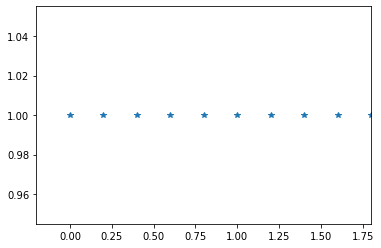

In [28]:
import numpy as np
import pylab as p
 
# Start = 0
# End = 2
# Samples to generate = 10
x1 = np.linspace(0, 2, 10, endpoint = False)
y1 = np.ones(10)
 
p.plot(x1, y1, '*')
p.xlim(-0.2, 1.8)

(-0.2, 2.1)

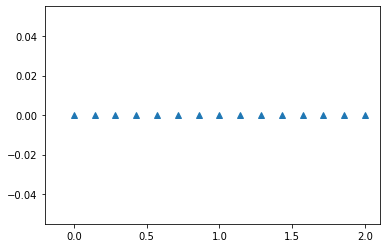

In [30]:
x1 = np.linspace(0, 2, 15, endpoint = True)
y1 = np.zeros(15)
 
p.plot(x1, y1, '^')
p.xlim(-0.2, 2.1)

In [33]:
np.linspace(1,100,num=5,retstep= True)

(array([  1.  ,  25.75,  50.5 ,  75.25, 100.  ]), 24.75)

In [34]:
np.linspace(1,100,num=5,dtype='int')

array([  1,  25,  50,  75, 100])

In [35]:
np.linspace(1,5)

array([1.        , 1.08163265, 1.16326531, 1.24489796, 1.32653061,
       1.40816327, 1.48979592, 1.57142857, 1.65306122, 1.73469388,
       1.81632653, 1.89795918, 1.97959184, 2.06122449, 2.14285714,
       2.2244898 , 2.30612245, 2.3877551 , 2.46938776, 2.55102041,
       2.63265306, 2.71428571, 2.79591837, 2.87755102, 2.95918367,
       3.04081633, 3.12244898, 3.20408163, 3.28571429, 3.36734694,
       3.44897959, 3.53061224, 3.6122449 , 3.69387755, 3.7755102 ,
       3.85714286, 3.93877551, 4.02040816, 4.10204082, 4.18367347,
       4.26530612, 4.34693878, 4.42857143, 4.51020408, 4.59183673,
       4.67346939, 4.75510204, 4.83673469, 4.91836735, 5.        ])

# Numpy Random Module

![](img/rn.png)

# The numpy.random.rand() function creates an array of specified shape and fills it with random values. Syntax : 

numpy.random.rand(d0, d1, ..., dn)

Parameters : 

d0, d1, ..., dn : [int, optional]Dimension of the returned array we require, 

     If no argument is given a single Python float is returned.
Return : 

Array of defined shape, filled with random values.

# Code 1 : Randomly constructing 1D array 

In [1]:
# Python Program illustrating
# numpy.random.rand() method
  
import numpy as np
  
# 1D Array
array = np.random.rand(5)
print("1D Array filled with random values : \n", array);

1D Array filled with random values : 
 [0.62607443 0.8396777  0.90508417 0.6412103  0.55899665]


# Code 2 : Randomly constructing 2D array 

In [2]:
import numpy as geek
  
# 2D Array  
array = geek.random.rand(3, 4)
print("\n\n2D Array filled with random values : \n", array)



2D Array filled with random values : 
 [[0.49357906 0.07620553 0.30333987 0.74244731]
 [0.3725842  0.45609784 0.66879591 0.91486784]
 [0.79888767 0.27017095 0.38869957 0.16283355]]


# Code 3 : Randomly constructing 3D array 

In [3]:
  
import numpy as geek
  
# 3D Array    
array = geek.random.rand(2, 2 ,2)
print("\n\n3D Array filled with random values : \n", array);



3D Array filled with random values : 
 [[[0.1176008  0.16878887]
  [0.10172119 0.25313295]]

 [[0.94648626 0.11017302]
  [0.65775907 0.41973028]]]


In [4]:
help(np.random)

Help on package numpy.random in numpy:

NAME
    numpy.random

DESCRIPTION
    Random Number Generation
    
    Use ``default_rng()`` to create a `Generator` and call its methods.
    
    =============== =========================================================
    Generator
    --------------- ---------------------------------------------------------
    Generator       Class implementing all of the random number distributions
    default_rng     Default constructor for ``Generator``
    =============== =========================================================
    
    ============================================= ===
    BitGenerator Streams that work with Generator
    --------------------------------------------- ---
    MT19937
    PCG64
    PCG64DXSM
    Philox
    SFC64
    ============================================= ===
    
    ============================================= ===
    Getting entropy to initialize a BitGenerator
    --------------------------------------------

![](img/rand.png)

In [5]:
help(np.random.rand)

Help on built-in function rand:

rand(...) method of numpy.random.mtrand.RandomState instance
    rand(d0, d1, ..., dn)
    
    Random values in a given shape.
    
    .. note::
        This is a convenience function for users porting code from Matlab,
        and wraps `random_sample`. That function takes a
        tuple to specify the size of the output, which is consistent with
        other NumPy functions like `numpy.zeros` and `numpy.ones`.
    
    Create an array of the given shape and populate it with
    random samples from a uniform distribution
    over ``[0, 1)``.
    
    Parameters
    ----------
    d0, d1, ..., dn : int, optional
        The dimensions of the returned array, must be non-negative.
        If no argument is given a single Python float is returned.
    
    Returns
    -------
    out : ndarray, shape ``(d0, d1, ..., dn)``
        Random values.
    
    See Also
    --------
    random
    
    Examples
    --------
    >>> np.random.rand(3,2)
    arra

# Attributes of NumPy Array

# ndarray.shape

In [7]:
a = np.array([[1,2,3],[4,5,6]]) 
print(a.shape)

(2, 3)


In [8]:

a = np.array([[1,2,3],[4,5,6]]) 
a.shape = (3,2) 
print (a)

[[1 2]
 [3 4]
 [5 6]]


# ndarray.ndim

In [9]:
a = np.arange(24) 
print(a)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


In [28]:
a = np.arange(24) 
a.ndim  

# now reshape it 
b = a.reshape(2,4,3) 
print(b) 
# b is having three dimensions

[[[ 0  1  2]
  [ 3  4  5]
  [ 6  7  8]
  [ 9 10 11]]

 [[12 13 14]
  [15 16 17]
  [18 19 20]
  [21 22 23]]]


In [29]:
b.size

24

In [30]:
b.dtype

dtype('int32')

In [11]:
help(np.reshape)

Help on function reshape in module numpy:

reshape(a, newshape, order='C')
    Gives a new shape to an array without changing its data.
    
    Parameters
    ----------
    a : array_like
        Array to be reshaped.
    newshape : int or tuple of ints
        The new shape should be compatible with the original shape. If
        an integer, then the result will be a 1-D array of that length.
        One shape dimension can be -1. In this case, the value is
        inferred from the length of the array and remaining dimensions.
    order : {'C', 'F', 'A'}, optional
        Read the elements of `a` using this index order, and place the
        elements into the reshaped array using this index order.  'C'
        means to read / write the elements using C-like index order,
        with the last axis index changing fastest, back to the first
        axis index changing slowest. 'F' means to read / write the
        elements using Fortran-like index order, with the first index
        c

# numpy.itemsize

In [17]:
x = np.array([1,2,3,4,5], dtype = np.int8) 
print(x.itemsize)

1


In [19]:
x = np.array([1,2,3,4,5], dtype = np.float32) 
print(x.itemsize)

4


In [21]:
z = np.arange(3, dtype=np.uint8)
z

array([0, 1, 2], dtype=uint8)

In [23]:
z.astype(float) 

array([0., 1., 2.])

In [24]:
np.int8(z)

array([0, 1, 2], dtype=int8)

In [22]:
np.array([1, 2, 3], dtype='f')

array([1., 2., 3.], dtype=float32)

In [25]:
d = np.dtype(int)
d

dtype('int32')

In [26]:
np.issubdtype(d, np.integer)

True

In [27]:
np.issubdtype(d, np.floating)

False

# numpy.flags

In [20]:
x = np.array([1,2,3,4,5]) 
print (x.flags)

  C_CONTIGUOUS : True
  F_CONTIGUOUS : True
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False



# Data Type of Numpy

#Numpy is a module in python. It is originally called numerical python, but in short, we pronounce it as numpy. NumPy is a general-purpose array-processing package in python. It provides high-performance multidimensional data structures like array objects and tools for working with these arrays. Numpy provides faster and efficient calculations of matrices and arrays.

NumPy provides familiarity with almost all mathematical functions. In numpy these functions are called universal function ufunc.

In [31]:
arr = np.array([1, 2, 3, 23, 56, 100])
 
# printing the array and checking datatype
print('Array:', arr)
 
print('Datatype:', arr.dtype)

Array: [  1   2   3  23  56 100]
Datatype: int32


In [32]:
arr_1 = np.array(['apple', 'ball', 'cat', 'dog'])
 
# printing array and its datatype
print('Array:', arr_1)
 
print('Datatype:', arr_1.dtype)

Array: ['apple' 'ball' 'cat' 'dog']
Datatype: <U5


In [34]:
arr = np.array([1, 2, 3, 8, 7, 5], dtype='S')
 
# printing array and its datatype
print("Array:", arr)
print("Datatype:", arr.dtype)

#S is used for defining string datatype. 
# We use i, u, f, S and U for defining various other data types along with their size.

Array: [b'1' b'2' b'3' b'8' b'7' b'5']
Datatype: |S1


In [35]:
arr = np.array([1, 2, 3, 4], dtype='i4')
 
# printing array and datatype
print('Array:', arr)
print('Datatype:', arr.dtype)

Array: [1 2 3 4]
Datatype: int32


In [36]:
arr = np.array([1, 2, 3, 4], dtype='i8')
 
# printing array and datatype
print('Array:', arr)
print('Datatype:', arr.dtype)

Array: [1 2 3 4]
Datatype: int64


In [37]:
arr = np.array([1, 2, 3, 4, 8, 9, 7], dtype='f4')
 
# printing array and datatype
print('Array:', arr)
print('Datatype:', arr.dtype)

Array: [1. 2. 3. 4. 8. 9. 7.]
Datatype: float32


In [39]:
arr = np.array([1, 2, 3, 4, 8, 9, 7], dtype='S2')
 
# printing array and datatype
print('Array:', arr)
print('Datatype:', arr.dtype)

#, the datatype is a string and the size is 2.

Array: [b'1' b'2' b'3' b'4' b'8' b'9' b'7']
Datatype: |S2


![](img/DT.png)

![](img/dt1.png)

![](img/dt2.png)

In [41]:
x = np.zeros(6,dtype='int8')

In [42]:
x

array([0, 0, 0, 0, 0, 0], dtype=int8)

In [44]:
a = np.float32(1)
a

1.0

![](img/code.png)

In [47]:
s = np.zeros(5)
s

array([0., 0., 0., 0., 0.])

In [48]:
s.astype(int)

array([0, 0, 0, 0, 0])

In [49]:
s.astype('f')

array([0., 0., 0., 0., 0.], dtype=float32)

# Indexing Operation in NumPy Arrays

![](img/index.png)

# 1-D array

![](img/index1.png)

In [50]:
a =np.array([1,2,3,4,5,6,7])

In [51]:
a

array([1, 2, 3, 4, 5, 6, 7])

In [52]:
a[3]

4

In [53]:
a[-4]

4

![](img/index11.png)

In [55]:
b = np.array([[1,2],[3,4]])

In [56]:
b

array([[1, 2],
       [3, 4]])

In [57]:
b[0][0]

1

In [61]:
b[0][-2]

1

In [62]:
b[-2][-2]

1

In [58]:
b[0][1]

2

In [60]:
b[1][-1]

4

In [63]:
b[1][-2]

3

In [64]:
b[1]

array([3, 4])

# 3 D Arrary

![](img/3_d.png)

![](img/3d1.png)

![](img/3d11.png)

![](img/3d12.png)

# Slicing Operation in NumPy Array

![](img/slicing.png)

![](img/scling1.png)

In [65]:
a = np.array([1,2,3,4,5])
a

array([1, 2, 3, 4, 5])

In [66]:
a[:]

array([1, 2, 3, 4, 5])

In [67]:
a[:3]

array([1, 2, 3])

In [68]:
a[2:]

array([3, 4, 5])

In [69]:
a

array([1, 2, 3, 4, 5])

In [70]:
a[:-1]

array([1, 2, 3, 4])

In [72]:
a

array([1, 2, 3, 4, 5])

In [71]:
a[:4]

array([1, 2, 3, 4])

In [74]:
a[3:]

array([4, 5])

In [73]:
a[0::4]

array([1, 5])

![](img/indx.png)

# 2 -D Array

![](img/2_d_sclice.png)

![](img/2_d_extract.png)

In [75]:
x = np.array([[1,2],[3,4],[5,6]])
x

array([[1, 2],
       [3, 4],
       [5, 6]])

In [76]:
x[1:,1:]

array([[4],
       [6]])

In [77]:
x[-2:,-1:]

array([[4],
       [6]])

In [80]:
x[:,:]

array([[1, 2],
       [3, 4],
       [5, 6]])

In [85]:
x[1:,:-1]

array([[3],
       [5]])

In [86]:
x[1:]

array([[3, 4],
       [5, 6]])

In [87]:
x[:-1]

array([[1, 2],
       [3, 4]])

In [88]:
x[2:]

array([[5, 6]])

In [2]:
import numpy as np

In [3]:
b = np.array([[1,2,3,4],[5,6,7,8],[20,30,40,50]])

In [4]:
b

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [20, 30, 40, 50]])

In [5]:
b[1:,1:]

array([[ 6,  7,  8],
       [30, 40, 50]])

In [6]:
b[::,::2]

array([[ 1,  3],
       [ 5,  7],
       [20, 40]])

# 3 - Da Array

![](img/3d_sclice.png)

In [9]:
c = [[[1,2,3,4],[5,6,7,8],[9,10,11,12],[13,14,15,16],[17,18,19,20],[21,22,23,24]]]

In [10]:
d =np.array(c)

In [11]:
d

array([[[ 1,  2,  3,  4],
        [ 5,  6,  7,  8],
        [ 9, 10, 11, 12],
        [13, 14, 15, 16],
        [17, 18, 19, 20],
        [21, 22, 23, 24]]])

In [12]:
d[:,:,:1]

array([[[ 1],
        [ 5],
        [ 9],
        [13],
        [17],
        [21]]])

In [13]:
d[:,1:,::2]

array([[[ 5,  7],
        [ 9, 11],
        [13, 15],
        [17, 19],
        [21, 23]]])

In [14]:
d

array([[[ 1,  2,  3,  4],
        [ 5,  6,  7,  8],
        [ 9, 10, 11, 12],
        [13, 14, 15, 16],
        [17, 18, 19, 20],
        [21, 22, 23, 24]]])

In [16]:
d.ndim

3

In [18]:
d[:1,:1,1]

array([[2]])

In [20]:
d[:,:,::2]

array([[[ 1,  3],
        [ 5,  7],
        [ 9, 11],
        [13, 15],
        [17, 19],
        [21, 23]]])

In [23]:
d

array([[[ 1,  2,  3,  4],
        [ 5,  6,  7,  8],
        [ 9, 10, 11, 12],
        [13, 14, 15, 16],
        [17, 18, 19, 20],
        [21, 22, 23, 24]]])

In [21]:
d[:,:,:2]

array([[[ 1,  2],
        [ 5,  6],
        [ 9, 10],
        [13, 14],
        [17, 18],
        [21, 22]]])

In [33]:
d

array([[[ 1,  2,  3,  4],
        [ 5,  6,  7,  8],
        [ 9, 10, 11, 12],
        [13, 14, 15, 16],
        [17, 18, 19, 20],
        [21, 22, 23, 24]]])

In [69]:
d[:,1:,:3]

array([[[ 5,  6,  7],
        [ 9, 10, 11],
        [13, 14, 15],
        [17, 18, 19],
        [21, 22, 23]]])

# Advanced Indexing Operation in NumPy

In [70]:
a = np.arange(1,10)

In [72]:
a

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [73]:
index = np.array([1,4,5])

In [74]:
a[index]

array([2, 5, 6])

In [76]:
a[[1,4,5]]

array([2, 5, 6])

In [77]:
b = np.array([[1,2,3],[4,5,6],[7,8,9]])

In [78]:
b

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [81]:
b[[0,2],[2,0]]

array([3, 7])

In [82]:
b[[1,2],[2,1]]

array([6, 8])

In [83]:
b[[1,1,2],[0,2,1]]

array([4, 6, 8])

# Boolean Indexing

In [95]:
x = np.array([[1,-2,3],[4,-5,6]])

In [96]:
x

array([[ 1, -2,  3],
       [ 4, -5,  6]])

In [97]:
x[x<0]

array([-2, -5])

In [98]:
x[x<0]*2

array([ -4, -10])

In [99]:
s = np.arange(1,5)

In [100]:
s

array([1, 2, 3, 4])

In [101]:
s+2

array([3, 4, 5, 6])

In [102]:
s-1

array([0, 1, 2, 3])

In [104]:
s*s

array([ 1,  4,  9, 16])

In [105]:
s/2

array([0.5, 1. , 1.5, 2. ])

In [106]:
s%2

array([1, 0, 1, 0], dtype=int32)

In [107]:
b = np.array([10,20,30,40])

In [108]:
b

array([10, 20, 30, 40])

In [109]:
s+b

array([11, 22, 33, 44])

In [110]:
b-s

array([ 9, 18, 27, 36])

In [111]:
s*b

array([ 10,  40,  90, 160])

In [112]:
s%b

array([1, 2, 3, 4], dtype=int32)

![](img/array_ops.png)

# Broadcasting | NumPy Tutorials 

![](img/bb.png)

![](img/bb1.png)

![](img/bb2.png)

![](img/bb3.png)

![](img/bb4.png)

# Array Manipulation

![](img/array_opss.png)

![](img/reshape.png)

In [113]:
a = np.arange(10)

In [115]:
a.shape

(10,)

In [119]:
b = np.reshape(a,(5,2))

In [120]:
b

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7],
       [8, 9]])

In [121]:
b.shape

(5, 2)

In [122]:
c = np.reshape(a,(5,2),order='F')

In [123]:
c

array([[0, 5],
       [1, 6],
       [2, 7],
       [3, 8],
       [4, 9]])

In [127]:
a.reshape(2,5)

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

![](img/reshape1.png)

# Resize Array

![](img/resize1.png)

In [128]:
help(np.resize)

Help on function resize in module numpy:

resize(a, new_shape)
    Return a new array with the specified shape.
    
    If the new array is larger than the original array, then the new
    array is filled with repeated copies of `a`.  Note that this behavior
    is different from a.resize(new_shape) which fills with zeros instead
    of repeated copies of `a`.
    
    Parameters
    ----------
    a : array_like
        Array to be resized.
    
    new_shape : int or tuple of int
        Shape of resized array.
    
    Returns
    -------
    reshaped_array : ndarray
        The new array is formed from the data in the old array, repeated
        if necessary to fill out the required number of elements.  The
        data are repeated iterating over the array in C-order.
    
    See Also
    --------
    np.reshape : Reshape an array without changing the total size.
    np.pad : Enlarge and pad an array.
    np.repeat : Repeat elements of an array.
    ndarray.resize : resize an ar

#  flatten and ravel 

![](img/flatten.png)

![](img/f1.png)

![](img/f2.png)

# Ravel

![](img/ravel.png)

![](img/r1.png)

![](img/r2.png)

![](img/r3.png)

![](img/f3.png)

In [129]:
import numpy as np
 
# Create a numpy array
a = np.array([(1,2,3,4),(3,1,4,2)])
 
# Let's print the array a
print ("Original array:\n ", a)
 
# Convert nd array to 1D array
c = a.flatten()
 
# Flatten passes copy of
# original array to 'c'
print ("\nFlatten array using flatten: ", c)

Original array:
  [[1 2 3 4]
 [3 1 4 2]]

Flatten array using flatten:  [1 2 3 4 3 1 4 2]


In [130]:
c[2] = 33
 
print ("Flatten array: ", c)
 
# Let's print the array a
print ("\nOriginal array:\n ", a)

Flatten array:  [ 1  2 33  4  3  1  4  2]

Original array:
  [[1 2 3 4]
 [3 1 4 2]]


In [131]:
import numpy as np
 
# Create a numpy array
a = np.array([(1,2,3,4),(3,1,4,2)])
 
# Let's print the array a
print ("Original array:\n ", a)
 
ra = np.ravel(a)
print ("\nFlatten array using ravel: ", ra)

Original array:
  [[1 2 3 4]
 [3 1 4 2]]

Flatten array using ravel:  [1 2 3 4 3 1 4 2]


In [132]:
ra[3] = 44
 
print ("Flatten array: ", ra)
 
# Let's print the array a
print ("\nOriginal array:\n ", a)

Flatten array:  [ 1  2  3 44  3  1  4  2]

Original array:
  [[ 1  2  3 44]
 [ 3  1  4  2]]


#  transpose and swapaxes

![](img/tp.png)

In [133]:
a1= np.arange(1,11).reshape(5,2)

In [134]:
a1

array([[ 1,  2],
       [ 3,  4],
       [ 5,  6],
       [ 7,  8],
       [ 9, 10]])

In [135]:
np.transpose(a1)

array([[ 1,  3,  5,  7,  9],
       [ 2,  4,  6,  8, 10]])

In [136]:
np.transpose(a1).shape

(2, 5)

In [137]:
a =np.arange(1,25).reshape(2,3,4)

In [138]:
a

array([[[ 1,  2,  3,  4],
        [ 5,  6,  7,  8],
        [ 9, 10, 11, 12]],

       [[13, 14, 15, 16],
        [17, 18, 19, 20],
        [21, 22, 23, 24]]])

In [139]:
np.transpose(a)

array([[[ 1, 13],
        [ 5, 17],
        [ 9, 21]],

       [[ 2, 14],
        [ 6, 18],
        [10, 22]],

       [[ 3, 15],
        [ 7, 19],
        [11, 23]],

       [[ 4, 16],
        [ 8, 20],
        [12, 24]]])

![](img/tp1.png)

![](img/tp2.png)

![](img/tp3.png)

![](img/tp4.png)

![](img/swapax.png)

![](img/swp.png)

![](img/swp1.png)

![](img/swp11.png)

![](img/swp12.png)

![](img/con1.png)

![](img/con2.png)

![](img/con3.png)

![](img/con4.png)

![](img/con5.png)

# hstack   & vstack

# numpy.hstack() in Python

numpy.hstack() function is used to stack the sequence of input arrays horizontally (i.e. column wise) to make a single array.

Syntax : numpy.hstack(tup)

Parameters :
tup : [sequence of ndarrays] Tuple containing arrays to be stacked. The arrays must have the same shape along all but the second axis.

Return : [stacked ndarray] The stacked array of the input arrays.

In [140]:
import numpy as geek
  
# input array
in_arr1 = geek.array([ 1, 2, 3] )
print ("1st Input array : \n", in_arr1) 
  
in_arr2 = geek.array([ 4, 5, 6] )
print ("2nd Input array : \n", in_arr2) 
  
# Stacking the two arrays horizontally
out_arr = geek.hstack((in_arr1, in_arr2))
print ("Output horizontally stacked array:\n ", out_arr)

1st Input array : 
 [1 2 3]
2nd Input array : 
 [4 5 6]
Output horizontally stacked array:
  [1 2 3 4 5 6]


In [141]:
  
import numpy as geek
  
# input array
in_arr1 = geek.array([[ 1, 2, 3], [ -1, -2, -3]] )
print ("1st Input array : \n", in_arr1) 
  
in_arr2 = geek.array([[ 4, 5, 6], [ -4, -5, -6]] )
print ("2nd Input array : \n", in_arr2) 
  
# Stacking the two arrays horizontally
out_arr = geek.hstack((in_arr1, in_arr2))
print ("Output stacked array :\n ", out_arr)

1st Input array : 
 [[ 1  2  3]
 [-1 -2 -3]]
2nd Input array : 
 [[ 4  5  6]
 [-4 -5 -6]]
Output stacked array :
  [[ 1  2  3  4  5  6]
 [-1 -2 -3 -4 -5 -6]]


# numpy.vstack() in python

numpy.vstack() function is used to stack the sequence of input arrays vertically to make a single array.

Syntax : numpy.vstack(tup)

Parameters :
tup : [sequence of ndarrays] Tuple containing arrays to be stacked. The arrays must have the same shape along all but the first axis.

Return : [stacked ndarray] The stacked array of the input arrays.

In [142]:
import numpy as geek
  
# input array
in_arr1 = geek.array([ 1, 2, 3] )
print ("1st Input array : \n", in_arr1) 
  
in_arr2 = geek.array([ 4, 5, 6] )
print ("2nd Input array : \n", in_arr2) 
  
# Stacking the two arrays vertically
out_arr = geek.vstack((in_arr1, in_arr2))
print ("Output vertically stacked array:\n ", out_arr)

1st Input array : 
 [1 2 3]
2nd Input array : 
 [4 5 6]
Output vertically stacked array:
  [[1 2 3]
 [4 5 6]]


In [143]:
  
import numpy as geek
  
# input array
in_arr1 = geek.array([[ 1, 2, 3], [ -1, -2, -3]] )
print ("1st Input array : \n", in_arr1) 
  
in_arr2 = geek.array([[ 4, 5, 6], [ -4, -5, -6]] )
print ("2nd Input array : \n", in_arr2) 
  
# Stacking the two arrays vertically
out_arr = geek.vstack((in_arr1, in_arr2))
print ("Output stacked array :\n ", out_arr)

1st Input array : 
 [[ 1  2  3]
 [-1 -2 -3]]
2nd Input array : 
 [[ 4  5  6]
 [-4 -5 -6]]
Output stacked array :
  [[ 1  2  3]
 [-1 -2 -3]
 [ 4  5  6]
 [-4 -5 -6]]


![](img/hstack.png)

![](img/vstack.png)

![](img/cont11.png)

![](img/cont111.png)

# Insert and Delete Function |

![](img/insert1.png)

![](img/ins1.png)

![](img/ins.png)

![](img/append.png)

![](img/appd.png)

![](img/app1.png)

![](img/app12.png)

![](img/del.png)

![](img/del1.png)

![](img/del12.png)

![](img/del44.png)

# Matrix in Numpy

This class returns a matrix from a string of data or array-like object. Matrix obtained is a specialised 2D array.
Syntax :

numpy.matrix(data, dtype = None) : 

Parameters :

data  : data needs to be array-like or string 

dtype : Data type of returned array. 
     
Returns :

data interpreted as a matrix


![](img/matrix.png)

In [9]:
import numpy as geek
from numpy import matrix
  
# string input
a = geek.matrix('1 2; 3 4')
print("Via string input : \n", a, "\n\n")
  
# array-like input
b = geek.matrix([[5, 6], [4, 6]])
print("Via array-like input : \n", b)

Via string input : 
 [[1 2]
 [3 4]] 


Via array-like input : 
 [[5 6]
 [4 6]]


# Add /Mul  / Transpose

In [3]:
a+b

matrix([[ 6,  8],
        [ 7, 10]])

In [4]:
a-b

matrix([[-4, -4],
        [-1, -2]])

In [6]:
a.T

matrix([[1, 3],
        [2, 4]])

In [7]:
from numpy import matrix


help(matrix)

Help on class matrix in module numpy:

class matrix(ndarray)
 |  matrix(data, dtype=None, copy=True)
 |  
 |  matrix(data, dtype=None, copy=True)
 |  
 |  .. note:: It is no longer recommended to use this class, even for linear
 |            algebra. Instead use regular arrays. The class may be removed
 |            in the future.
 |  
 |  Returns a matrix from an array-like object, or from a string of data.
 |  A matrix is a specialized 2-D array that retains its 2-D nature
 |  through operations.  It has certain special operators, such as ``*``
 |  (matrix multiplication) and ``**`` (matrix power).
 |  
 |  Parameters
 |  ----------
 |  data : array_like or string
 |     If `data` is a string, it is interpreted as a matrix with commas
 |     or spaces separating columns, and semicolons separating rows.
 |  dtype : data-type
 |     Data-type of the output matrix.
 |  copy : bool
 |     If `data` is already an `ndarray`, then this flag determines
 |     whether the data is copied (the 

# Matrix Addition and Subtraction

![](img/mm1.png)

In [17]:
# # Program to add two matrices using nested loop
 
X = [[1,2,3],
    [4 ,5,6],
    [7 ,8,9]]
 
Y = [[9,8,7],
    [6,5,4],
    [3,2,1]]
 
 
result = [[0,0,0],
        [0,0,0],
        [0,0,0]]
 
# iterate through rows
for i in range(len(X)):  
# iterate through columns
    for j in range(len(X[0])):
        result[i][j] = X[i][j] + Y[i][j]
 
for r in result:
    print(r)

[10, 10, 10]
[10, 10, 10]
[10, 10, 10]


In [19]:
X = [[1,2,3],
    [4 ,5,6],
    [7 ,8,9]]
 
Y = [[9,8,7],
    [6,5,4],
    [3,2,1]]
 
 
result = [[0,0,0],
        [0,0,0],
        [0,0,0]]

result = np.add(X,Y)
 
for r in result:
    print(r)

[10 10 10]
[10 10 10]
[10 10 10]


In [11]:
# Program to add two matrices
# using list comprehension
  
X = [[1,2,3],
    [4 ,5,6],
    [7 ,8,9]]
  
Y = [[9,8,7],
    [6,5,4],
    [3,2,1]]
 
result = [[X[i][j] + Y[i][j]  for j in range
(len(X[0]))] for i in range(len(X))]
  
for r in result:
    print(r)

[10, 10, 10]
[10, 10, 10]
[10, 10, 10]


# Matrix multiplication

Input : X = [[1, 7, 3],

             [3, 5, 6],

             [6, 8, 9]]

       Y = [[1, 1, 1, 2],

           [6, 7, 3, 0],

           [4, 5, 9, 1]]
 
Output : [55, 65, 49, 5]

         [57, 68, 72, 12]
         
         [90, 107, 111, 21]

In [15]:

# Program to multiply two matrices using nested loops
 
# take a 3x3 matrix
A = [[12, 7, 3],
    [4, 5, 6],
    [7, 8, 9]]
 
# take a 3x4 matrix   
B = [[5, 8, 1, 2],
    [6, 7, 3, 0],
    [4, 5, 9, 1]]
     
result = [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]]
 
# iterating by row of A
for i in range(len(A)):
 
    # iterating by column by B
    for j in range(len(B[0])):
 
        # iterating by rows of B
        for k in range(len(B)):
            result[i][j] += A[i][k] * B[k][j]
 
for r in result:
    print(r)


[114, 160, 60, 27]
[74, 97, 73, 14]
[119, 157, 112, 23]


In [16]:
# Program to multiply two matrices (vectorized implementation)
 
# Program to multiply two matrices (vectorized implementation)
import numpy as np
# take a 3x3 matrix
A = [[12, 7, 3],
    [4, 5, 6],
    [7, 8, 9]]
 
# take a 3x4 matrix
B = [[5, 8, 1, 2],
    [6, 7, 3, 0],
    [4, 5, 9, 1]]
 
# result will be 3x4
 
result= [[0,0,0,0],
        [0,0,0,0],
        [0,0,0,0]]
 
result = np.dot(A,B)
 
for r in result:
    print(r)

[114 160  60  27]
[74 97 73 14]
[119 157 112  23]


# Transpose of matrix

In [21]:
import numpy 
matrix=[[1,2,3],[4,5,6]]
print(matrix)
print("\n")
print(numpy.transpose(matrix))

[[1, 2, 3], [4, 5, 6]]


[[1 4]
 [2 5]
 [3 6]]


In [22]:
import numpy as np
matrix = np.array([[1,2,3],[4,5,6]])
print(matrix)
print("\n")
print(matrix.T)

[[1 2 3]
 [4 5 6]]


[[1 4]
 [2 5]
 [3 6]]


# Inverse Of A Matrix | NumPy | Linear Algebra 

![](img/mm11.png)

# inverse a matrix using NumPy

nverse of a matrix is just a reciprocal of the matrix as we do in normal arithmetic for a single number which is used to solve the equations to find the value of unknown variables. The inverse of a matrix is that matrix which when multiplied with the original matrix will give as an identity matrix. The inverse of a matrix exists only if the matrix is non-singular i.e., determinant should not be 0. Using determinant and adjoint, we can easily find the inverse of a square matrix using below formula,

if det(A) != 0

    A-1 = adj(A)/det(A)
else

    "Inverse doesn't exist"  

Matrix Equation

=>Ax = B\\ =>A^{-1}Ax = A^{-1}B\\ =>x = A^{-1}B

where,

A-1: The inverse of matrix A

x: The unknown variable column

B: The solution matrix

Inverse of a Matrix using NumPy
Python provides a very easy method to calculate the inverse of a matrix. The function numpy.linalg.inv() which is available in the python NumPy module is used to compute the inverse of a matrix. 

Syntax:

numpy.linalg.inv(a)

Parameters:

a: Matrix to be inverted

Returns: 

Inverse of the matrix a.





# Formula https://www.cuemath.com/algebra/inverse-of-a-matrix/

![](img/matrix-inverse.png)

![](img/inver_formula.png)

In [30]:
# Python program to inverse
# a matrix using numpy
  
# Import required package
import numpy as np
  
# Taking a 3 * 3 matrix
A = np.array([[6, 1, 1],
              [4, -2, 5],
              [2, 8, 7]])
  
# Calculating the inverse of the matrix
print(np.linalg.inv(A))

[[ 0.17647059 -0.00326797 -0.02287582]
 [ 0.05882353 -0.13071895  0.08496732]
 [-0.11764706  0.1503268   0.05228758]]


In [31]:
  
# Import required package
import numpy as np
  
# Taking a 4 * 4 matrix
A = np.array([[6, 1, 1, 3],
              [4, -2, 5, 1],
              [2, 8, 7, 6],
              [3, 1, 9, 7]])
  
# Calculating the inverse of the matrix
print(np.linalg.inv(A))

[[ 0.13368984  0.10695187  0.02139037 -0.09090909]
 [-0.00229183  0.02673797  0.14820474 -0.12987013]
 [-0.12987013  0.18181818  0.06493506 -0.02597403]
 [ 0.11000764 -0.28342246 -0.11382735  0.23376623]]


In [32]:
import numpy as np
  
# Inverses of several matrices can
# be computed at once
A = np.array([[[1., 2.], [3., 4.]],
              [[1, 3], [3, 5]]])
  
# Calculating the inverse of the matrix
print(np.linalg.inv(A))

[[[-2.    1.  ]
  [ 1.5  -0.5 ]]

 [[-1.25  0.75]
  [ 0.75 -0.25]]]


![](img/inverse_f2.png)

In [33]:
import numpy as np 

x = np.array([[1,2],[3,4]]) 
y = np.linalg.inv(x) 
print(x) 
print (y) 
print(np.dot(x,y))

[[1 2]
 [3 4]]
[[-2.   1. ]
 [ 1.5 -0.5]]
[[1.0000000e+00 0.0000000e+00]
 [8.8817842e-16 1.0000000e+00]]


![](img/all_close.png)

In [35]:
np.allclose(np.dot(x,y),np.eye(2))

True

![](img/dot.png)

In [36]:
np.dot(x,y)

array([[1.0000000e+00, 0.0000000e+00],
       [8.8817842e-16, 1.0000000e+00]])

# numpy.allclose() in Python

numpy.allclose() function is used to find if two arrays are element-wise equal within a tolerance. The tolerance values are positive, typically very small numbers. The relative difference (rtol * abs(arr2)) and the absolute difference atol are added together to compare against the absolute difference between arr1 and arr2. If either array contains one or more NaNs, False is returned. Infs are treated as equal if they are in the same place and of the same sign in both arrays.

If the following equation is element-wise True, then allclose returns True.
absolute(arr1 - arr2) <= (atol + rtol * absolute(arr2))
As, The above equation is not symmetric in arr1 and arr2, So, allclose(arr1, arr2) might be different from allclose(arr2, arr1) in some rare cases.

Syntax : numpy.allclose(arr1, arr2, rtol, atol, equal_nan=False)

Parameters :
arr1 : [array_like] Input 1st array.

arr2 : [array_like] Input 2nd array.

rtol : [float] The relative tolerance parameter.

atol : [float] The absolute tolerance parameter.

equal_nan : [bool] Whether to compare NaN’s as equal. If True, NaN’s in arr1 will be considered equal to NaN’s in arr2 in the output array.

Return : [ bool] Returns True if the two arrays are equal within the given tolerance, otherwise it returns False.

In [27]:
import numpy as np 
a = np.array([[1,1,1],[0,2,5],[2,5,-1]]) 

print('Array a : ')
print(a)
ainv = np.linalg.inv(a) 

print('Inverse of a:')
print(ainv)

print('Matrix B is:')
b = np.array([[6],[-4],[27]]) 
print(b)

print('Compute A-1B:')
x = np.linalg.solve(a,b) 
print(x)
# this is the solution to linear equations x = 5, y = 3, z = -2

Array a : 
[[ 1  1  1]
 [ 0  2  5]
 [ 2  5 -1]]
Inverse of a:
[[ 1.28571429 -0.28571429 -0.14285714]
 [-0.47619048  0.14285714  0.23809524]
 [ 0.19047619  0.14285714 -0.0952381 ]]
Matrix B is:
[[ 6]
 [-4]
 [27]]
Compute A-1B:
[[ 5.]
 [ 3.]
 [-2.]]


# Alternate Formula

In [28]:
x = np.dot(ainv,b)

In [29]:
x

array([[ 5.],
       [ 3.],
       [-2.]])

# Power Of A Matrix | NumPy | Linear Algebra

![](img/pow_matrix.png)

# A*A 
np_linalg.matrix_power(A,2)  -- means  A*A

In [39]:
A= np.array([[1,2],[3,4]])

A =  np.linalg.matrix_power(A,2)

A

array([[ 7, 10],
       [15, 22]])

In [41]:
A= np.array([[1,2],[3,4]])

In [42]:
np.dot(A,A)

array([[ 7, 10],
       [15, 22]])

In [43]:
A= np.array([[1,2],[3,4]])

In [44]:
np.linalg.matrix_power(A,3)

array([[ 37,  54],
       [ 81, 118]])

In [45]:
A= np.array([[1,2],[3,4]])

# identity matrix

In [49]:
A= np.array([[1,2],[3,4]])

In [50]:
np.linalg.matrix_power(A,0)

array([[1, 0],
       [0, 1]])

# now First inverse of matrix then Square of matrix

![](img/inv111.png)

![](img/sq.png)

![](img/inv21.png)

# N = 0 --- identity matrix

# Solve Linear Equation Using NumPy | Linear Algebra 

![](img/lA.png)

![](img/LA1.png)

![](img/LA2.png)

![](img/LA3.png)

![](img/LA4.png)

![](img/LA5.png)

![](img/LA6.png)

![](img/LA_Check.png)

# Determinat of Matrix

 determinant of a Matrix is defined as a special number that is defined only for square matrices (matrices that have the same number of rows and columns). A determinant is used in many places in calculus and other matrices related to algebra, it actually represents the matrix in terms of a real number which can be used in solving a system of a linear equation and finding the inverse of a matrix.

![](img/det.png)

![](img/det1.png)

# How to calculate? 

The value of the determinant of a matrix can be calculated by the following procedure: 

For each element of the first row or first column get the cofactor of those elements.
Then multiply the element with the determinant of the corresponding cofactor. 
Finally, add them with alternate signs. As a base case, the value of the determinant of a 1*1 matrix is the single value itself. 
The cofactor of an element is a matrix that we can get by removing the row and column of that element from that matrix.

# Determinant of a Matrix Using the NumPy package in Python

There is a built-in function or method in linalg module of NumPy package in python. It can be called numpy.linalg.det(mat) which returns the determinant value of the matrix mat passed in the argument.

![](img/dt11.png)

In [3]:
import numpy as np

x =np.array([[1,2],[3,4]])

In [7]:
round(np.linalg.det(x))

-2

![](img/dt123.png)

![](img/dt111.png)

In [51]:
# importing the numpy package
# as np
import numpy as np
 
def determinant(mat):
     
    # calling the det() method
    det = np.linalg.det(mat)
    return round(det)
 
# Driver Code
# declaring the matrix
mat = [[1, 0, 2, -1],
       [3, 0, 0, 5],
       [2, 1, 4, -3],
       [1, 0, 5, 0]]
 
# Function call
print('Determinant of the matrix is:',
      determinant(mat))

Determinant of the matrix is: 30


In [52]:
  
# creating a 2X2 Numpy matrix
n_array = np.array([[50, 29], [30, 44]])
  
# Displaying the Matrix
print("Numpy Matrix is:")
print(n_array)
  
# calculating the determinant of matrix
det = np.linalg.det(n_array)
  
print("\nDeterminant of given 2X2 matrix:")
print(int(det))

Numpy Matrix is:
[[50 29]
 [30 44]]

Determinant of given 2X2 matrix:
1330


In [53]:
# importing Numpy package
import numpy as np
  
# creating a 5X5 Numpy matrix
n_array = np.array([[5, 2, 1, 4, 6],
                    [9, 4, 2, 5, 2],
                    [11, 5, 7, 3, 9],
                    [5, 6, 6, 7, 2],
                    [7, 5, 9, 3, 3]])
  
# Displaying the Matrix
print("Numpy Matrix is:")
print(n_array)
  
# calculating the determinant of matrix
det = np.linalg.det(n_array)
  
print("\nDeterminant of given 5X5 square matrix:")
print(int(det))

Numpy Matrix is:
[[ 5  2  1  4  6]
 [ 9  4  2  5  2]
 [11  5  7  3  9]
 [ 5  6  6  7  2]
 [ 7  5  9  3  3]]

Determinant of given 5X5 square matrix:
-2003


# Linear Algebra  

# https://www.geeksforgeeks.org/numpy-linear-algebra/

# https://www.geeksforgeeks.org/python-solve-the-linear-equation-of-multiple-variable/


# Format String in Plot Function | Matplotlib

![](img/mat.png)

![](img/mat11.png)

# plot() format string

![](img/mat1.png)

![](img/mat111.png)

# marker Symbl in Matplotlib

# https://matplotlib.org/stable/api/markers_api.html

# line style
Linestyles
Simple linestyles can be defined using the strings "solid", "dotted", "dashed" or "dashdot". More refined control can be achieved by providing a dash tuple (offset, (on_off_seq)). For example, (0, (3, 10, 1, 15)) means (3pt line, 10pt space, 1pt line, 15pt space) with no offset, while (5, (10, 3)), means (10pt line, 3pt space), but skip the first 5pt line. See also Line2D.set_linestyle.

Note: The dash style can also be configured via Line2D.set_dashes as shown in Customizing dashed line styles and passing a list of dash sequences using the keyword dashes to the cycler in property_cycle.

Named linestyles, Parametrized linestyles

![](img/ls.png)

![](img/sphx_glr_linestyles_001_2_0x.webp)

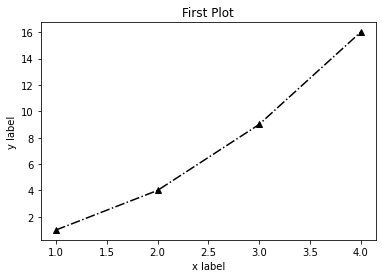

In [13]:
import matplotlib.pyplot as plt
plt.plot([1, 2, 3, 4], [1, 4, 9, 16], 'k^-.')

plt.xlabel('x label')
plt.ylabel('y label')
plt.title('First Plot')
plt.show()

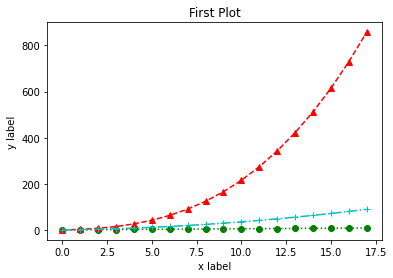

In [14]:
import matplotlib.pyplot as plt
import numpy as np
a = np.arange(1,10,0.5)
plt.plot(a,'go:',a**3,'r^--',a**2 ,'c+-.')
plt.xlabel('x label')
plt.ylabel('y label')
plt.title('First Plot')
plt.show()

# Keyword Arguments in Plot Function | Matplotlib 

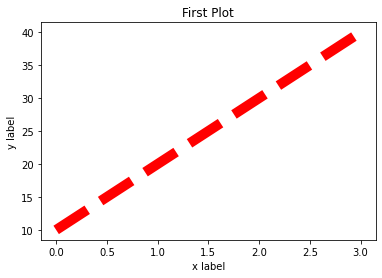

In [2]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot([10,20,30,40] , 'r--',linewidth =10 )
plt.xlabel('x label')
plt.ylabel('y label')
plt.title('First Plot')
plt.show()

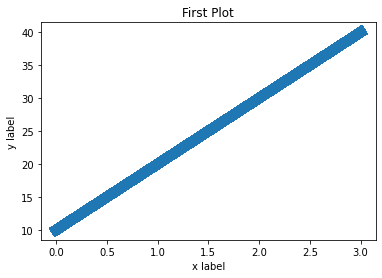

In [6]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot([10,20,30,40] ,antialiased= False ,linewidth=10)
plt.xlabel('x label')
plt.ylabel('y label')
plt.title('First Plot')
plt.show()

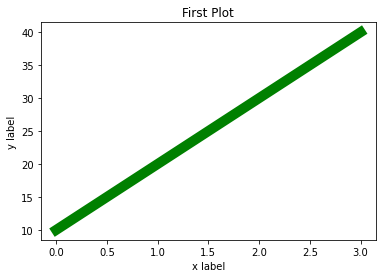

In [8]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot([10,20,30,40] , c = 'g',linewidth =10 )
plt.xlabel('x label')
plt.ylabel('y label')
plt.title('First Plot')
plt.show()

# dashes =  lenght + space

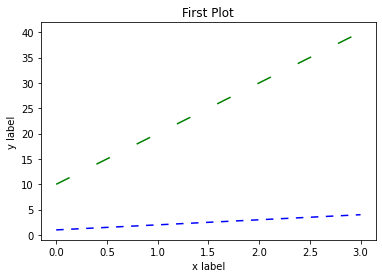

In [11]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot([10,20,30,40] , c = 'g',dashes=[10,20] )
plt.plot([1,2,3,4] , c = 'b',dashes=[5,5] )
plt.xlabel('x label')
plt.ylabel('y label')
plt.title('First Plot')
plt.show()

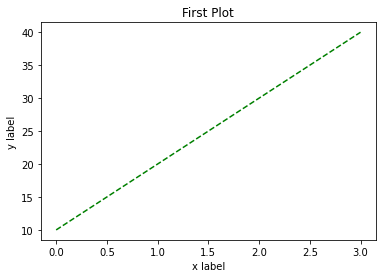

In [24]:
plt.plot([10,20,30,40],c = 'g',linestyle= 'dashed' )

plt.xlabel('x label')
plt.ylabel('y label')
plt.title('First Plot')
plt.show()

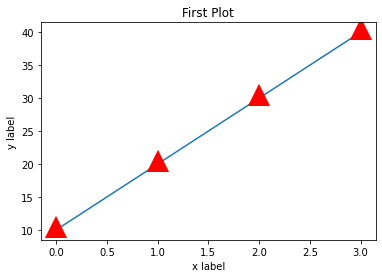

In [30]:
plt.plot([10,20,30,40],markeredgecolor = 'r',marker= '^',markeredgewidth=10)

plt.xlabel('x label')
plt.ylabel('y label')
plt.title('First Plot')
plt.show()

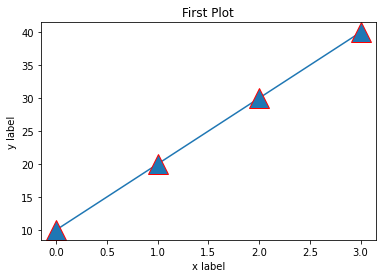

In [32]:
plt.plot([10,20,30,40],markeredgecolor = 'r',marker= '^',markersize=20)

plt.xlabel('x label')
plt.ylabel('y label')
plt.title('First Plot')
plt.show()

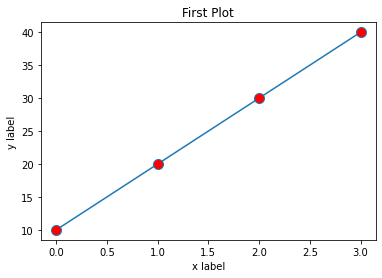

In [38]:
plt.plot([10,20,30,40],marker= '.',markerfacecolor='r',markersize =20)

plt.xlabel('x label')
plt.ylabel('y label')
plt.title('First Plot')
plt.show()

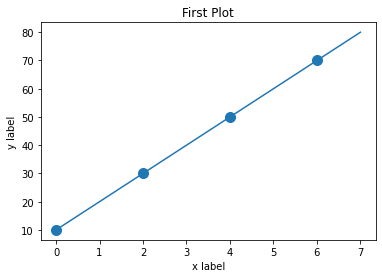

In [40]:
plt.plot([10,20,30,40,50,60,70,80],marker= '.',markevery=2,markersize =20)

plt.xlabel('x label')
plt.ylabel('y label')
plt.title('First Plot')
plt.show()

# Alpha And Zorder in Plot Function 

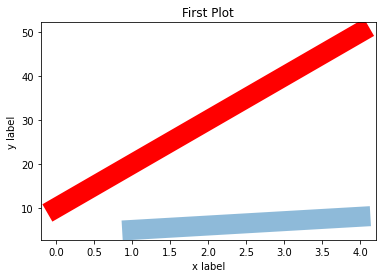

In [44]:
plt.plot([1,2,3,4],[5,6,7,8] ,alpha= 0.5,linewidth=20)
plt.plot([10,20,30,40,50] ,c='r',linewidth=20)


plt.xlabel('x label')
plt.ylabel('y label')
plt.title('First Plot')
plt.show()

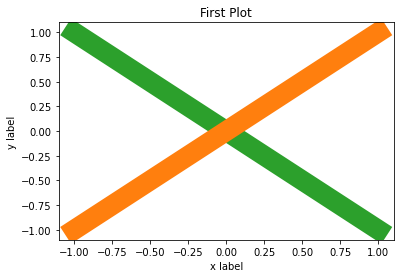

In [50]:
plt.plot([0,0],[-1,-1],linewidth=20,zorder=3)
plt.plot([-1,1,],[-1,1],linewidth=20,zorder=2)
plt.plot([-1,1],[1,-1],linewidth=20,zorder=1)

plt.xlabel('x label')
plt.ylabel('y label')
plt.title('First Plot')
plt.show()

# Setting The Label To The Axis

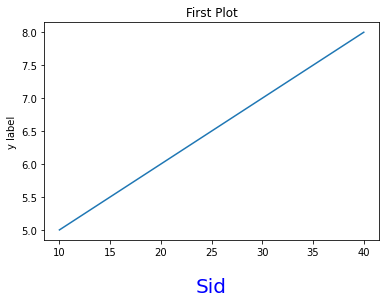

In [55]:
plt.plot([10,20,30,40],[5,6,7,8])

plt.xlabel('Sid',{'size':20,'color': 'blue'},labelpad=20)
plt.ylabel('y label')
plt.title('First Plot')
plt.show()

#kwargu


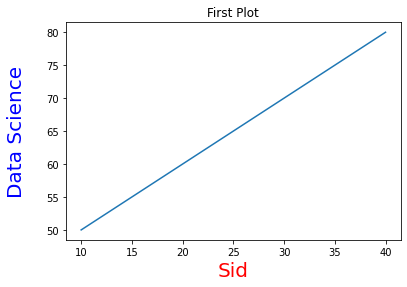

In [61]:
plt.plot([10,20,30,40],[50,60,70,80])

plt.xlabel('Sid',{'color': 'blue'},size=20,color='r')
plt.ylabel('Data Science',{'color':'green'},size=20,labelpad=20,color='b')
plt.title('First Plot')
plt.show()

# Font Properties in X label and Y label Function
 Size of Fontsize
 

![](img/fs.png)

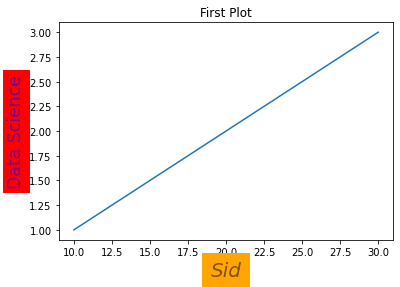

In [74]:
plt.plot([10,20,30],[1,2,3])

plt.xlabel('Sid',{'color':'black','backgroundcolor':'orange'},size=20,alpha=0.5,style='italic')
plt.ylabel('Data Science',size='xx-large',color ='b',alpha=0.5,backgroundcolor = 'r')
plt.title('First Plot')
plt.show()

![](img/fw.png)

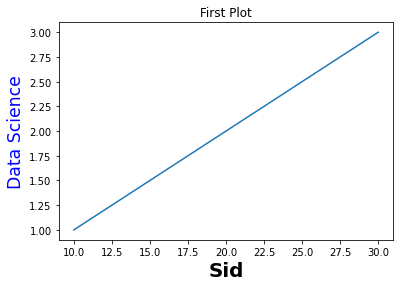

In [76]:
plt.plot([10,20,30],[1,2,3])

plt.xlabel('Sid',{'color':'black','weight':'black'},size=20)
plt.ylabel('Data Science',size='xx-large',color ='b',weight=200)
plt.title('First Plot')
plt.show()

# font family

![](img/ff.png)

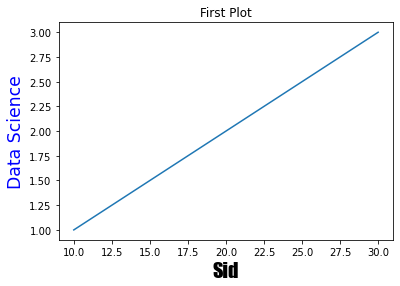

In [78]:
plt.plot([10,20,30],[1,2,3])

plt.xlabel('Sid',{'color':'black','weight':'black'},size=20,family= 'fantasy')
plt.ylabel('Data Science',size='xx-large',color ='b',weight=200)
plt.title('First Plot')
plt.show()

# How to Set The Title To The Plot 

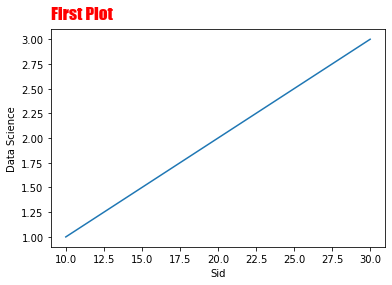

In [83]:
plt.plot([10,20,30],[1,2,3])

plt.xlabel('Sid')
plt.ylabel('Data Science')
plt.title('First Plot',{'size':'xx-large','color':'red'},family='fantasy',loc='left',pad=10)
# pas = distnance from 'title' to line plot
plt.show()

# Show Function In Pyplot

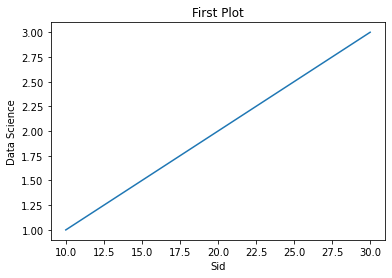

hello


In [85]:
plt.plot([10,20,30],[1,2,3])

plt.xlabel('Sid')
plt.ylabel('Data Science')
plt.title('First Plot')
# pas = distnance from 'title' to line plot
plt.show()
print('hello')

# Adding Grid Lines To The Plot

![](img/grid.png)

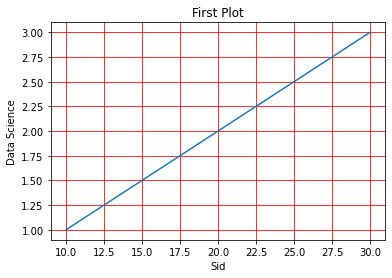

In [93]:
plt.plot([10,20,30],[1,2,3])

plt.xlabel('Sid')
plt.ylabel('Data Science')
plt.title('First Plot')
# pas = distnance from 'title' to line plot
plt.grid(visible=True,color='r')
plt.show()

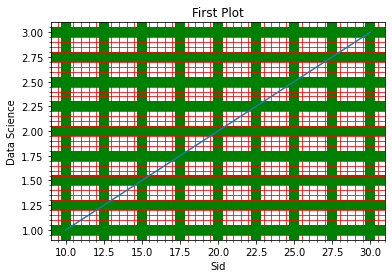

In [102]:
plt.plot([10,20,30],[1,2,3])

plt.xlabel('Sid')
plt.ylabel('Data Science')
plt.title('First Plot')
# pas = distnance from 'title' to line plot
plt.minorticks_on() # activate  - minor Grid lines
plt.grid(visible=True,color='r',which='minor')

plt.grid(visible=True,color='g',linewidth=10)
plt.show()

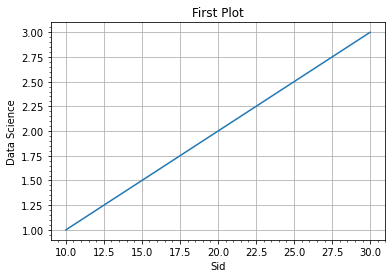

In [103]:
plt.plot([10,20,30],[1,2,3])

plt.xlabel('Sid')
plt.ylabel('Data Science')
plt.title('First Plot')
# pas = distnance from 'title' to line plot
plt.minorticks_on() # activate  - minor Grid lines
plt.grid(visible=True,axis='both')

plt.show()

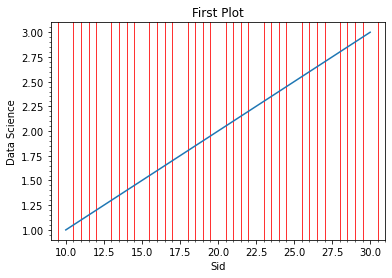

In [106]:
plt.plot([10,20,30],[1,2,3])

plt.xlabel('Sid')
plt.ylabel('Data Science')
plt.title('First Plot')
# pas = distnance from 'title' to line plot
plt.minorticks_on() # activate  - minor Grid lines
plt.grid(visible=True,axis='x',color='r',which='minor')

plt.show()

# Adjusting The Limits Of The Axis 

#Matplotlib is a library in Python and it is numerical – mathematical extension for NumPy library. Pyplot is a state-based interface to a Matplotlib module which provides a MATLAB-like interface. There are various plots which can be used in Pyplot are Line Plot, Contour, Histogram, Scatter, 3D Plot, etc.
#Sample Code

# sample code
import matplotlib.pyplot as plt 
    
plt.plot([1, 2, 3, 4], [16, 4, 1, 8]) 

plt.show() 

#matplotlib.pyplot.xlim() Function
The xlim() function in pyplot module of matplotlib library is used to get or set the x-limits of the current axes.

Syntax:

matplotlib.pyplot.xlim(*args, **kwargs)

Parameters: This method accept the following parameters that are described below:

left: This parameter is used to set the xlim to left.

right: This parameter is used to set the xlim to right.

**kwargs: This parameter is Text properties that is used to control the appearance of the labels.

Returns: This returns the following:

left, right: This returns the tuple of the new x-axis limits.

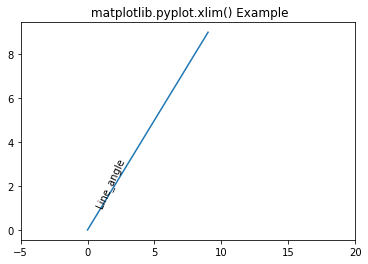

In [107]:
import matplotlib.pyplot as plt
import numpy as np
  
h = plt.plot(np.arange(0, 10), np.arange(0, 10))
plt.xlim([-5, 20])
l1 = np.array((1, 1))
angle = 65
  
th1 = plt.text(l1[0], l1[1], 'Line_angle',
               fontsize = 10, rotation = angle,
               rotation_mode ='anchor')
  
plt.title(" matplotlib.pyplot.xlim() Example")
plt.show()

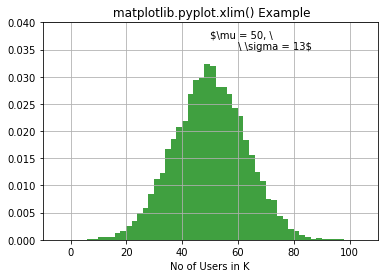

In [108]:
# Implementation of matplotlib function
import matplotlib.pyplot as plt
import numpy as np
  
np.random.seed(9680801)
  
mu, sigma = 50, 13
x = mu + sigma * np.random.randn(10000)
  
# the histogram of the data
n, bins, patches = plt.hist(x, 50,
                            density = True, 
                            facecolor ='g', 
                            alpha = 0.75)
  
  
plt.xlabel('No of Users in K')
plt.title('Histogram of IQ')
plt.text(50, .035, r'$\mu = 50, \
         \ \sigma = 13$')
  
plt.xlim(-10, 110)
plt.ylim(0, 0.04)
  
plt.grid(True)
plt.title(" matplotlib.pyplot.xlim() Example")
plt.show()

# Legend Function in Matplotlib
Matplotlib is one of the most popular Python packages used for data visualization. It is a cross-platform library for making 2D plots from data in arrays. Pyplot is a collection of command style functions that make matplotlib work like MATLAB. Each pyplot function makes some change to a figure: e.g., creates a figure, creates a plotting area in a figure, plots some lines in a plotting area, decorates the plot with labels, etc.

Matplotlib.pyplot.legend()

A legend is an area describing the elements of the graph. In the matplotlib library, there’s a function called legend() which is used to Place a legend on the axes.

The attribute Loc in legend() is used to specify the location of the legend.Default value of loc is loc=”best” (upper left). The strings ‘upper left’, ‘upper right’, ‘lower left’, ‘lower right’ place the legend at the corresponding corner of the axes/figure.

The attribute bbox_to_anchor=(x, y) of legend() function is used to specify the coordinates of the legend, and the attribute ncol represents the number of columns that the legend has.It’s default value is 1.



# Syntax:

matplotlib.pyplot.legend([“blue”, “green”], bbox_to_anchor=(0.75, 1.15), ncol=2)

The Following are some more attributes of function legend() :


shadow: [None or bool] Whether to draw a shadow behind the legend.It’s Default value is None.

markerscale: [None or int or float] The relative size of legend markers compared with the originally drawn ones.The 
Default is None.

numpoints: [None or int] The number of marker points in the legend when creating a legend entry for a Line2D (line).The Default is None.

fontsize: The font size of the legend.If the value is numeric the size will be the absolute font size in points.

facecolor: [None or “inherit” or color] The legend’s background color.

edgecolor: [None or “inherit” or color] The legend’s background patch edge color.

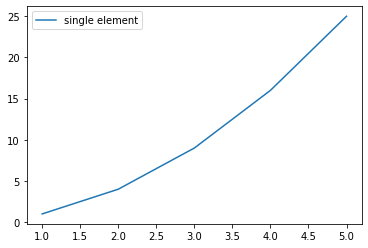

In [109]:
import numpy as np
import matplotlib.pyplot as plt
  
# X-axis values
x = [1, 2, 3, 4, 5]
  
# Y-axis values 
y = [1, 4, 9, 16, 25]
  
# Function to plot  
plt.plot(x, y)
  
# Function add a legend  
plt.legend(['single element'])
  
# function to show the plot
plt.show()

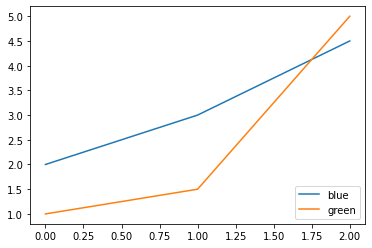

In [110]:
import numpy as np
import matplotlib.pyplot as plt
  
# Y-axis values
y1 = [2, 3, 4.5]
  
# Y-axis values 
y2 = [1, 1.5, 5]
  
# Function to plot  
plt.plot(y1)
plt.plot(y2)
  
# Function add a legend  
plt.legend(["blue", "green"], loc ="lower right")
  
# function to show the plot
plt.show()

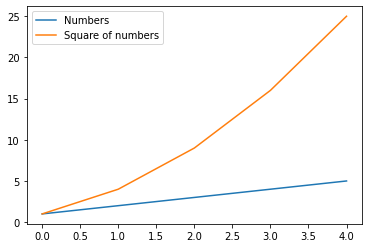

In [111]:
import numpy as np
import matplotlib.pyplot as plt
  
# X-axis values
x = np.arange(5)
  
# Y-axis values
y1 = [1, 2, 3, 4, 5]
  
# Y-axis values 
y2 = [1, 4, 9, 16, 25]
  
# Function to plot  
plt.plot(x, y1, label ='Numbers')
plt.plot(x, y2, label ='Square of numbers')
  
# Function add a legend  
plt.legend()
  
# function to show the plot
plt.show()

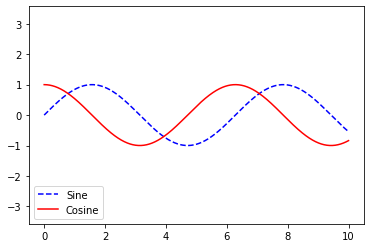

In [112]:
import numpy as np
import matplotlib.pyplot as plt
  
x = np.linspace(0, 10, 1000)
fig, ax = plt.subplots()
  
ax.plot(x, np.sin(x), '--b', label ='Sine')
ax.plot(x, np.cos(x), c ='r', label ='Cosine')
ax.axis('equal')
  
leg = ax.legend(loc ="lower left");

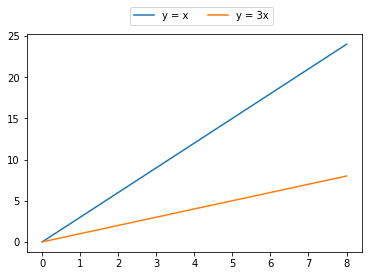

In [113]:
import numpy as np
import matplotlib.pyplot as plt
   
# X-axis values
x = [0, 1, 2, 3, 4, 5, 6, 7, 8]
   
# Y-axis values
y1 = [0, 3, 6, 9, 12, 15, 18, 21, 24]
# Y-axis values 
y2 = [0, 1, 2, 3, 4, 5, 6, 7, 8]
   
# Function to plot  
plt.plot(y1, label ="y = x")
plt.plot(y2, label ="y = 3x")
   
# Function add a legend  
plt.legend(bbox_to_anchor =(0.75, 1.15), ncol = 2)
   
# function to show the plot
plt.show()

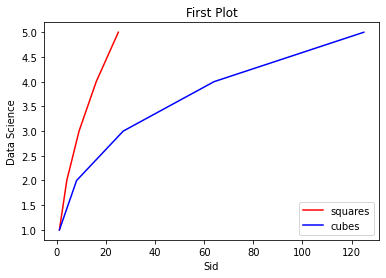

In [116]:
t=np.array([1,2,3,4,5])

plt.plot(t**2,t,c='r',label='squares')
plt.plot(t**3,t,c='b',label='cubes')


plt.xlabel('Sid')
plt.ylabel('Data Science')
plt.title('First Plot')

plt.legend()
plt.show()

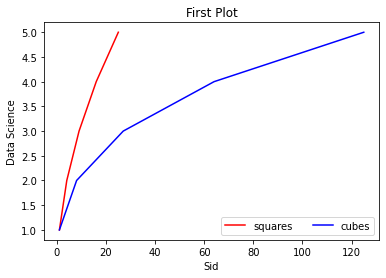

In [119]:


t=np.array([1,2,3,4,5])

plt.plot(t**2,t,c='r')
plt.plot(t**3,t,c='b')


plt.xlabel('Sid')
plt.ylabel('Data Science')
plt.title('First Plot')

plt.legend(['squares','cubes'],ncol=2)
plt.show()

# Loc code

![](img/loc_code_legend.png)

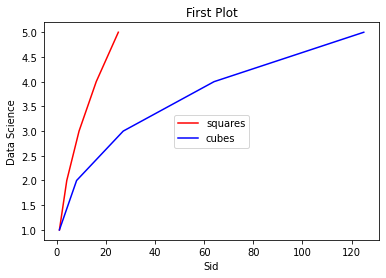

In [124]:
t=np.array([1,2,3,4,5])

plt.plot(t**2,t,c='r')
plt.plot(t**3,t,c='b')


plt.xlabel('Sid')
plt.ylabel('Data Science')
plt.title('First Plot')

plt.legend(['squares','cubes'],loc=10)
plt.show()

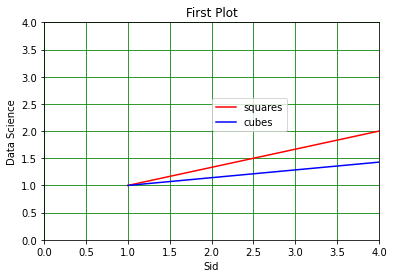

In [127]:
t=np.array([1,2,3,4,5])

plt.plot(t**2,t,c='r')
plt.plot(t**3,t,c='b')

plt.xlim(0,4)  # Bounding Box
plt.ylim(0,4)


plt.xlabel('Sid')
plt.ylabel('Data Science')
plt.title('First Plot')
plt.grid(color='g')

plt.legend(['squares','cubes'],loc=(0.5,0.5))
plt.show()

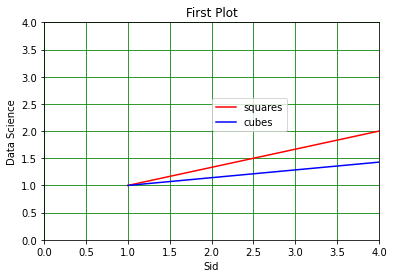

In [130]:
t=np.array([1,2,3,4,5])

plt.plot(t**2,t,c='r')
plt.plot(t**3,t,c='b')

plt.xlim(0,4)  # Bounding Box
plt.ylim(0,4)


plt.xlabel('Sid')
plt.ylabel('Data Science')
plt.title('First Plot')
plt.grid(color='g')

plt.legend(['squares','cubes'],loc=(3/4,2/4),bbox_to_anchor=(0.5,0.5))
plt.show()

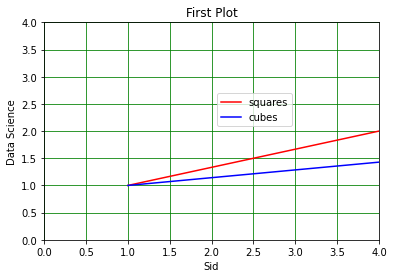

In [132]:
t=np.array([1,2,3,4,5])

plt.plot(t**2,t,c='r')
plt.plot(t**3,t,c='b')

plt.xlim(0,4)  # Bounding Box
plt.ylim(0,4)


plt.xlabel('Sid')
plt.ylabel('Data Science')
plt.title('First Plot')
plt.grid(color='g')

plt.legend(['squares','cubes'],loc=0,bbox_to_anchor=(0.5,0.5))
plt.show()

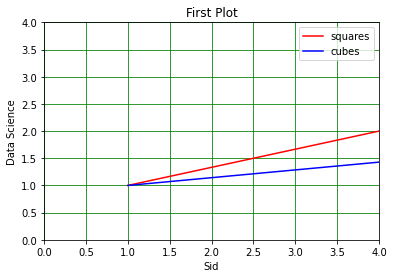

In [134]:
t=np.array([1,2,3,4,5])

plt.plot(t**2,t,c='r')
plt.plot(t**3,t,c='b')

plt.xlim(0,4)  # Bounding Box
plt.ylim(0,4)


plt.xlabel('Sid')
plt.ylabel('Data Science')
plt.title('First Plot')
plt.grid(color='g')

plt.legend(['squares','cubes'],loc=0,bbox_to_anchor=(1,1))
plt.show()

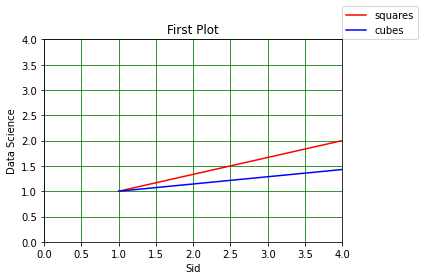

In [136]:
t=np.array([1,2,3,4,5])

plt.plot(t**2,t,c='r')
plt.plot(t**3,t,c='b')

plt.xlim(0,4)  # Bounding Box
plt.ylim(0,4)


plt.xlabel('Sid')
plt.ylabel('Data Science')
plt.title('First Plot')
plt.grid(color='g')

plt.legend(['squares','cubes'],loc=(1,1))
plt.tight_layout()
plt.show()

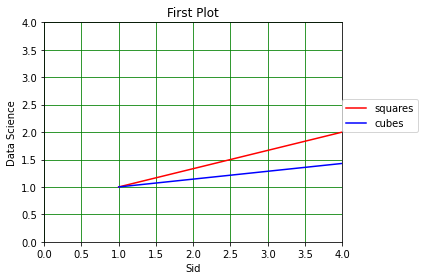

In [137]:
t=np.array([1,2,3,4,5])

plt.plot(t**2,t,c='r')
plt.plot(t**3,t,c='b')

plt.xlim(0,4)  # Bounding Box
plt.ylim(0,4)


plt.xlabel('Sid')
plt.ylabel('Data Science')
plt.title('First Plot')
plt.grid(color='g')

plt.legend(['squares','cubes'],loc=(1,0.5))
plt.tight_layout()
plt.show()

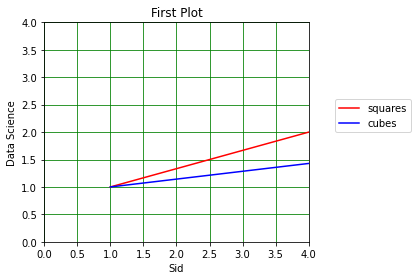

In [138]:
t=np.array([1,2,3,4,5])

plt.plot(t**2,t,c='r')
plt.plot(t**3,t,c='b')

plt.xlim(0,4)  # Bounding Box
plt.ylim(0,4)


plt.xlabel('Sid')
plt.ylabel('Data Science')
plt.title('First Plot')
plt.grid(color='g')

plt.legend(['squares','cubes'],loc=(1.1,0.5))
plt.tight_layout()
plt.show()

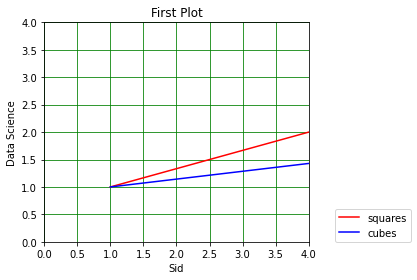

In [139]:
t=np.array([1,2,3,4,5])

plt.plot(t**2,t,c='r')
plt.plot(t**3,t,c='b')

plt.xlim(0,4)  # Bounding Box
plt.ylim(0,4)


plt.xlabel('Sid')
plt.ylabel('Data Science')
plt.title('First Plot')
plt.grid(color='g')

plt.legend(['squares','cubes'],loc=(1.1,0))
plt.tight_layout()
plt.show()

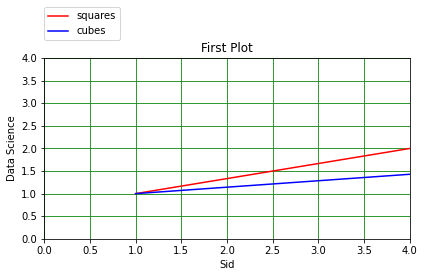

In [142]:
t=np.array([1,2,3,4,5])

plt.plot(t**2,t,c='r')
plt.plot(t**3,t,c='b')

plt.xlim(0,4)  # Bounding Box
plt.ylim(0,4)


plt.xlabel('Sid')
plt.ylabel('Data Science')
plt.title('First Plot')
plt.grid(color='g')

plt.legend(['squares','cubes'],loc=(0,1.1))
plt.tight_layout()
plt.show()

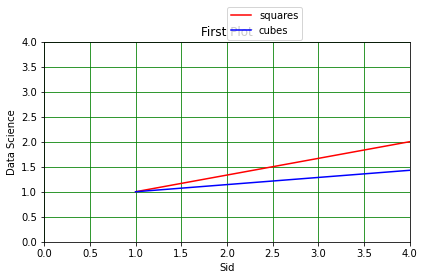

In [143]:
t=np.array([1,2,3,4,5])

plt.plot(t**2,t,c='r')
plt.plot(t**3,t,c='b')

plt.xlim(0,4)  # Bounding Box
plt.ylim(0,4)


plt.xlabel('Sid')
plt.ylabel('Data Science')
plt.title('First Plot')
plt.grid(color='g')

plt.legend(['squares','cubes'],loc=(0.5,1.01))
plt.tight_layout()
plt.show()

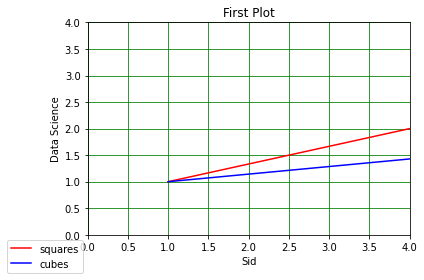

In [144]:
t=np.array([1,2,3,4,5])

plt.plot(t**2,t,c='r')
plt.plot(t**3,t,c='b')

plt.xlim(0,4)  # Bounding Box
plt.ylim(0,4)


plt.xlabel('Sid')
plt.ylabel('Data Science')
plt.title('First Plot')
plt.grid(color='g')

plt.legend(['squares','cubes'],loc=1,bbox_to_anchor=(0,0))
plt.tight_layout()
plt.show()

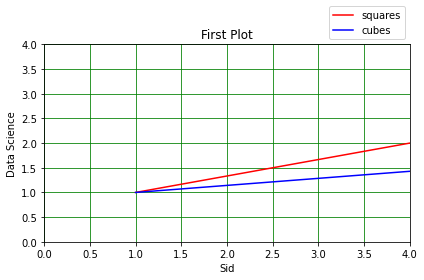

In [145]:
t=np.array([1,2,3,4,5])

plt.plot(t**2,t,c='r')
plt.plot(t**3,t,c='b')

plt.xlim(0,4)  # Bounding Box
plt.ylim(0,4)


plt.xlabel('Sid')
plt.ylabel('Data Science')
plt.title('First Plot')
plt.grid(color='g')

plt.legend(['squares','cubes'],loc=4,bbox_to_anchor=(1,1))
plt.tight_layout()
plt.show()

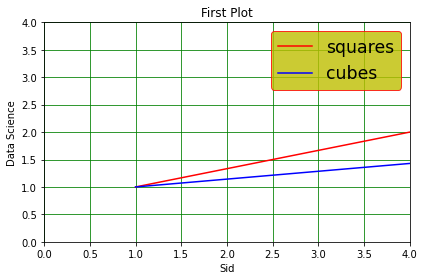

In [150]:
t=np.array([1,2,3,4,5])

plt.plot(t**2,t,c='r')
plt.plot(t**3,t,c='b')

plt.xlim(0,4)  # Bounding Box
plt.ylim(0,4)


plt.xlabel('Sid')
plt.ylabel('Data Science')
plt.title('First Plot')
plt.grid(color='g')

plt.legend(['squares','cubes'],loc=0,bbox_to_anchor=(1,1),fontsize='xx-large',facecolor='y',edgecolor='r')
plt.tight_layout()
plt.show()

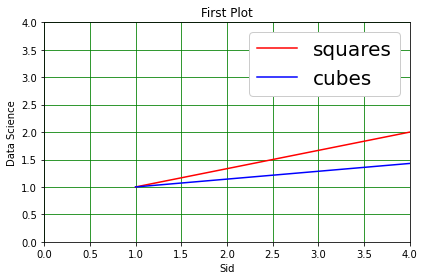

In [151]:
t=np.array([1,2,3,4,5])

plt.plot(t**2,t,c='r')
plt.plot(t**3,t,c='b')

plt.xlim(0,4)  # Bounding Box
plt.ylim(0,4)


plt.xlabel('Sid')
plt.ylabel('Data Science')
plt.title('First Plot')
plt.grid(color='g')

plt.legend(['squares','cubes'],loc=0,bbox_to_anchor=(1,1),facecolor='w',fontsize=20,framealpha=1)
plt.tight_layout()
plt.show()

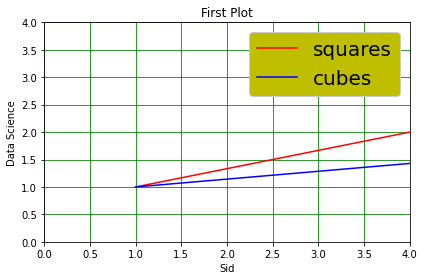

In [155]:
t=np.array([1,2,3,4,5])

plt.plot(t**2,t,c='r')
plt.plot(t**3,t,c='b')

plt.xlim(0,4)  # Bounding Box
plt.ylim(0,4)


plt.xlabel('Sid')
plt.ylabel('Data Science')
plt.title('First Plot')
plt.grid(color='g')

plt.legend(['squares','cubes'],loc=0,bbox_to_anchor=(1,1),facecolor='y',fontsize=20,framealpha=1)
plt.tight_layout()
plt.show()

![](img/lg.png)

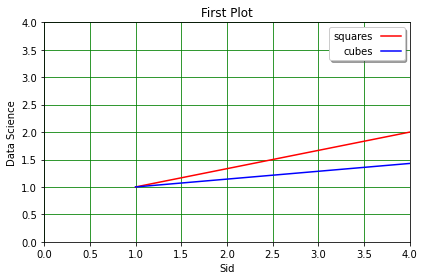

In [157]:
t=np.array([1,2,3,4,5])

plt.plot(t**2,t,c='r')
plt.plot(t**3,t,c='b')

plt.xlim(0,4)  # Bounding Box
plt.ylim(0,4)


plt.xlabel('Sid')
plt.ylabel('Data Science')
plt.title('First Plot')
plt.grid(color='g')

plt.legend(['squares','cubes'],loc=0,bbox_to_anchor=(1,1),markerfirst=False,shadow=True)
plt.tight_layout()
plt.show()

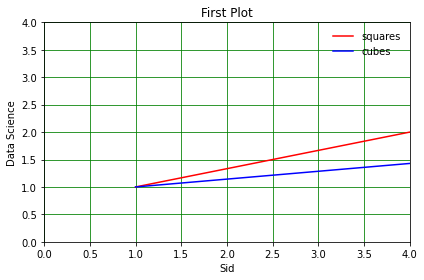

In [158]:
t=np.array([1,2,3,4,5])

plt.plot(t**2,t,c='r')
plt.plot(t**3,t,c='b')

plt.xlim(0,4)  # Bounding Box
plt.ylim(0,4)


plt.xlabel('Sid')
plt.ylabel('Data Science')
plt.title('First Plot')
plt.grid(color='g')

plt.legend(['squares','cubes'],loc=0,bbox_to_anchor=(1,1),frameon=False)
plt.tight_layout()
plt.show()

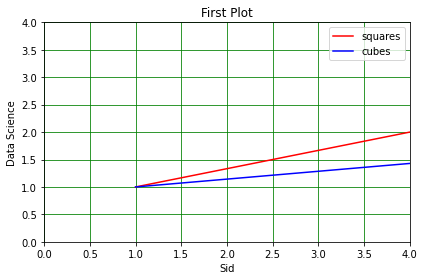

In [159]:
t=np.array([1,2,3,4,5])

plt.plot(t**2,t,c='r')
plt.plot(t**3,t,c='b')

plt.xlim(0,4)  # Bounding Box
plt.ylim(0,4)


plt.xlabel('Sid')
plt.ylabel('Data Science')
plt.title('First Plot')
plt.grid(color='g')

plt.legend(['squares','cubes'],loc=0,bbox_to_anchor=(1,1),frameon=True)
plt.tight_layout()
plt.show()

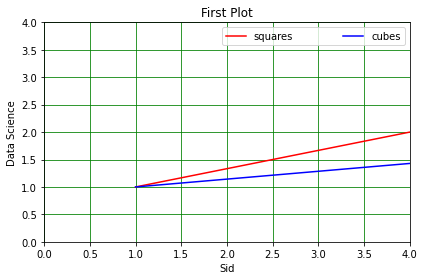

In [163]:
t=np.array([1,2,3,4,5])

plt.plot(t**2,t,c='r')
plt.plot(t**3,t,c='b')

plt.xlim(0,4)  # Bounding Box
plt.ylim(0,4)


plt.xlabel('Sid')
plt.ylabel('Data Science')
plt.title('First Plot')
plt.grid(color='g')

plt.legend(['squares','cubes'],loc=0,bbox_to_anchor=(1,1),ncol=2,columnspacing=5)
plt.tight_layout()
plt.show()

![](img/lgnd.png)

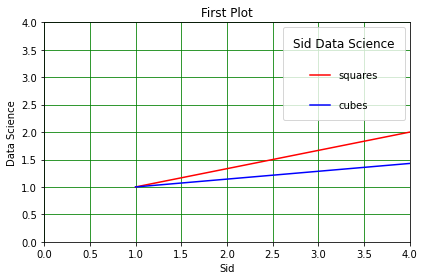

In [172]:
t=np.array([1,2,3,4,5])

plt.plot(t**2,t,c='r')
plt.plot(t**3,t,c='b')

plt.xlim(0,4)  # Bounding Box
plt.ylim(0,4)


plt.xlabel('Sid')
plt.ylabel('Data Science')
plt.title('First Plot')
plt.grid(color='g')

plt.legend(['squares','cubes'],title='Sid Data Science',title_fontsize='large',borderpad=1,labelspacing=2)
plt.tight_layout()
plt.show()

# xticks and yticks Function 

![](img/ticks.png)

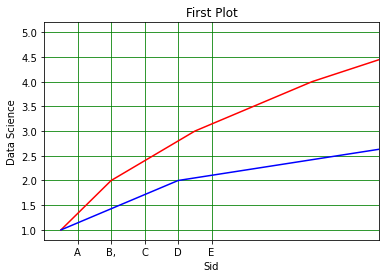

In [175]:
t=np.array([1,2,3,4,5])

plt.plot(t**2,t,c='r',label='squares')
plt.plot(t**3,t,c='b',label='cubes')


plt.xlim(0,20)
plt.xlabel('Sid')
plt.ylabel('Data Science')
plt.title('First Plot')
plt.grid(color='g')

plt.xticks([2,4,6,8,10],['A','B,','C','D','E'])
plt.show()

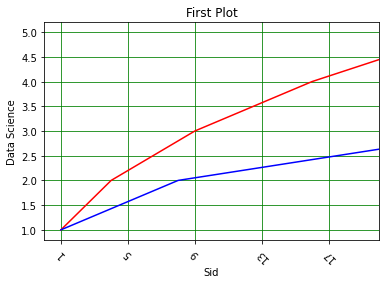

In [181]:
t=np.array([1,2,3,4,5])

plt.plot(t**2,t,c='r',label='squares')
plt.plot(t**3,t,c='b',label='cubes')


plt.xlim(0,20)
plt.xlabel('Sid')
plt.ylabel('Data Science')
plt.title('First Plot')
plt.grid(color='g')

plt.xticks(np.arange(1,21,step=4),rotation=135)
plt.show()

# tick_params Function

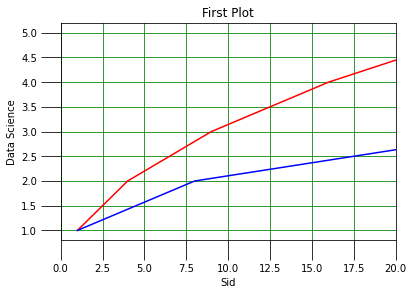

In [183]:
t=np.array([1,2,3,4,5])

plt.plot(t**2,t,c='r',label='squares')
plt.plot(t**3,t,c='b',label='cubes')


plt.xlim(0,20)
plt.xlabel('Sid')
plt.ylabel('Data Science')
plt.title('First Plot')
plt.grid(color='g')

plt.tick_params(length=20)
plt.show()

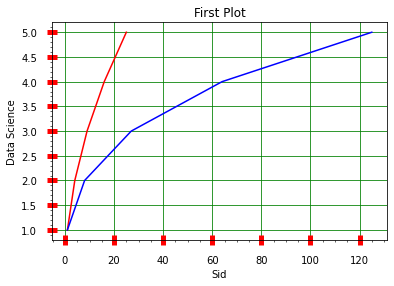

In [193]:
t=np.array([1,2,3,4,5])

plt.plot(t**2,t,c='r',label='squares')
plt.plot(t**3,t,c='b',label='cubes')


plt.minorticks_on()
plt.xlabel('Sid')
plt.ylabel('Data Science')
plt.title('First Plot')
plt.grid(color='g')

plt.tick_params(axis='both',length=10,width=5,color='r',pad=10,direction='inout')
plt.show()

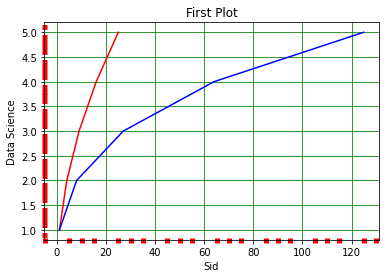

In [197]:
t=np.array([1,2,3,4,5])

plt.plot(t**2,t,c='r',label='squares')
plt.plot(t**3,t,c='b',label='cubes')


plt.minorticks_on()
plt.xlabel('Sid')
plt.ylabel('Data Science')
plt.title('First Plot')
plt.grid(color='g')

plt.tick_params(axis='both',length=5,width=5,color='r',direction='inout',which='minor')
plt.show()

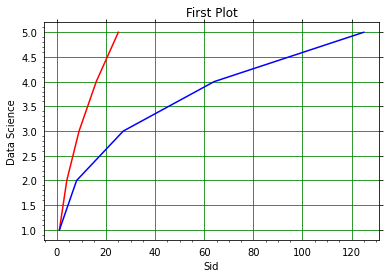

In [198]:
t=np.array([1,2,3,4,5])

plt.plot(t**2,t,c='r',label='squares')
plt.plot(t**3,t,c='b',label='cubes')


plt.minorticks_on()
plt.xlabel('Sid')
plt.ylabel('Data Science')
plt.title('First Plot')
plt.grid(color='g')

plt.tick_params(right=True,top=True,bottom=False,left=False)
plt.show()

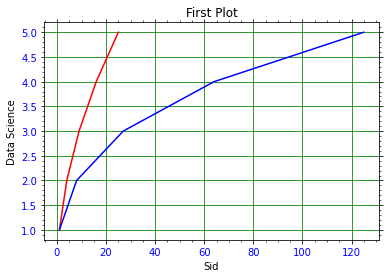

In [203]:
t=np.array([1,2,3,4,5])

plt.plot(t**2,t,c='r',label='squares')
plt.plot(t**3,t,c='b',label='cubes')


plt.minorticks_on()
plt.xlabel('Sid')
plt.ylabel('Data Science')
plt.title('First Plot')
plt.grid(color='g')

plt.tick_params(which='both',top=True,right=True,labelsize=10,labelcolor='b')
plt.show()

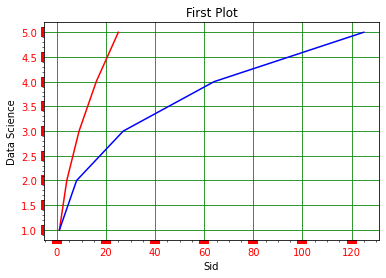

In [211]:
t=np.array([1,2,3,4,5])

plt.plot(t**2,t,c='r',label='squares')
plt.plot(t**3,t,c='b',label='cubes')


plt.minorticks_on()
plt.xlabel('Sid')
plt.ylabel('Data Science')
plt.title('First Plot')
plt.grid(color='g')

plt.tick_params(colors='r',width=10)
plt.show()

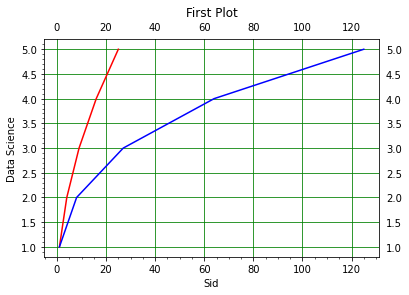

In [212]:
t=np.array([1,2,3,4,5])

plt.plot(t**2,t,c='r',label='squares')
plt.plot(t**3,t,c='b',label='cubes')


plt.minorticks_on()
plt.xlabel('Sid')
plt.ylabel('Data Science')
plt.title('First Plot')
plt.grid(color='g')

plt.tick_params(labeltop=True,labelright=True)

plt.show()

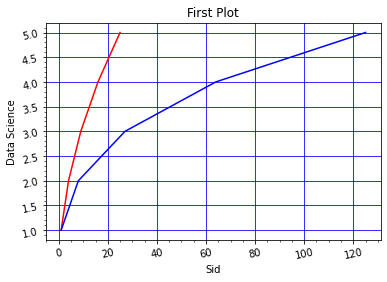

In [215]:
t=np.array([1,2,3,4,5])

plt.plot(t**2,t,c='r',label='squares')
plt.plot(t**3,t,c='b',label='cubes')


plt.minorticks_on()
plt.xlabel('Sid')
plt.ylabel('Data Science')
plt.title('First Plot')
plt.grid(color='g')

plt.tick_params(labelrotation=12,grid_color='b')

plt.show()

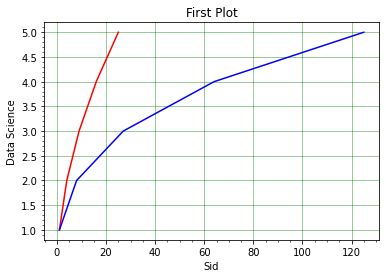

In [217]:
t=np.array([1,2,3,4,5])

plt.plot(t**2,t,c='r',label='squares')
plt.plot(t**3,t,c='b',label='cubes')


plt.minorticks_on()
plt.xlabel('Sid')
plt.ylabel('Data Science')
plt.title('First Plot')
plt.grid(color='g')

plt.tick_params(grid_alpha=0.5)

plt.show()

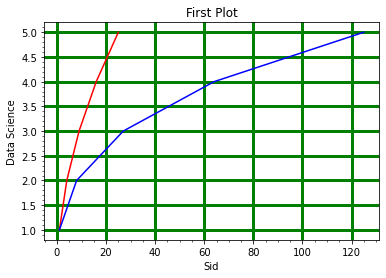

In [220]:
t=np.array([1,2,3,4,5])

plt.plot(t**2,t,c='r',label='squares')
plt.plot(t**3,t,c='b',label='cubes')


plt.minorticks_on()
plt.xlabel('Sid')
plt.ylabel('Data Science')
plt.title('First Plot')
plt.grid(color='g')

plt.tick_params(grid_linewidth=3)

plt.show()

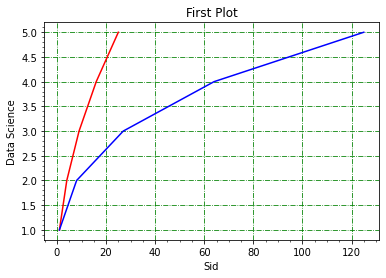

In [224]:
t=np.array([1,2,3,4,5])

plt.plot(t**2,t,c='r',label='squares')
plt.plot(t**3,t,c='b',label='cubes')


plt.minorticks_on()
plt.xlabel('Sid')
plt.ylabel('Data Science')
plt.title('First Plot')
plt.grid(color='g')

plt.tick_params(grid_linestyle='-.')

plt.show()

# Sine and Cosine Graph

In [225]:
import math

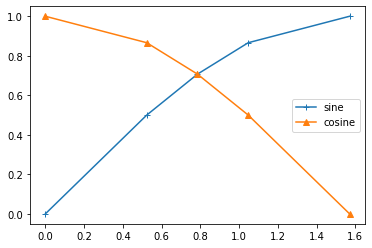

In [235]:
v = [0,30,45,60,90]
x= [i*(np.pi/180) for i in v]
plt.plot(x,np.sin(x),label='sine',marker='+')
plt.plot(x,np.cos(x),label='cosine',marker='^')



plt.legend()
plt.show()

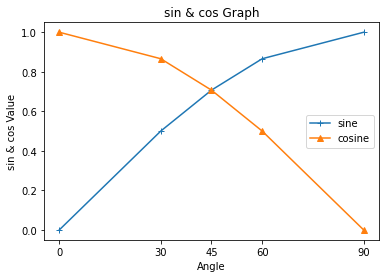

In [237]:
v = [0,30,45,60,90]
x= [i*(np.pi/180) for i in v]
plt.plot(v,np.sin(x),label='sine',marker='+')
plt.plot(v,np.cos(x),label='cosine',marker='^')

plt.title('sin & cos Graph')
plt.xlabel('Angle')
plt.ylabel('sin & cos Value')

plt.xticks(v)
plt.legend()
plt.show()

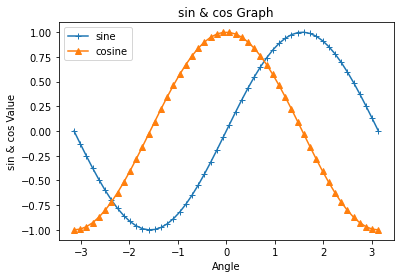

In [238]:
t = np.linspace(-np.pi,np.pi)

plt.plot(t,np.sin(t),label='sine',marker='+')
plt.plot(t,np.cos(t),label='cosine',marker='^')

plt.title('sin & cos Graph')
plt.xlabel('Angle')
plt.ylabel('sin & cos Value')

plt.legend()
plt.show()

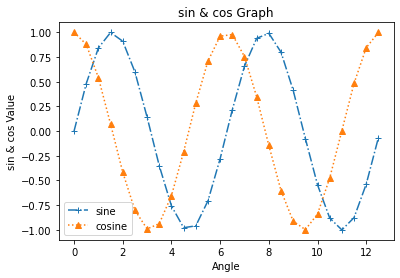

In [240]:
t = np.arange(0,4*np.pi,0.5)

plt.plot(t,np.sin(t),label='sine',marker='+',linestyle='-.')
plt.plot(t,np.cos(t),label='cosine',marker='^',linestyle =':')

plt.title('sin & cos Graph')
plt.xlabel('Angle')
plt.ylabel('sin & cos Value')

plt.legend()
plt.show()

# How To Add Text To The Plot

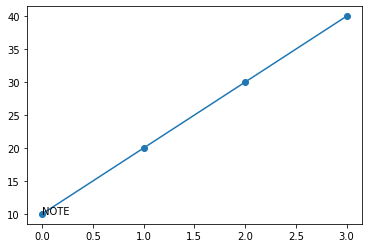

In [241]:
plt.plot([10,20,30,40],marker='o')
plt.text(0,10,'NOTE')

plt.show()

(8.5, 41.5)


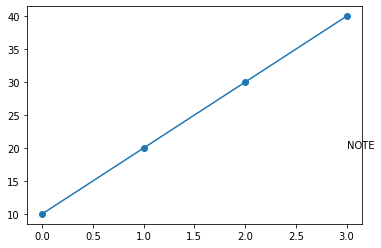

In [243]:
plt.plot([10,20,30,40],marker='o')
plt.text(3,20,'NOTE')
print(plt.ylim())

plt.show()

![](img/axes.png)

(8.5, 41.5)


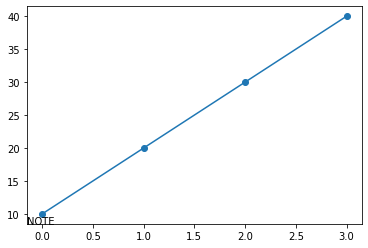

In [245]:

plt.plot([10,20,30,40],marker='o')
ax=plt.gca()
plt.text(0,0,'NOTE',transform=ax.transAxes)
print(plt.ylim())

plt.show()

(8.5, 41.5)


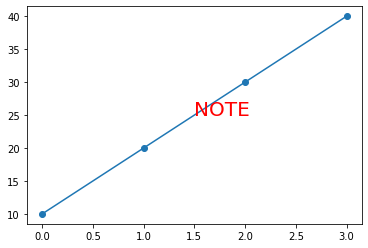

In [248]:
plt.plot([10,20,30,40],marker='o')
ax=plt.gca()
plt.text(0.5,0.5,'NOTE',{'size':20,'color':'red'},transform=ax.transAxes)
print(plt.ylim())

plt.show()

(8.5, 41.5)


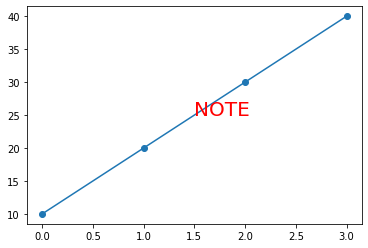

In [249]:
plt.plot([10,20,30,40],marker='o')
ax=plt.gca()
plt.text(0.5,0.5,'NOTE',size=20,color='r',transform=ax.transAxes)
print(plt.ylim())

plt.show()

# How To Add Annotation To The Plot 
# Demo  https://matplotlib.org/stable/gallery/text_labels_and_annotations/annotation_demo.html

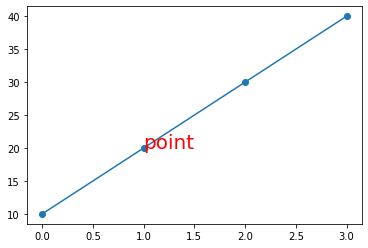

In [7]:
import matplotlib.pyplot as plt

plt.plot([10,20,30,40],marker='o')

plt.annotate('point',(1,20),size=20,color='r')  #  point  - labelled in the graph

plt.show()

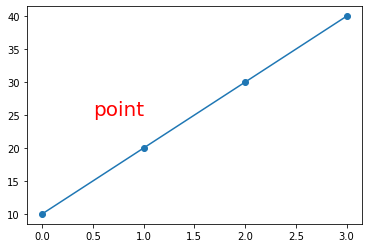

In [10]:
import matplotlib.pyplot as plt

plt.plot([10,20,30,40],marker='o')

plt.annotate('point',(1,20),(0.5,25),size=20,color='r')  #  point  - labelled in the graph

plt.show()

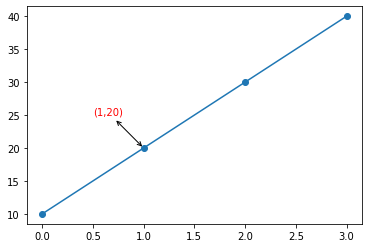

In [17]:
import matplotlib.pyplot as plt

plt.plot([10,20,30,40],marker='o')

plt.annotate('(1,20)',(1,20),(0.5,25),size=10,color='r',arrowprops={'arrowstyle':'<->'})  #  point  - labelled in the graph

plt.show()

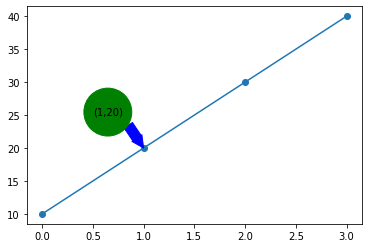

In [35]:
import matplotlib.pyplot as plt

plt.plot([10,20,30,40],marker='o')

plt.annotate('(1,20)',(1,20),(0.5,25),size=10,color='black',arrowprops={'width':10,'color':'b'},bbox={'color':'g','boxstyle':'circle,pad=0.9'})  #  point  - labelled in the graph

plt.show()

![](img/mat_lib.png)

# How To Add Box Around The Text in The Plot 

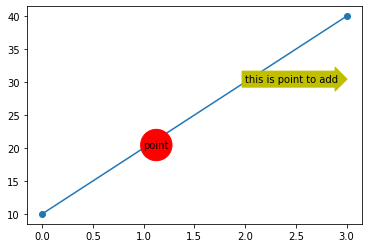

In [27]:
plt.plot([10,20,30,40],marker='o')

plt.text(1,20,'point',bbox={'color':'r','boxstyle':'circle'})
plt.text(2,30,'this is point to add',bbox={'color':'y','boxstyle':'rarrow'})

#plt.annotate('point',(1,20),(0.5,25),size=20,color='r')  #  point  - labelled in the graph

plt.show()

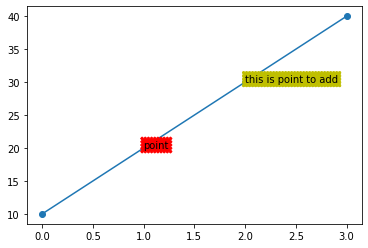

In [28]:
plt.plot([10,20,30,40],marker='o')

plt.text(1,20,'point',bbox={'color':'r','boxstyle':'sawtooth'})
plt.text(2,30,'this is point to add',bbox={'color':'y','boxstyle':'roundtooth'})

#plt.annotate('point',(1,20),(0.5,25),size=20,color='r')  #  point  - labelled in the graph

plt.show()

# Types of Plot 

![](img/plots.png)

![](img/lp.png)

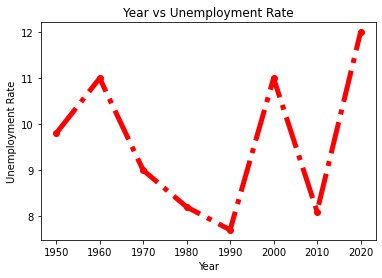

In [55]:
year = [1950,1960,1970,1980,1990,2000,2010,2020]
Unemploynment = [9.8, 11 , 9 ,8.2 , 7.7 , 11 , 8.1 , 12]

plt.plot(year,Unemploynment,marker ='o',linestyle='-.',color='r',linewidth=5)
plt.xlabel('Year')
plt.ylabel('Unemployment Rate')
plt.title('Year vs Unemployment Rate')

plt.show()

# Bar Graph | Bar Chart | Matplotlib 

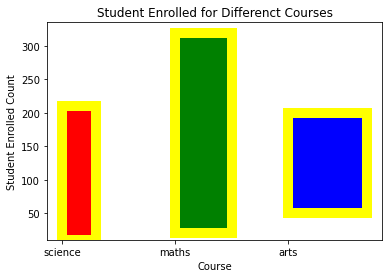

In [71]:
x = ['science','maths','arts']
y = [200,300,150]

w= [0.3,0.5,0.7]
b =[10,20,50]
c = ['red','green','blue']

plt.bar(x,y,color=c,width=w,bottom=b,align='edge',linewidth=10,edgecolor='yellow')
plt.xlabel('Course')
plt.ylabel('Student Enrolled Count')
plt.title('Student Enrolled for Differenct Courses')

plt.show()

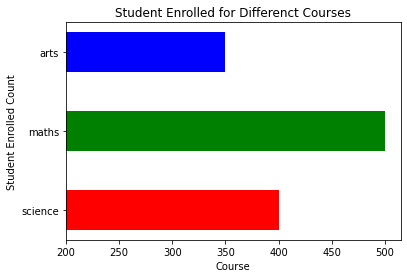

In [73]:
x = ['science','maths','arts']
y = [200,300,150]

b =[10,20,50]
c = ['red','green','blue']

plt.barh(x,y,0.5,color=c,left=200)
plt.xlabel('Course')
plt.ylabel('Student Enrolled Count')
plt.title('Student Enrolled for Differenct Courses')

plt.show()

# Stacked Bar Graph | Matplotlib

![](img/stacked.png)

![](img/stacked1.png)

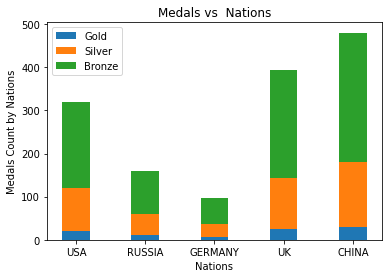

In [83]:
import numpy as np

x = ['USA','RUSSIA','GERMANY','UK','CHINA']
medals = [200,300,150,250,600]

gold = [20,10,6,24,30]
silver = [100,50,30,120,150]
bronze = [200,100,60,250,300]

b_bronze =np.add(gold,silver)

plt.bar(x,gold,0.4,label='Gold')
plt.bar(x,silver,0.4,bottom=gold,label='Silver')
plt.bar(x,bronze,0.4,bottom =b_bronze,label='Bronze')

plt.xlabel('Nations')
plt.ylabel('Medals Count by Nations')
plt.title('Medals vs  Nations')

plt.legend()
plt.show()

![](img/bbar.png)

![](img/bbar1.png)

![](img/err.png)

![](img/err1.png)

![](img/barh.png)

![](img/barh1.png)

# Histogram

![](img/histogram.png)

![](img/hist.png)

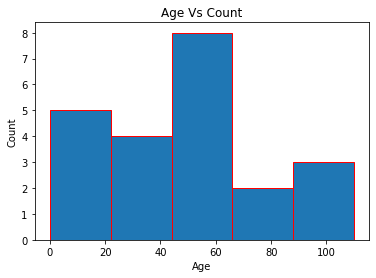

In [13]:
import matplotlib.pyplot as plt
import pandas as pd

x = [1,2,81,1,31,44,45,91,32,56,12,47,89,31,50,41,67,44,50,10,49,100]

w =0.4

plt.hist(x,5,(0,110),edgecolor='r')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Vs Count')

plt.show()

![](img/PD.png)

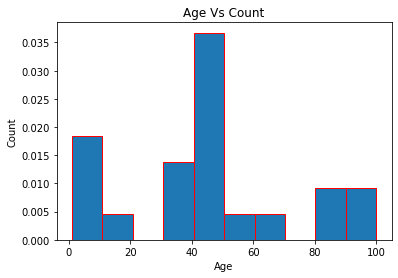

In [14]:
x = [1,2,81,1,31,44,45,91,32,56,12,47,89,31,50,41,67,44,50,10,49,100]

w =0.4

plt.hist(x,edgecolor='r',density=True)
# Cal -  PD  =  Total Count ( 8) / # no Count - 22 * bin width - 10
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Vs Count')

plt.show()

In [16]:
import numpy as np

np.random.randn(10,3)

array([[ 0.3547408 ,  0.5426814 ,  0.44271416],
       [-0.10430907, -0.72339483, -0.51351216],
       [ 0.84267988, -0.7610091 , -0.42081611],
       [-1.19437911, -0.65192094,  2.00826492],
       [ 1.13193857, -1.51356213, -0.56251542],
       [-0.48029423, -0.31655774,  0.86167847],
       [-0.36031706, -0.59236404, -0.4452976 ],
       [ 0.76130182,  0.40307884,  2.31699131],
       [ 0.69182458,  1.32474571,  0.56287813],
       [ 0.34523737,  0.43117568,  0.76794706]])

# Stacked Histogram 

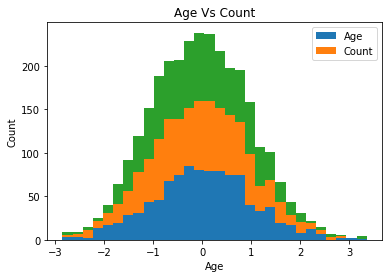

In [23]:

x = np.random.randn(1000,3)

w =0.4
plt.hist(x,30,histtype= 'barstacked',stacked=True)

plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Vs Count')

plt.legend(['Age','Count'])
plt.show()

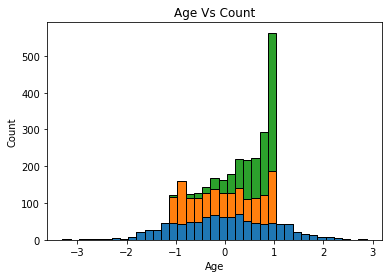

In [27]:
x = np.random.randn(1000)
y=np.sin(x)
z=np.cos(x)

plt.hist([x,y,z],bins='auto',ec='k',stacked=True)
#plt.hist(y,bins='auto',ec='k',alpha=0.5)
#plt.hist(z,bins='auto',ec='k',alpha=0.5)

plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Vs Count')

#plt.legend(['Age','Count'])
plt.show()

# DATA STRUCTURES  -- DS
What is Data Structure:

A data structure is a storage that is used to store and organize data. It is a way of arranging data on a computer so that it can be accessed and updated efficiently.

A data structure is not only used for organizing the data. It is also used for processing, retrieving, and storing data. There are different basic and advanced types of data structures that are used in almost every program or software system that has been developed. So we must have good knowledge about data structures. 

# Classification

![](img/ds.jpg)

#Linear data structure: Data structure in which data elements are arranged sequentially or linearly, where each element is attached to its previous and next adjacent elements, is called a linear data structure. 

Examples of linear data structures are array, stack, queue, linked list, etc.

Static data structure: Static data structure has a fixed memory size. It is easier to access the elements in a static data structure. 

An example of this data structure is an array.

Dynamic data structure: In dynamic data structure, the size is not fixed. It can be randomly updated during the runtime which may be considered efficient concerning the memory (space) complexity of the code. 
Examples of this data structure are queue, stack, etc.

Non-linear data structure: Data structures where data elements are not placed sequentially or linearly are called non-linear data structures. In a non-linear data structure, we can’t traverse all the elements in a single run only. 

Examples of non-linear data structures are trees and graphs.

#For example, we can store a list of items having the same data-type using the array data structure.

![](img/mloc.png)

# How Data Structure varies from Data Type:

We already have learned about data structure. Many times, what happens is that people get confused between data type and data structure. So let’s see a few differences between data type and data structure to make it clear.

![](img/dt_ds.png)

![](img/ds_dt_1.png)

# Need Of Data structure :

The structure of the data and the synthesis of the algorithm are relative to each other. Data presentation must be easy to understand so the developer, as well as the user, can make an efficient implementation of the operation.
Data structures provide an easy way of organizing, retrieving, managing, and storing data.
Here is a list of the needs for data.

Data structure modification is easy. 

It requires less time. 

Save storage memory space. 

Data representation is easy. 

Easy access to the large database.

# Difference between Linear and Non-linear Data Structures

# Linear Data Structure: 
Data structure where data elements are arranged sequentially or linearly where each and every element is attached to its previous and next adjacent is called a linear data structure. In linear data structure, single level is involved. Therefore, we can traverse all the elements in single run only. Linear data structures are easy to implement because computer memory is arranged in a linear way. Its examples are array, stack, queue, linked list, etc. 
 

1. Array

The array is a type of data structure that stores elements of the same type. These are the most basic and fundamental data structures. Data stored in each position of an array is given a positive value called the index of the element. The index helps in identifying the location of the elements in an array.

If supposedly we have to store some data i.e. the price of ten cars, then we can create a structure of an array and store all the integers together. This doesn’t need creating ten separate integer variables. Therefore, the lines in a code are reduced and memory is saved. The index value starts with 0 for the first element in the case of an array.

2. Stack

The data structure follows the rule of LIFO (Last In-First Out) where the data last added element is removed first. Push operation is used for adding an element of data on a stack and the pop operation is used for deleting the data from the stack. This can be explained by the example of books stacked together. In order to access the last book, all the books placed on top of the last book have to be safely removed.

3. Queue

This structure is almost similar to the stack as the data is stored sequentially. The difference is that the queue data structure follows FIFO which is the rule of First In-First Out where the first added element is to exit the queue first. Front and rear are the two terms to be used in a queue.

Enqueue is the insertion operation and dequeue is the deletion operation. The former is performed at the end of the queue and the latter is performed at the start end. The data structure might be explained with the example of people queuing up to ride a bus. The first person in the line will get the chance to exit the queue while the last person will be the last to exit.

4. Linked List

Linked lists are the types where the data is stored in the form of nodes which consist of an element of data and a pointer. The use of the pointer is that it points or directs to the node which is next to the element in the sequence. The data stored in a linked list might be of any form, strings, numbers, or characters. Both sorted and unsorted data can be stored in a linked list along with unique or duplicate elements.

5. Hash Tables

These types can be implemented as linear or non-linear data structures. The data structures consist of key-value pairs.



# Non-linear Data Structure: 
Data structures where data elements are not arranged sequentially or linearly are called non-linear data structures. In a non-linear data structure, single level is not involved. Therefore, we can’t traverse all the elements in single run only. Non-linear data structures are not easy to implement in comparison to linear data structure. It utilizes computer memory efficiently in comparison to a linear data structure. Its examples are trees and graphs.  

1. Trees

A tree data structure consists of various nodes linked together. The structure of a tree is hierarchical that forms a relationship like that of the parent and a child. The structure of the tree is formed in a way that there is one connection for every parent-child node relationship. Only one path should exist between the root to a node in the tree. Various types of trees are present based on their structures like AVL tree, binary tree, binary search tree, etc.

2. Graph

Graphs are those types of non-linear data structures which consist of a definite quantity of vertices and edges. The vertices or the nodes are involved in storing data and the edges show the vertices relationship. The difference between a graph to a tree is that in a graph there are no specific rules for the connection of nodes. Real-life problems like social networks, telephone networks, etc. can be represented through the graphs. 

 

![](img/LDS_NLDS.png)

# https://www.geeksforgeeks.org/data-structures/

![](img/ds11.png)

![](img/ds1.png)

#  List

ordered

List elements access by index 

Python Lists are just like dynamically sized arrays, declared in other languages (vector in C++ and ArrayList in Java). In simple language, a list is a collection of things, enclosed in [ ] and separated by commas. 

The list is a sequence data type which is used to store the collection of data. Tuples and String are other types of sequence data types.

Example of list in Python
Here we are creating Python List using [].



In [1]:

Var = ["Geeks", "for", "Geeks"]
print(Var)

['Geeks', 'for', 'Geeks']


#Lists are the simplest containers that are an integral part of the Python language. Lists need not be homogeneous always which makes it the most powerful tool in Python. A single list may contain DataTypes like Integers, Strings, as well as Objects. Lists are mutable, and hence, they can be altered even after their creation.

Creating a List in Python

Lists in Python can be created by just placing the sequence inside the square brackets[]. Unlike Sets, a list doesn’t need a built-in function for its creation of a list. 

Note: Unlike Sets, the list may contain mutable elements.  

# Complexities for Creating Lists
Time Complexity: O(1)

Space Complexity: O(n)

In [2]:
# Python program to demonstrate
# Creation of List
  
# Creating a List
List = []
print("Blank List: ")
print(List)
  
# Creating a List of numbers
List = [10, 20, 14]
print("\nList of numbers: ")
print(List)
  
# Creating a List of strings and accessing
# using index
List = ["Geeks", "For", "Geeks"]
print("\nList Items: ")
print(List[0])
print(List[2])

Blank List: 
[]

List of numbers: 
[10, 20, 14]

List Items: 
Geeks
Geeks


# Example 2:  Creating a list with multiple distinct or duplicate elements
A list may contain duplicate values with their distinct positions and hence, multiple distinct or duplicate values can be passed as a sequence at the time of list creation.




In [3]:
# Creating a List with
# the use of Numbers
# (Having duplicate values)
List = [1, 2, 4, 4, 3, 3, 3, 6, 5]
print("\nList with the use of Numbers: ")
print(List)
  
# Creating a List with
# mixed type of values
# (Having numbers and strings)
List = [1, 2, 'Geeks', 4, 'For', 6, 'Geeks']
print("\nList with the use of Mixed Values: ")
print(List)


List with the use of Numbers: 
[1, 2, 4, 4, 3, 3, 3, 6, 5]

List with the use of Mixed Values: 
[1, 2, 'Geeks', 4, 'For', 6, 'Geeks']


# Accessing elements from the List
In order to access the list items refer to the index number. 
Use the index operator [ ] to access an item in a list. 
The index must be an integer. Nested lists are accessed using nested indexing. 

Example 1: Accessing elements from list

In [4]:
# Python program to demonstrate
# accessing of element from list
  
# Creating a List with
# the use of multiple values
List = ["Geeks", "For", "Geeks"]
  
# accessing a element from the
# list using index number
print("Accessing a element from the list")
print(List[0])
print(List[2])

Accessing a element from the list
Geeks
Geeks


# Example 2: Accessing elements from a multi-dimensional list

In [5]:
# Creating a Multi-Dimensional List
# (By Nesting a list inside a List)
List = [['Geeks', 'For'], ['Geeks']]
  
# accessing an element from the
# Multi-Dimensional List using
# index number
print("Accessing a element from a Multi-Dimensional list")
print(List[0][1])
print(List[1][0])

Accessing a element from a Multi-Dimensional list
For
Geeks


# Negative indexing
In Python, negative sequence indexes represent positions from the end of the array. Instead of having to compute the offset as in List[len(List)-3], it is enough to just write List[-3]. Negative indexing means beginning from the end, -1 refers to the last item, -2 refers to the second-last item, etc.


Complexities for Accessing elements in a Lists:

Time Complexity: O(1)

Space Complexity: O(1)

In [6]:
List = [1, 2, 'Geeks', 4, 'For', 6, 'Geeks']
  
# accessing an element using
# negative indexing
print("Accessing element using negative indexing")
  
# print the last element of list
print(List[-1])
  
# print the third last element of list
print(List[-3])

Accessing element using negative indexing
Geeks
For


# Getting the size of Python list
Python len() is used to get the length of the list.

In [7]:
# Creating a List
List1 = []
print(len(List1))
  
# Creating a List of numbers
List2 = [10, 20, 14]
print(len(List2))

0
3


# Taking Input of a Python List
We can take the input of a list of elements as string, integer, float, etc. But the default one is a string.



![](img/list_ip.png)

![](img/list_ip1.png)

# Adding Elements to a Python List

Method 1: Using append() method

Elements can be added to the List by using the built-in append() function. Only one element at a time can be added to the list by using the append() method, for the addition of multiple elements with the append() method, loops are used. Tuples can also be added to the list with the use of the append method because tuples are immutable. Unlike Sets, Lists can also be added to the existing list with the use of the append() method.



Complexities for Adding elements in a Lists(append() method):

Time Complexity: O(1)

Space Complexity: O(1)

In [8]:

# Python program to demonstrate
# Addition of elements in a List
  
# Creating a List
List = []
print("Initial blank List: ")
print(List)
  
# Addition of Elements
# in the List
List.append(1)
List.append(2)
List.append(4)
print("\nList after Addition of Three elements: ")
print(List)
  
# Adding elements to the List
# using Iterator
for i in range(1, 4):
    List.append(i)
print("\nList after Addition of elements from 1-3: ")
print(List)
  
# Adding Tuples to the List
List.append((5, 6))
print("\nList after Addition of a Tuple: ")
print(List)
  
# Addition of List to a List
List2 = ['For', 'Geeks']
List.append(List2)
print("\nList after Addition of a List: ")
print(List)

Initial blank List: 
[]

List after Addition of Three elements: 
[1, 2, 4]

List after Addition of elements from 1-3: 
[1, 2, 4, 1, 2, 3]

List after Addition of a Tuple: 
[1, 2, 4, 1, 2, 3, (5, 6)]

List after Addition of a List: 
[1, 2, 4, 1, 2, 3, (5, 6), ['For', 'Geeks']]


# Method 2: Using insert() method
append() method only works for the addition of elements at the end of the List, for the addition of elements at the desired position, insert() method is used. Unlike append() which takes only one argument, the insert() method requires two arguments(position, value). 

# Complexities for Adding elements in a Lists(insert() method):
Time Complexity: O(n)

Space Complexity: O(1)

In [9]:
# Python program to demonstrate 
# Addition of elements in a List
   
# Creating a List
List = [1,2,3,4]
print("Initial List: ")
print(List)
  
# Addition of Element at 
# specific Position
# (using Insert Method)
List.insert(3, 12)
List.insert(0, 'Geeks')
print("\nList after performing Insert Operation: ")
print(List)

Initial List: 
[1, 2, 3, 4]

List after performing Insert Operation: 
['Geeks', 1, 2, 3, 12, 4]


# Method 3: Using extend() method
Other than append() and insert() methods, there’s one more method for the Addition of elements, extend(), this method is used to add multiple elements at the same time at the end of the list.

Note: append() and extend() methods can only add elements at the end.

# Complexities for Adding elements in a Lists(extend() method):
Time Complexity: O(n)

Space Complexity: O(1)

In [10]:
# Python program to demonstrate
# Addition of elements in a List
  
# Creating a List
List = [1, 2, 3, 4]
print("Initial List: ")
print(List)
  
# Addition of multiple elements
# to the List at the end
# (using Extend Method)
List.extend([8, 'Geeks', 'Always'])
print("\nList after performing Extend Operation: ")
print(List)

Initial List: 
[1, 2, 3, 4]

List after performing Extend Operation: 
[1, 2, 3, 4, 8, 'Geeks', 'Always']


# Reversing a List
A list can be reversed by using the reverse() method in Python.

In [11]:
# Reversing a list
mylist = [1, 2, 3, 4, 5, 'Geek', 'Python']
mylist.reverse()
print(mylist)

['Python', 'Geek', 5, 4, 3, 2, 1]


# Removing Elements from the List
Method 1: Using remove() method
Elements can be removed from the List by using the built-in remove() function but an Error arises if the element doesn’t exist in the list. Remove() method only removes one element at a time, to remove a range of elements, the iterator is used. The remove() method removes the specified item.

Note: Remove method in List will only remove the first occurrence of the searched element.

In [12]:
# Python program to demonstrate
# Removal of elements in a List
  
# Creating a List
List = [1, 2, 3, 4, 5, 6,
        7, 8, 9, 10, 11, 12]
print("Initial List: ")
print(List)
  
# Removing elements from List
# using Remove() method
List.remove(5)
List.remove(6)
print("\nList after Removal of two elements: ")
print(List)

Initial List: 
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

List after Removal of two elements: 
[1, 2, 3, 4, 7, 8, 9, 10, 11, 12]


# Complexities for Deleting elements in a Lists(remove() method):
Time Complexity: O(n)

Space Complexity: O(1)

In [13]:
# Creating a List
List = [1, 2, 3, 4, 5, 6,
        7, 8, 9, 10, 11, 12]
# Removing elements from List
# using iterator method
for i in range(1, 5):
    List.remove(i)
print("\nList after Removing a range of elements: ")
print(List)


List after Removing a range of elements: 
[5, 6, 7, 8, 9, 10, 11, 12]


# Method 2: Using pop() method
pop() function can also be used to remove and return an element from the list, but by default it removes only the last element of the list, to remove an element from a specific position of the List, the index of the element is passed as an argument to the pop() method.


Complexities for Deleting elements in a Lists(pop() method):

Time Complexity: O(1)/O(n) (O(1) for removing the last element, O(n) for removing the first and middle elements)

Space Complexity: O(1)

In [14]:
List = [1, 2, 3, 4, 5]
  
# Removing element from the
# Set using the pop() method
List.pop()
print("\nList after popping an element: ")
print(List)
  
# Removing element at a
# specific location from the
# Set using the pop() method
List.pop(2)
print("\nList after popping a specific element: ")
print(List)


List after popping an element: 
[1, 2, 3, 4]

List after popping a specific element: 
[1, 2, 4]


#Slicing of a List
We can get substrings and sublists using a slice. In Python List, there are multiple ways to print the whole list with all the elements, but to print a specific range of elements from the list, we use the Slice operation. 

Slice operation is performed on Lists with the use of a colon(:). 

To print elements from beginning to a range use:

[: Index]

To print elements from end-use:

[:-Index]

To print elements from a specific Index till the end use 

[Index:]

To print the whole list in reverse order, use 

[::-1]

Note – To print elements of List from rear-end, use Negative Indexes. 

![](img/slice11.jpg)

UNDERSTANDING SLICING OF LISTS:

pr[0] accesses the first item, 2.

pr[-4] accesses the fourth item from the end, 5.

pr[2:] accesses [5, 7, 11, 13], a list of items from third to last.

pr[:4] accesses [2, 3, 5, 7], a list of items from first to fourth.

pr[2:4] accesses [5, 7], a list of items from third to fifth.

pr[1::2] accesses [3, 7, 13], alternate items, starting from the second item.

In [15]:
  
# Creating a List
List = ['G', 'E', 'E', 'K', 'S', 'F',
        'O', 'R', 'G', 'E', 'E', 'K', 'S']
print("Initial List: ")
print(List)
  
# Print elements of a range
# using Slice operation
Sliced_List = List[3:8]
print("\nSlicing elements in a range 3-8: ")
print(Sliced_List)
  
# Print elements from a
# pre-defined point to end
Sliced_List = List[5:]
print("\nElements sliced from 5th "
      "element till the end: ")
print(Sliced_List)
  
# Printing elements from
# beginning till end
Sliced_List = List[:]
print("\nPrinting all elements using slice operation: ")
print(Sliced_List)


Initial List: 
['G', 'E', 'E', 'K', 'S', 'F', 'O', 'R', 'G', 'E', 'E', 'K', 'S']

Slicing elements in a range 3-8: 
['K', 'S', 'F', 'O', 'R']

Elements sliced from 5th element till the end: 
['F', 'O', 'R', 'G', 'E', 'E', 'K', 'S']

Printing all elements using slice operation: 
['G', 'E', 'E', 'K', 'S', 'F', 'O', 'R', 'G', 'E', 'E', 'K', 'S']


# Negative index List slicing

In [16]:
# Creating a List
List = ['G', 'E', 'E', 'K', 'S', 'F',
        'O', 'R', 'G', 'E', 'E', 'K', 'S']
print("Initial List: ")
print(List)
  
# Print elements from beginning
# to a pre-defined point using Slice
Sliced_List = List[:-6]
print("\nElements sliced till 6th element from last: ")
print(Sliced_List)
  
# Print elements of a range
# using negative index List slicing
Sliced_List = List[-6:-1]
print("\nElements sliced from index -6 to -1")
print(Sliced_List)
  
# Printing elements in reverse
# using Slice operation
Sliced_List = List[::-1]
print("\nPrinting List in reverse: ")
print(Sliced_List)


Initial List: 
['G', 'E', 'E', 'K', 'S', 'F', 'O', 'R', 'G', 'E', 'E', 'K', 'S']

Elements sliced till 6th element from last: 
['G', 'E', 'E', 'K', 'S', 'F', 'O']

Elements sliced from index -6 to -1
['R', 'G', 'E', 'E', 'K']

Printing List in reverse: 
['S', 'K', 'E', 'E', 'G', 'R', 'O', 'F', 'S', 'K', 'E', 'E', 'G']


# List Comprehension

Python List comprehensions are used for creating new lists from other iterables like tuples, strings, arrays, lists, etc. A list comprehension consists of brackets containing the expression, which is executed for each element along with the for loop to iterate over each element. 

Syntax:

newList = [ expression(element) for element in oldList if condition ]

In [17]:
# Python program to demonstrate list
# comprehension in Python
  
# below list contains square of all
# odd numbers from range 1 to 10
odd_square = [x ** 2 for x in range(1, 11) if x % 2 == 1]
print(odd_square)

[1, 9, 25, 49, 81]


In [18]:
# for understanding, above generation is same as,
odd_square = []
  
for x in range(1, 11):
    if x % 2 == 1:
        odd_square.append(x**2)
  
print(odd_square)

[1, 9, 25, 49, 81]


# Last part  - https://www.geeksforgeeks.org/python-lists/

# Refer to the below articles to get detailed information about List Comprehension.

Python List Comprehension and Slicing

Nested List Comprehensions in Python

List comprehension and ord() in Python

Basic Example on Python List

Python program to interchange first and last elements in a list

Python program to swap two elements in a list

Python – Swap elements in String list

Python | Ways to find length of list

Maximum of two numbers in Python

Minimum of two numbers in Python

To Practice the basic list operation, please read this article – Python List of program

# List Methods

![](img/LM.png)

![](img/built_in.png)

# Tuple in Python

#Python Tuple is a collection of objects separated by commas. 
In some ways, a tuple is similar to a list in terms of indexing, nested objects, and repetition but a tuple is immutable, unlike lists which are mutable.

Creating Python Tuples
To create a tuple we will use () operators.

#Accessing Values in Python Tuples

Method 1: Using Positive Index

Using square brackets we can get the values from tuples in Python.

In [19]:
var = ("Geeks", "for", "Geeks")
  
print("Value in Var[0] = ", var[0])
print("Value in Var[1] = ", var[1])
print("Value in Var[2] = ", var[2])

Value in Var[0] =  Geeks
Value in Var[1] =  for
Value in Var[2] =  Geeks


# Method 2: Using Negative Index.

In the above methods, we use the positive index to access the value in Python,
 and here we will use -ve index within [].

In [20]:

var = ("Geeks", "for", "Geeks")
  
print("Value in Var[-3] = ", var[-3])
print("Value in Var[-2] = ", var[-2])
print("Value in Var[-1] = ", var[-1])

Value in Var[-3] =  Geeks
Value in Var[-2] =  for
Value in Var[-1] =  Geeks


# Concatenation of Python Tuples
To concatenate the Python tuple we will use plus operators(+).

In [21]:

# Code for concatenating 2 tuples
  
tuple1 = (0, 1, 2, 3)
tuple2 = ('python', 'geek')
  
# Concatenating above two
print(tuple1 + tuple2)

(0, 1, 2, 3, 'python', 'geek')


#  Nesting of Python Tuples

In [22]:
 #Code for creating nested tuples
  
tuple1 = (0, 1, 2, 3)
tuple2 = ('python', 'geek')
tuple3 = (tuple1, tuple2)
print(tuple3)

((0, 1, 2, 3), ('python', 'geek'))


In [23]:
# Repitation
tuple3 = ('python',)*3
print(tuple3)

('python', 'python', 'python')


# Immutable Python Tuples

In [24]:
tuple1 = (0, 1, 2, 3)
tuple1[0] = 4
print(tuple1)

TypeError: 'tuple' object does not support item assignment

# Slicing Python Tuples

In [25]:
# code to test slicing
  
tuple1 = (0 ,1, 2, 3)
print(tuple1[1:])
print(tuple1[::-1])
print(tuple1[2:4])

(1, 2, 3)
(3, 2, 1, 0)
(2, 3)


In [26]:
# Code for deleting a tuple
  
tuple3 = ( 0, 1)
del tuple3
print(tuple3)

NameError: name 'tuple3' is not defined

In [27]:

# Code for printing the length of a tuple
  
tuple2 = ('python', 'geek')
print(len(tuple2))

2


In [28]:
# Code for converting a list and a string into a tuple
  
list1 = [0, 1, 2]
print(tuple(list1))
print(tuple('python')) # string 'python'

(0, 1, 2)
('p', 'y', 't', 'h', 'o', 'n')


In [29]:
# python code for creating tuples in a loop
  
tup = ('geek',)
n = 5  # Number of time loop runs
for i in range(int(n)):
    tup = (tup,)
    print(tup)

(('geek',),)
((('geek',),),)
(((('geek',),),),)
((((('geek',),),),),)
(((((('geek',),),),),),)


# Sets in Python

A Set is an unordered collection data type that is iterable, mutable and has no duplicate elements. 

Set is define in { }

The major advantage of using a set, as opposed to a list, is that it has a highly optimized method for checking whether a specific element is contained in the set. This is based on a data structure known as a hash table. Since sets are unordered, we cannot access items using indexes like we do in lists.

In [30]:
var = {"Geeks", "for", "Geeks"}
type(var)

set

In [31]:
# Python program to
# demonstrate sets
 
# Same as {"a", "b", "c"}
myset = set(["a", "b", "c"])
print(myset)
 
# Adding element to the set
myset.add("d")
print(myset)

{'b', 'c', 'a'}
{'d', 'b', 'c', 'a'}


# Python Frozen Sets
Frozen sets in Python are immutable objects that only support methods and operators that produce a result without affecting the frozen set or sets to which they are applied. It can be done with frozenset() method in Python.

While elements of a set can be modified at any time, elements of the frozen set remain the same after creation. 

If no parameters are passed, it returns an empty frozenset.

In [32]:
# Python program to demonstrate differences
# between normal and frozen set
 
# Same as {"a", "b","c"}
normal_set = set(["a", "b","c"])
 
print("Normal Set")
print(normal_set)
 
# A frozen set
frozen_set = frozenset(["e", "f", "g"])
 
print("\nFrozen Set")
print(frozen_set)
 
# Uncommenting below line would cause error as
# we are trying to add element to a frozen set
# frozen_set.add("h")

Normal Set
{'b', 'c', 'a'}

Frozen Set
frozenset({'f', 'g', 'e'})


# Internal working of Set
This is based on a data structure known as a hash table. 
If Multiple values are present at the same index position, then the value is appended to that index position, to form a Linked List. In, Python Sets are implemented using dictionary with dummy variables, where key beings the members set with greater optimizations to the time complexity.

![](img/st1.png)

![](img/st2.png)

# Methods for Sets
Adding elements
Insertion in set is done through set.add() function, where an appropriate record value is created to store in the hash table. Same as checking for an item, i.e., O(1) on average. However, in worst case it can become O(n)

In [33]:
# A Python program to
# demonstrate adding elements
# in a set
 
# Creating a Set
people = {"Jay", "Idrish", "Archi"}
 
print("People:", end = " ")
print(people)
 
# This will add Daxit
# in the set
people.add("Daxit")
 
# Adding elements to the
# set using iterator
for i in range(1, 6):
    people.add(i)
 
print("\nSet after adding element:", end = " ")
print(people)

People: {'Archi', 'Jay', 'Idrish'}

Set after adding element: {1, 'Idrish', 2, 3, 4, 5, 'Jay', 'Daxit', 'Archi'}


# Union
Two sets can be merged using union() function or | operator. Both Hash Table values are accessed and traversed with merge operation perform on them to combine the elements, at the same time duplicates are removed. Time Complexity of this is O(len(s1) + len(s2)) where s1 and s2 are two sets whose union needs to be don

In [34]:
# Python Program to
# demonstrate union of
# two sets
 
people = {"Jay", "Idrish", "Archil"}
vampires = {"Karan", "Arjun"}
dracula = {"Deepanshu", "Raju"}
 
# Union using union()
# function
population = people.union(vampires)
 
print("Union using union() function")
print(population)
 
# Union using "|"
# operator
population = people|dracula
 
print("\nUnion using '|' operator")
print(population)

Union using union() function
{'Idrish', 'Arjun', 'Archil', 'Jay', 'Karan'}

Union using '|' operator
{'Idrish', 'Archil', 'Deepanshu', 'Jay', 'Raju'}


# Intersection
This can be done through intersection() or & operator. Common Elements are selected. They are similar to iteration over the Hash lists and combining the same values on both the Table. Time Complexity of this is O(min(len(s1), len(s2)) where s1 and s2 are two sets whose union needs to be done.

In [36]:
 
set1 = set()
set2 = set()
 
for i in range(5):
    set1.add(i)
 
for i in range(3,9):
    set2.add(i)
 
# Intersection using
# intersection() function
set3 = set1.intersection(set2)
 
print("Intersection using intersection() function")
print(set3)
 
# Intersection using
# "&" operator
set3 = set1 & set2
 
print("\nIntersection using '&' operator")
print(set3)

Intersection using intersection() function
{3, 4}

Intersection using '&' operator
{3, 4}


# Difference
To find difference in between sets. Similar to find difference in linked list. This is done through difference() or – operator. Time complexity of finding difference s1 – s2 is O(len(s1))

In [37]:
 
set1 = set()
set2 = set()
 
for i in range(5):
    set1.add(i)
 
for i in range(3,9):
    set2.add(i)
 
# Difference of two sets
# using difference() function
set3 = set1.difference(set2)
 
print(" Difference of two sets using difference() function")
print(set3)
 
# Difference of two sets
# using '-' operator
set3 = set1 - set2
 
print("\nDifference of two sets using '-' operator")
print(set3)

 Difference of two sets using difference() function
{0, 1, 2}

Difference of two sets using '-' operator
{0, 1, 2}


# Clear() method empties the whole set.

In [38]:
# Python program to
# demonstrate clearing
# of set
 
set1 = {1,2,3,4,5,6}
 
print("Initial set")
print(set1)
 
# This method will remove
# all the elements of the set
set1.clear()
 
print("\nSet after using clear() function")
print(set1)

Initial set
{1, 2, 3, 4, 5, 6}

Set after using clear() function
set()


# However, there are two major pitfalls in Python sets: 

The set doesn’t maintain elements in any particular order.

Only instances of immutable types can be added to a Python set.

![](img//tc.png)

# Code Snippet to illustrate all Set operations in Python

In [40]:
# Creating two sets
set1 = set()
set2 = set()
 
# Adding elements to set1
for i in range(1, 6):
    set1.add(i)
 
# Adding elements to set2
for i in range(3, 8):
    set2.add(i)
 
print("Set1 = ", set1)
print("Set2 = ", set2)
print("\n")
 
# Union of set1 and set2
set3 = set1 | set2# set1.union(set2)
print("Union of Set1 & Set2: Set3 = ", set3)
 
# Intersection of set1 and set2
set4 = set1 & set2# set1.intersection(set2)
print("Intersection of Set1 & Set2: Set4 = ", set4)
print("\n")
 
# Checking relation between set3 and set4
if set3 > set4: # set3.issuperset(set4)
    print("Set3 is superset of Set4")
elif set3 < set4: # set3.issubset(set4)
    print("Set3 is subset of Set4")
else : # set3 == set4
    print("Set3 is same as Set4")
 
# displaying relation between set4 and set3
if set4 < set3: # set4.issubset(set3):
    print("Set4 is subset of Set3")
    print("\n")
 
# difference between set3 and set4
set5 = set3 - set4
print("Elements in Set3 and not in Set4: Set5 = ", set5)
print("\n")
 
# check if set4 and set5 are disjoint sets
if set4.isdisjoint(set5):
    print("Set4 and Set5 have nothing in common\n")
 
# Removing all the values of set5
set5.clear()
 
print("After applying clear on sets Set5: ")
print("Set5 = ", set5)

Set1 =  {1, 2, 3, 4, 5}
Set2 =  {3, 4, 5, 6, 7}


Union of Set1 & Set2: Set3 =  {1, 2, 3, 4, 5, 6, 7}
Intersection of Set1 & Set2: Set4 =  {3, 4, 5}


Set3 is superset of Set4
Set4 is subset of Set3


Elements in Set3 and not in Set4: Set5 =  {1, 2, 6, 7}


Set4 and Set5 have nothing in common

After applying clear on sets Set5: 
Set5 =  set()


# Python Dictionary

Dictionary in Python is a collection of keys values, used to store data values like a map, which, unlike other data types which hold only a single value as an element.

Example of Dictionary in Python 
Dictionary holds key:value pair. Key-Value is provided in the dictionary to make it more optimized. 

In [41]:
Dict = {1: 'Geeks', 2: 'For', 3: 'Geeks'}
print(Dict)

{1: 'Geeks', 2: 'For', 3: 'Geeks'}


# Creating a Dictionary
In Python, a dictionary can be created by placing a sequence of elements within curly {} braces, separated by ‘comma’. Dictionary holds pairs of values, one being the Key and the other corresponding pair element being its Key:value. Values in a dictionary can be of any data type and can be duplicated, whereas keys can’t be repeated and must be immutable. 

Note – Dictionary keys are case sensitive, the same name but different cases of Key will be treated distinctly. 

Dictionary can also be created by the built-in function dict(). An empty dictionary can be created by just placing to curly braces{}. 

 

In [42]:

# Creating a Dictionary
# with Integer Keys
Dict = {1: 'Geeks', 2: 'For', 3: 'Geeks'}
print("\nDictionary with the use of Integer Keys: ")
print(Dict)
  
# Creating a Dictionary
# with Mixed keys
Dict = {'Name': 'Geeks', 1: [1, 2, 3, 4]}
print("\nDictionary with the use of Mixed Keys: ")
print(Dict)


Dictionary with the use of Integer Keys: 
{1: 'Geeks', 2: 'For', 3: 'Geeks'}

Dictionary with the use of Mixed Keys: 
{'Name': 'Geeks', 1: [1, 2, 3, 4]}


In [43]:
# Creating an empty Dictionary
Dict = {}
print("Empty Dictionary: ")
print(Dict)
  
# Creating a Dictionary
# with dict() method
Dict = dict({1: 'Geeks', 2: 'For', 3: 'Geeks'})
print("\nDictionary with the use of dict(): ")
print(Dict)
  
# Creating a Dictionary
# with each item as a Pair
Dict = dict([(1, 'Geeks'), (2, 'For')])
print("\nDictionary with each item as a pair: ")
print(Dict)

Empty Dictionary: 
{}

Dictionary with the use of dict(): 
{1: 'Geeks', 2: 'For', 3: 'Geeks'}

Dictionary with each item as a pair: 
{1: 'Geeks', 2: 'For'}


# Complexities for Creating a Dictionary:
Time complexity: O(len(dict))

Space complexity: O(n)

![](img/nst_dict.jpg)

In [44]:
# Creating a Nested Dictionary
# as shown in the below image
Dict = {1: 'Geeks', 2: 'For',
        3: {'A': 'Welcome', 'B': 'To', 'C': 'Geeks'}}
  
print(Dict)

{1: 'Geeks', 2: 'For', 3: {'A': 'Welcome', 'B': 'To', 'C': 'Geeks'}}


# Adding elements to a Dictionary
Addition of elements can be done in multiple ways. One value at a time can be added to a Dictionary by defining value along with the key e.g. Dict[Key] = ‘Value’. Updating an existing value in a Dictionary can be done by using the built-in update() method. Nested key values can also be added to an existing Dictionary. 

Note- While adding a value, if the key-value already exists, the value gets updated otherwise a new Key with the value is added to the Dictionary.

In [45]:
# Creating an empty Dictionary
Dict = {}
print("Empty Dictionary: ")
print(Dict)
  
# Adding elements one at a time
Dict[0] = 'Geeks'
Dict[2] = 'For'
Dict[3] = 1
print("\nDictionary after adding 3 elements: ")
print(Dict)
  
# Adding set of values
# to a single Key
Dict['Value_set'] = 2, 3, 4
print("\nDictionary after adding 3 elements: ")
print(Dict)
  
# Updating existing Key's Value
Dict[2] = 'Welcome'
print("\nUpdated key value: ")
print(Dict)
  
# Adding Nested Key value to Dictionary
Dict[5] = {'Nested': {'1': 'Life', '2': 'Geeks'}}
print("\nAdding a Nested Key: ")
print(Dict)

Empty Dictionary: 
{}

Dictionary after adding 3 elements: 
{0: 'Geeks', 2: 'For', 3: 1}

Dictionary after adding 3 elements: 
{0: 'Geeks', 2: 'For', 3: 1, 'Value_set': (2, 3, 4)}

Updated key value: 
{0: 'Geeks', 2: 'Welcome', 3: 1, 'Value_set': (2, 3, 4)}

Adding a Nested Key: 
{0: 'Geeks', 2: 'Welcome', 3: 1, 'Value_set': (2, 3, 4), 5: {'Nested': {'1': 'Life', '2': 'Geeks'}}}


# Complexities for Adding elements in a Dictionary:
Time complexity: O(1)/O(n)

Space complexity: O(1)

# Accessing elements of a Dictionary
In order to access the items of a dictionary refer to its key name. Key can be used inside square brackets. 

There is also a method called get() that will also help in accessing the element from a dictionary.This method accepts key as argument and returns the value.

Complexities for Accessing elements in a Dictionary:
Time complexity: O(1)



In [46]:
# Python program to demonstrate
# accessing a element from a Dictionary
  
# Creating a Dictionary
Dict = {1: 'Geeks', 'name': 'For', 3: 'Geeks'}
  
# accessing a element using key
print("Accessing a element using key:")
print(Dict['name'])
  
# accessing a element using key
print("Accessing a element using key:")
print(Dict[1])

Accessing a element using key:
For
Accessing a element using key:
Geeks


In [47]:

# Creating a Dictionary
Dict = {1: 'Geeks', 'name': 'For', 3: 'Geeks'}
  
# accessing a element using get()
# method
print("Accessing a element using get:")
print(Dict.get(3))

Accessing a element using get:
Geeks


# Accessing an element of a nested dictionary

In order to access the value of any key in the nested dictionary, use indexing [] syntax.

In [48]:

# Creating a Dictionary
Dict = {'Dict1': {1: 'Geeks'},
        'Dict2': {'Name': 'For'}}
  
# Accessing element using key
print(Dict['Dict1'])
print(Dict['Dict1'][1])
print(Dict['Dict2']['Name'])

{1: 'Geeks'}
Geeks
For


![](img/dm.png)

In [49]:
# demo for all dictionary methods
dict1 = {1: "Python", 2: "Java", 3: "Ruby", 4: "Scala"}
  
# copy() method
dict2 = dict1.copy()
print(dict2)
  
# clear() method
dict1.clear()
print(dict1)
  
# get() method
print(dict2.get(1))
  
# items() method
print(dict2.items())
  
# keys() method
print(dict2.keys())
  
# pop() method
dict2.pop(4)
print(dict2)
  
# popitem() method
dict2.popitem()
print(dict2)
  
# update() method
dict2.update({3: "Scala"})
print(dict2)
  
# values() method
print(dict2.values())

{1: 'Python', 2: 'Java', 3: 'Ruby', 4: 'Scala'}
{}
Python
dict_items([(1, 'Python'), (2, 'Java'), (3, 'Ruby'), (4, 'Scala')])
dict_keys([1, 2, 3, 4])
{1: 'Python', 2: 'Java', 3: 'Ruby'}
{1: 'Python', 2: 'Java'}
{1: 'Python', 2: 'Java', 3: 'Scala'}
dict_values(['Python', 'Java', 'Scala'])


# Stack in Python

A stack is a linear data structure that stores items in a Last-In/First-Out (LIFO) or First-In/Last-Out (FILO) manner. In stack, a new element is added at one end and an element is removed from that end only. The insert and delete operations are often called push and pop.

![](img/stack.png)

![](img/stck_fun.png)

#list
Collections.deque

queue.LifoQueue

Implementation using list:

Python’s built-in data structure list can be used as a stack. Instead of push(), append() is used to add elements to the top of the stack while pop() removes the element in LIFO order. 
Unfortunately, the list has a few shortcomings. The biggest issue is that it can run into speed issues as it grows. The items in the list are stored next to each other in memory, if the stack grows bigger than the block of memory that currently holds it, then Python needs to do some memory allocations. This can lead to some append() calls taking much longer than other ones.



In [50]:
# Python program to
# demonstrate stack implementation
# using list
 
stack = []
 
# append() function to push
# element in the stack
stack.append('a')
stack.append('b')
stack.append('c')
 
print('Initial stack')
print(stack)
 
# pop() function to pop
# element from stack in
# LIFO order
print('\nElements popped from stack:')
print(stack.pop())
print(stack.pop())
print(stack.pop())
 
print('\nStack after elements are popped:')
print(stack)
 
# uncommenting print(stack.pop())
# will cause an IndexError
# as the stack is now empty

Initial stack
['a', 'b', 'c']

Elements popped from stack:
c
b
a

Stack after elements are popped:
[]


# Implementation using collections.deque:
Python stack can be implemented using the deque class from the collections module. Deque is preferred over the list in the cases where we need quicker append and pop operations from both the ends of the container, as deque provides an O(1) time complexity for append and pop operations as compared to list which provides O(n) time complexity. 

The same methods on deque as seen in the list are used, append() and pop().

In [51]:
# Python program to
# demonstrate stack implementation
# using collections.deque
 
from collections import deque
 
stack = deque()
 
# append() function to push
# element in the stack
stack.append('a')
stack.append('b')
stack.append('c')
 
print('Initial stack:')
print(stack)
 
# pop() function to pop
# element from stack in
# LIFO order
print('\nElements popped from stack:')
print(stack.pop())
print(stack.pop())
print(stack.pop())
 
print('\nStack after elements are popped:')
print(stack)
 
# uncommenting print(stack.pop())
# will cause an IndexError
# as the stack is now empty

Initial stack:
deque(['a', 'b', 'c'])

Elements popped from stack:
c
b
a

Stack after elements are popped:
deque([])


![](img/que.png)

In [52]:
 
from queue import LifoQueue
 
# Initializing a stack
stack = LifoQueue(maxsize=3)
 
# qsize() show the number of elements
# in the stack
print(stack.qsize())
 
# put() function to push
# element in the stack
stack.put('a')
stack.put('b')
stack.put('c')
 
print("Full: ", stack.full())
print("Size: ", stack.qsize())
 
# get() function to pop
# element from stack in
# LIFO order
print('\nElements popped from the stack')
print(stack.get())
print(stack.get())
print(stack.get())
 
print("\nEmpty: ", stack.empty())

0
Full:  True
Size:  3

Elements popped from the stack
c
b
a

Empty:  True


# Implementation using a singly linked list:

The linked list has two methods addHead(item) and 
removeHead() that run in constant time. 
These two methods are suitable to implement a stack. 

getSize()– Get the number of items in the stack.

isEmpty() – Return True if the stack is empty, False otherwise.

peek() – Return the top item in the stack. If the stack is empty, raise an exception.

push(value) – Push a value into the head of the stack.

pop() – Remove and return a value in the head of the stack. If the stack is empty, raise an exception.

In [53]:
 
class Node:
    def __init__(self, value):
        self.value = value
        self.next = None
 
 
class Stack:
 
    # Initializing a stack.
    # Use a dummy node, which is
    # easier for handling edge cases.
    def __init__(self):
        self.head = Node("head")
        self.size = 0
 
    # String representation of the stack
    def __str__(self):
        cur = self.head.next
        out = ""
        while cur:
            out += str(cur.value) + "->"
            cur = cur.next
        return out[:-3]
 
    # Get the current size of the stack
    def getSize(self):
        return self.size
 
    # Check if the stack is empty
    def isEmpty(self):
        return self.size == 0
 
    # Get the top item of the stack
    def peek(self):
 
        # Sanitary check to see if we
        # are peeking an empty stack.
        if self.isEmpty():
            raise Exception("Peeking from an empty stack")
        return self.head.next.value
 
    # Push a value into the stack.
    def push(self, value):
        node = Node(value)
        node.next = self.head.next
        self.head.next = node
        self.size += 1
 
    # Remove a value from the stack and return.
    def pop(self):
        if self.isEmpty():
            raise Exception("Popping from an empty stack")
        remove = self.head.next
        self.head.next = self.head.next.next
        self.size -= 1
        return remove.value
 
 
# Driver Code
if __name__ == "__main__":
    stack = Stack()
    for i in range(1, 11):
        stack.push(i)
    print(f"Stack: {stack}")
 
    for _ in range(1, 6):
        remove = stack.pop()
        print(f"Pop: {remove}")
    print(f"Stack: {stack}")

Stack: 10->9->8->7->6->5->4->3->2->
Pop: 10
Pop: 9
Pop: 8
Pop: 7
Pop: 6
Stack: 5->4->3->2->


![](img/FILO.png)

# Implement Stack Using List

![](img/stck.png)

![](img/app.png)

# Implement Stack using Modules |

![](img/stck1.png)

![](img/stck2.png)

![](img/stck3.png)

![](img/stck12.png)

![](img/stck13.png)

![](img/stck14.png)

![](img/stck5.png)

![](img/stck6.png)

# Queue in Python

#Like stack, queue is a linear data structure that stores items in First In First Out (FIFO) manner. With a queue the least recently added item is removed first. A good example of queue is any queue of consumers for a resource where the consumer that came first is served first.

![](img/q111.png)

# Operations associated with queue are: 
Enqueue: Adds an item to the queue. If the queue is full, then it is said to be an Overflow condition – Time Complexity : O(1)
Dequeue: Removes an item from the queue. The items are popped in the same order in which they are pushed. If the queue is empty, then it is said to be an Underflow condition – Time Complexity : O(1)
Front: Get the front item from queue – Time Complexity : O(1)
Rear: Get the last item from queue – Time Complexity : O(1)
 

Implementation

There are various ways to implement a queue in Python. This article covers the implementation of queue using data structures and modules from Python library.
Queue in Python can be implemented by the following ways:
 

list
collections.deque
queue.Queue
 

Implementation using list

List is a Python’s built-in data structure that can be used as a queue. Instead of enqueue() and dequeue(), append() and pop() function is used. However, lists are quite slow for this purpose because inserting or deleting an element at the beginning requires shifting all of the other elements by one, requiring O(n) time.
 



In [54]:
# Python program to 
# demonstrate queue implementation
# using list
  
# Initializing a queue
queue = []
  
# Adding elements to the queue
queue.append('a')
queue.append('b')
queue.append('c')
  
print("Initial queue")
print(queue)
  
# Removing elements from the queue
print("\nElements dequeued from queue")
print(queue.pop(0))
print(queue.pop(0))
print(queue.pop(0))
  
print("\nQueue after removing elements")
print(queue)
  
# Uncommenting print(queue.pop(0))
# will raise and IndexError
# as the queue is now empty

Initial queue
['a', 'b', 'c']

Elements dequeued from queue
a
b
c

Queue after removing elements
[]


# Implementation using collections.deque
Queue in Python can be implemented using deque class from the collections module. Deque is preferred over list in the cases where we need quicker append and pop operations from both the ends of container, as deque provides an O(1) time complexity for append and pop operations as compared to list which provides O(n) time complexity. Instead of enqueue and deque, append() and popleft() functions are used.
 



In [55]:
# Python program to
# demonstrate queue implementation
# using collections.dequeue
  
  
from collections import deque
  
# Initializing a queue
q = deque()
  
# Adding elements to a queue
q.append('a')
q.append('b')
q.append('c')
  
print("Initial queue")
print(q)
  
# Removing elements from a queue
print("\nElements dequeued from the queue")
print(q.popleft())
print(q.popleft())
print(q.popleft())
  
print("\nQueue after removing elements")
print(q)
  
# Uncommenting q.popleft()
# will raise an IndexError
# as queue is now empty

Initial queue
deque(['a', 'b', 'c'])

Elements dequeued from the queue
a
b
c

Queue after removing elements
deque([])


![](img/Q_1.png)

In [56]:
# Python program to
# demonstrate implementation of
# queue using queue module
  
  
from queue import Queue
  
# Initializing a queue
q = Queue(maxsize = 3)
  
# qsize() give the maxsize 
# of the Queue 
print(q.qsize()) 
  
# Adding of element to queue
q.put('a')
q.put('b')
q.put('c')
  
# Return Boolean for Full 
# Queue 
print("\nFull: ", q.full()) 
  
# Removing element from queue
print("\nElements dequeued from the queue")
print(q.get())
print(q.get())
print(q.get())
  
# Return Boolean for Empty 
# Queue 
print("\nEmpty: ", q.empty())
  
q.put(1)
print("\nEmpty: ", q.empty()) 
print("Full: ", q.full())
  
# This would result into Infinite 
# Loop as the Queue is empty. 
# print(q.get())

0

Full:  True

Elements dequeued from the queue
a
b
c

Empty:  True

Empty:  False
Full:  False


![](img/q_2.png)

![](img/q_3.png)

![](img/q_ops.png)

# Queue Implementation Using List

List + module

![](img/Q_4.png)

![](img/q_11.png)

![](img/q_12.png)

![](img/q_111.png)

![](img/q_21.png)

![](img/Q_i.png)

![](img/Q_pop.png)

![](img/q_chk.png)

![](img/Q_new.png)

![](img/q_appnd.png)

![](img/q_ppop.png)

![](img/q_iisrt.png)

![](img/pop1.png)

![](img/appnd.png)

# Priority Queues 

are abstract data structures where each data/value in the queue has a certain priority. For example, In airlines, baggage with the title “Business” or “First-class” arrives earlier than the rest.

Priority Queue is an extension of the queue with the following properties.

An element with high priority is dequeued before an element with low priority.
If two elements have the same priority, they are served according to their order in the queue.
Various applications of the Priority queue in Computer Science are:
Job Scheduling algorithms, CPU and Disk Scheduling, managing resources that are shared among different processes, etc.
Key differences between Priority Queue and Queue:

In Queue, the oldest element is dequeued first. While, in Priority Queue, an element based on the highest priority is dequeued.
When elements are popped out of a priority queue the result obtained is either sorted in Increasing order or in Decreasing Order. While, when elements are popped from a simple queue, a FIFO order of data is obtained in the result.
Below is a simple implementation of the priority queue.

In [57]:
# using Queue.
class PriorityQueue(object):
    def __init__(self):
        self.queue = []
 
    def __str__(self):
        return ' '.join([str(i) for i in self.queue])
 
    # for checking if the queue is empty
    def isEmpty(self):
        return len(self.queue) == 0
 
    # for inserting an element in the queue
    def insert(self, data):
        self.queue.append(data)
 
    # for popping an element based on Priority
    def delete(self):
        try:
            max_val = 0
            for i in range(len(self.queue)):
                if self.queue[i] > self.queue[max_val]:
                    max_val = i
            item = self.queue[max_val]
            del self.queue[max_val]
            return item
        except IndexError:
            print()
            exit()
 
if __name__ == '__main__':
    myQueue = PriorityQueue()
    myQueue.insert(12)
    myQueue.insert(1)
    myQueue.insert(14)
    myQueue.insert(7)
    print(myQueue)           
    while not myQueue.isEmpty():
        print(myQueue.delete())

12 1 14 7
14
12
7
1


#Note that the time complexity of delete is O(n) in the above code. A better implementation is to use Binary Heap which is typically used to implement a priority queue. Note that Python provides heapq in the library also.

Time complexity: By using heap data structure to implement Priority Queues

Insert Operation: O(log(n))

Delete Operation: O(log(n))

![](img/PQ.png)

![](img/pq1.png)

![](img/pq2.png)

![](img/pq11.png)

![](img/pclass.png)

![](img/pq3.png)

![](img/Q_pppop.png)

#  Linked List
Like arrays, Linked List is a linear data structure. Unlike arrays, linked list elements are not stored at a contiguous location; the elements are linked using pointers. They include a series of connected nodes. Here, each node stores the data and the address of the next node.



![](img/linked_list.png)

# Why Linked List? 
Arrays can be used to store linear data of similar types, but arrays have the following limitations:

The size of the arrays is fixed: So we must know the upper limit on the number of elements in advance. Also, generally, the allocated memory is equal to the upper limit irrespective of the usage. 
Insertion of a new element / Deletion of a existing element in an array of elements is expensive: The room has to be created for the new elements and to create room existing elements have to be shifted but in Linked list if we have the head node then we can traverse to any node through it and insert new node at the required position.
Example: 
In a system, if we maintain a sorted list of IDs in an array id[] = [1000, 1010, 1050, 2000, 2040]. 
If we want to insert a new ID 1005, then to maintain the sorted order, we have to move all the elements after 1000 (excluding 1000). 

Deletion is also expensive with arrays until unless some special techniques are used. For example, to delete 1010 in id[], everything after 1010 has to be moved due to this so much work is being done which affects the efficiency of the code.

# Advantages of Linked Lists over arrays:

Dynamic Array.
Ease of Insertion/Deletion.

Drawbacks of Linked Lists: 

Random access is not allowed. We have to access elements sequentially starting from the first node(head node). So we cannot do a binary search with linked lists efficiently with its default implementation. 
Extra memory space for a pointer is required with each element of the list. 
Not cache friendly. Since array elements are contiguous locations, there is locality of reference which is not there in case of linked lists.

Types of Linked Lists:

Simple Linked List – In this type of linked list, one can move or traverse the linked list in only one direction

Doubly Linked List – In this type of linked list, one can move or traverse the linked list in both directions (Forward and Backward)

Circular Linked List – In this type of linked list, the last node of the linked list contains the link of the first/head node of the linked list in its next pointer and the first/head node contains the link of the last node of the linked list in its prev pointer

Basic operations on Linked Lists:

Deletion
Insertion
Search
Display

Representation of Linked Lists: 
A linked list is represented by a pointer to the first node of the linked list. The first node is called the head of the linked list. If the linked list is empty, then the value of the head points to NULL. 

Each node in a list consists of at least two parts: 

A Data Item (we can store integer, strings, or any type of data).
Pointer (Or Reference) to the next node (connects one node to another) or An address of another node
In C, we can represent a node using structures. Below is an example of a linked list node with integer data. 
In Java or C#, LinkedList can be represented as a class and a Node as a separate class. The LinkedList class contains a reference of Node class type. 



In [1]:
# Node class
class Node:
  
    # Function to initialize the node object
    def __init__(self, data):
        self.data = data  # Assign data
        self.next = None  # Initialize
        # next as null
  
# Linked List class
  
  
class LinkedList:
  
    # Function to initialize the Linked
    # List object
    def __init__(self):
        self.head = None

In [2]:
# A simple Python program to introduce a linked list
  
# Node class
  
  
class Node:
  
    # Function to initialise the node object
    def __init__(self, data):
        self.data = data  # Assign data
        self.next = None  # Initialize next as null
  
  
# Linked List class contains a Node object
class LinkedList:
  
    # Function to initialize head
    def __init__(self):
        self.head = None
  
  
# Code execution starts here
if __name__ == '__main__':
  
    # Start with the empty list
    llist = LinkedList()
  
    llist.head = Node(1)
    second = Node(2)
    third = Node(3)
  
    '''
    Three nodes have been created.
    We have references to these three blocks as head,
    second and third
  
    llist.head        second              third
         |                |                  |
         |                |                  |
    +----+------+     +----+------+     +----+------+
    | 1  | None |     | 2  | None |     |  3 | None |
    +----+------+     +----+------+     +----+------+
    '''
  
    llist.head.next = second  # Link first node with second
  
    '''
    Now next of first Node refers to second.  So they
    both are linked.
  
    llist.head        second              third
         |                |                  |
         |                |                  |
    +----+------+     +----+------+     +----+------+
    | 1  |  o-------->| 2  | null |     |  3 | null |
    +----+------+     +----+------+     +----+------+ 
    '''
  
    second.next = third  # Link second node with the third node
  
    '''
    Now next of second Node refers to third.  So all three
    nodes are linked.
  
    llist.head        second              third
         |                |                  |
         |                |                  |
    +----+------+     +----+------+     +----+------+
    | 1  |  o-------->| 2  |  o-------->|  3 | null |
    +----+------+     +----+------+     +----+------+ 
    '''

# Traversal of a Linked List
In the previous program, we created a simple linked list with three nodes. Let us traverse the created list and print the data of each node. For traversal, let us write a general-purpose function printList() that prints any given list.



In [3]:
class Node:
  
    # Function to initialise the node object
    def __init__(self, data):
        self.data = data  # Assign data
        self.next = None  # Initialize next as null
  
  
# Linked List class contains a Node object
class LinkedList:
  
    # Function to initialize head
    def __init__(self):
        self.head = None
  
    # This function prints contents of linked list
    # starting from head
    def printList(self):
        temp = self.head
        while (temp):
            print(temp.data)
            temp = temp.next
  
  
# Code execution starts here
if __name__ == '__main__':
  
    # Start with the empty list
    llist = LinkedList()
  
    llist.head = Node(1)
    second = Node(2)
    third = Node(3)
  
    llist.head.next = second  # Link first node with second
    second.next = third  # Link second node with the third node
  
    llist.printList()

1
2
3


![](img/time_complex.png)

![](img/llink.png)

![](img/link1.png)

![](img/link2.png)

![](img/link22.png)

![](img/sll.png)

![](img/sll_ops.png)

![](img/sll_add.png)

![](img/sll_work.png)

![](img/sll_ops1.png)

![](img/ll_ops1.png)

# Y Ref

![](img/ll_ops2.png)

![](img/del_ll.png)

![](img/del_ll1.png)

![](img/del_ll2.png)

![](img/del_last.png)

![](img/del_mid.png)

![](img/del_mid1.png)

![](img/traversal.png)

# Python Program For Inserting A Node In A Linked List

# created a simple linked list with 3 nodes and discussed linked list traversal.
All programs discussed in this post consider the following representations of linked list. 

In [7]:
# Node class
class Node:
 
    # Function to initialize the
    # node object
    def __init__(self, data):
 
        # Assign data
        self.data = data 
   
        # Initialize next as null
        self.next = None 
 
# Linked List class
class LinkedList:
   
    # Function to initialize the
    # Linked List object
    def __init__(self):
        self.head = None

#In this post, methods to insert a new node in linked list are discussed. A node can be added in three ways 
1) At the front of the linked list 
2) After a given node. 
3) At the end of the linked list.

# Add a node at the front: (4 steps process) 
The new node is always added before the head of the given Linked List. And newly added node becomes the new head of the Linked List. For example, if the given Linked List is 10->15->20->25 and we add an item 5 at the front, then the Linked List becomes 5->10->15->20->25. Let us call the function that adds at the front of the list is push(). The push() must receive a pointer to the head pointer, because push must change the head pointer to point to the new node (See this)


# Time complexity of push() is O(1) as it does a constant amount of work.

![](img/first.png)

In [8]:
# This function is in LinkedList class
# Function to insert a new node at
# the beginning
def push(self, new_data):
 
    # 1 & 2: Allocate the Node &
    #        Put in the data
    new_node = Node(new_data)
         
    # 3. Make next of new Node as head
    new_node.next = self.head
         
    # 4. Move the head to point to new Node
    self.head = new_node

# Add a node after a given node: (5 steps process) 
We are given a pointer to a node, and the new node is inserted after the given node.

# Time complexity of insertAfter() is O(1) as it does a constant amount of work.

![](img/middle.png)

In [9]:
# This function is in LinkedList class.
# Inserts a new node after the given
# prev_node. This method is defined
# inside LinkedList class shown above
def insertAfter(self, prev_node, new_data):
 
    # 1. Check if the given prev_node exists
    if prev_node is None:
        print( "The given previous node must in LinkedList.")
        return
 
    # 2. Create new node &
    # 3. Put in the data
    new_node = Node(new_data)
 
    # 4. Make next of new Node as next of prev_node
    new_node.next = prev_node.next
 
    # 5. make next of prev_node as new_node
    prev_node.next = new_node

# Add a node at the end: (6 steps process) 
The new node is always added after the last node of the given Linked List. For example if the given Linked List is 5->10->15->20->25 and we add an item 30 at the end, then the Linked List becomes 5->10->15->20->25->30. 
Since a Linked List is typically represented by the head of it, we have to traverse the list till the end and then change the next to last node to a new node.
 

![](img/end.png)

In [10]:
# This function is defined in Linked List
# class appends a new node at the end. 
# This method is defined inside LinkedList
# class shown above
def append(self, new_data):
 
   # 1. Create a new node
   # 2. Put in the data
   # 3. Set next as None
   new_node = Node(new_data)
 
   # 4. If the Linked List is empty, then
   #    make the new node as head
   if self.head is None:
        self.head = new_node
        return
 
   # 5. Else traverse till the last node
   last = self.head
   while (last.next):
       last = last.next
 
   # 6. Change the next of last node
   last.next =  new_node

#Time complexity of append is O(n) where n is the number of nodes in the linked list. Since there is a loop from head to end, the function does O(n) work. 
This method can also be optimized to work in O(1) by keeping an extra pointer to the tail of the linked list/

# Following is a complete program that uses all of the above methods to create a linked list.

In [16]:
# A complete working Python program to demonstrate all
# insertion methods of linked list
 
# Node class
class Node:
 
    # Function to initialize the
    # node object
    def __init__(self, data):
 
        # Assign data
        self.data = data 
 
        # Initialize next as null
        self.next = None 
 
 
# Linked List class contains a
# Node object
class LinkedList:
 
    # Function to initialize head
    def __init__(self):
        self.head = None
 
    # Functio to insert a new node at
    # the beginning
    def push(self, new_data):
 
        # 1 & 2: Allocate the Node &
        #        Put in the data
        new_node = Node(new_data)
 
        # 3. Make next of new Node as head
        new_node.next = self.head
 
        # 4. Move the head to point to new Node
        self.head = new_node
 
 
    # This function is in LinkedList class.
    # Inserts a new node after the given
    # prev_node. This method is defined
    # inside LinkedList class shown above
    def insertAfter(self, prev_node, new_data):
 
        # 1. Check if the given prev_node exists
        if prev_node is None:
            print("The given previous node must inLinkedList.")
            return
 
        #  2. Create new node &
        #     Put in the data
        new_node = Node(new_data)
 
        # 4. Make next of new Node as next
        #    of prev_node
        new_node.next = prev_node.next
 
        # 5. make next of prev_node as new_node
        prev_node.next = new_node
 
 
    # This function is defined in Linked List class
    # Appends a new node at the end.  This method is
    # defined inside LinkedList class shown above */
    def append(self, new_data):
 
        # 1. Create a new node
        # 2. Put in the data
        # 3. Set next as None
        new_node = Node(new_data)
 
        # 4. If the Linked List is empty, then make the
        #    new node as head
        if self.head is None:
            self.head = new_node
            return
 
        # 5. Else traverse till the last node
        last = self.head
        while (last.next):
            last = last.next
 
        # 6. Change the next of last node
        last.next =  new_node
 
    # Utility function to print the
    # linked list
    def printList(self):
        temp = self.head
        while (temp):
            print (temp.data)
            temp = temp.next
 
# Code execution starts here
if __name__=='__main__':
 
    # Start with the empty list
    llist = LinkedList()
 
    # Insert 6.  So linked list
    #becomes 6->None
    llist.append(6)
 
    # Insert 7 at the beginning. So
    # linked list becomes 7->6->None
    llist.push(7);
 
    # Insert 1 at the beginning. So
    # linked list becomes 1->7->6->None
    llist.push(1);
 
    # Insert 4 at the end. So linked list
    # becomes 1->7->6->4->None
    llist.append(4)
 
    # Insert 8, after 7. So linked list
    # becomes 1 -> 7-> 8-> 6-> 4-> None
    llist.insertAfter(llist.head.next, 8)
 
    print('Created linked list is:')
    llist.printList()

Created linked list is:
1
7
8
6
4


# Time complexity: O(N) where N is size of given linked list

Auxiliary space: O(1), it is not taking extra space

# Steps in Singly Linked List

![](img/sll_1.png)

![](img/sll_2.png)

![](img/sll_22.png)

![](img/ttvs.png)

![](img/sll_11.png)

![](img/sll_empty.png)

![](img/sll_head.png)

![](img/sll_h1.png)

![](img/sll_h2.png)

![](img/sll_h3.png)

![](img/sll_h4.png)

![](img/sll_h5.png)

![](img/sll_insert.png)

![](img/sll_node.png)

![](img/sll_n1.png)

![](img/sll_n2.png)

![](img/sll_h6.png)

![](img/node.png)

![](img/sll_pg.png)

![](img/sll_code.png)

![](img/sll_code1.png)

# Inserting/Adding Elements At The End Of The Linked List |

![](img/sll_code3.png)

![](img/sll_last.png)

![](img/sll_end.png)

![](img/print.png)

![](img/sll_opt.png)

![](img/sll_1st.png)

![](img/sll_1st_opt.png)

# Inserting/Adding Elements After The Given Node in The Linked List | Python Program

![](img/sll_end1.png)

![](img/sll_e1.png)

![](img/sll_e2.png)

![](img/b44.png)

![](img/b12.png)

![](img/nref.png)

![](img/ref1.png)

![](img/ref11.png)

![](img/ref111.png)

![](img/ref123.png)

![](img/sll_opp1.png)

![](img/op111.png)

![](img/op123.png)

![](img/out.png)

![](img/out1.png)

![](img/out111.png)

# Inserting/Adding Elements Before The Given Node in The Linked List |

![](img/b444.png)

![](img/op4.png)

![](img/op1111.png)

# Remove last node of the linked list

#Given a linked list, the task is to remove the last node of the linked list and update the head pointer of the linked list.

Examples:  

Input: 1 -> 2 -> 3 -> 4 -> 5 -> NULL
Output: 1 -> 2 -> 3 -> 4 -> NULL

Explanation: The last node of the linked list
is 5, so 5 is deleted.

Input: 2 -> 4 -> 6 -> 8 -> 33 -> 67 -> NULL
Output: 2 -> 4 -> 6 -> 8 -> 33 -> NULL

Explanation: The last node of the linked list
is 67, so 67 is deleted. 
Recommended: Please try your approach on {IDE} first, before moving on to the solution.
Approach: To delete the last node of a linked list, find the second last node and make the next pointer of that node null. 


# Algorithm:  

If the first node is null or there is only one node, then they return null. 

if headNode == null then return null

if headNode.nextNode == null then free 

head and return null

Create an extra space secondLast, and traverse the linked list till the second last node. 

while secondLast.nextNode.nextNode != null 

      secondLast = secondLast.nextNode
      
delete the last node, i.e. the next node of the second last node delete(secondLast.nextNode), and set the value of the next second-last node to null.

In [17]:
# Python3 program to remove the last node of
# linked list.
import sys
import math
 
# Link list node
class Node:
    def __init__(self, data):
        self.data = data
        self.next = None
 
# Function to push node at head
def push(head, data):
    if not head:
        return Node(data)
    temp = Node(data)
    temp.next = head
    head = temp
    return head
 
# Function to remove the last node
# of the linked list
def removeLastNode(head):
    if head == None:
        return None
    if head.next == None:
        head = None
        return None
    second_last = head
    while(second_last.next.next):
        second_last = second_last.next
    second_last.next = None
    return head
 
# Driver code
if __name__=='__main__':
 
    # Start with the empty list
    head = None
    # Use push() function to construct
    # the below list 8 . 23 . 11 . 29 . 12
    head = push(head, 12)
    head = push(head, 29)
    head = push(head, 11)
    head = push(head, 23)
    head = push(head, 8)
 
    head = removeLastNode(head)
    while(head):
        print("{} ".format(head.data), end ="")
        head = head.next

8 23 11 29 

# Complexity Analysis:  

Time Complexity: O(n). 
The algorithm involves traversal of the linked list till its end, so the time complexity required is O(n).
Space Complexity: O(1). 
No extra space is required, so the space complexity is constant.

# Delete The First Node in Linked List | Delete At the Beginning

![](img/del_1st.png)

![](img/del_1sr1.png)

![](img/chk.png)

![](img/opp1.png)

![](img/del_30.png)

![](img/del_301.png)

# Input : 1 -> 2 -> 3 -> 4 -> 5 -> NULL

Output : 2 -> 3 -> 4 -> 5 -> NULL

Input : 2 -> 4 -> 6 -> 8 -> 33 -> 67 -> NULL

Output : 4 -> 6 -> 8 -> 33 -> 67 -> NULL


Time complexity: O(1)

Auxiliary Space: O(1)

In [18]:
# Python3 program to remove first node of 
# linked list.
import sys
 
# Link list node
class Node:
    def __init__(self, data):
        self.data = data
        self.next = None
 
# Function to remove the first node 
# of the linked list
def removeFirstNode(head):
    if not head:
        return None
    temp = head
 
    # Move the head pointer to the next node
    head = head.next
    temp = None
    return head
 
# Function to push node at head
def push(head, data):
    if not head:
        return Node(data)
    temp = Node(data)
    temp.next = head
    head = temp
    return head
 
# Driver code
if __name__=='__main__':
 
    # Start with the empty list
    head = None
 
    # Use push() function to construct  
    # the below list 8 -> 23 -> 11 -> 29 -> 12
    head = push(head, 12)
    head = push(head, 29)
    head = push(head, 11)
    head = push(head, 23)
    head = push(head, 8)
 
    head = removeFirstNode(head)
     
    while(head):
        print("{} ".format(head.data), end ="")
        head = head.next
 

23 11 29 12 

# Remove last node of the linked list

Input: 1 -> 2 -> 3 -> 4 -> 5 -> NULL

Output: 1 -> 2 -> 3 -> 4 -> NULL

Explanation: The last node of the linked list

is 5, so 5 is deleted.

Input: 2 -> 4 -> 6 -> 8 -> 33 -> 67 -> NULL

Output: 2 -> 4 -> 6 -> 8 -> 33 -> NULL

Explanation: The last node of the linked list

is 67, so 67 is deleted. 

Recommended: Please try your approach on {IDE} first, before moving on to the solution.
Approach: To delete the last node of a linked list, find the second last node and make the next pointer of that node null. 



# Algorithm:  

If the first node is null or there is only one node, then they return null. 

if headNode == null then return null

if headNode.nextNode == null then free 

head and return null

Create an extra space secondLast, and traverse the linked list till the second last node.

while secondLast.nextNode.nextNode != null 

      secondLast = secondLast.nextNode 

delete the last node, i.e. the next node of the second last node delete(secondLast.nextNode), and set the value of the next second-last node to null.

In [19]:
import sys
import math
 
# Link list node
class Node:
    def __init__(self, data):
        self.data = data
        self.next = None
 
# Function to push node at head
def push(head, data):
    if not head:
        return Node(data)
    temp = Node(data)
    temp.next = head
    head = temp
    return head
 
# Function to remove the last node
# of the linked list
def removeLastNode(head):
    if head == None:
        return None
    if head.next == None:
        head = None
        return None
    second_last = head
    while(second_last.next.next):
        second_last = second_last.next
    second_last.next = None
    return head
 
# Driver code
if __name__=='__main__':
 
    # Start with the empty list
    head = None
    # Use push() function to construct
    # the below list 8 . 23 . 11 . 29 . 12
    head = push(head, 12)
    head = push(head, 29)
    head = push(head, 11)
    head = push(head, 23)
    head = push(head, 8)
 
    head = removeLastNode(head)
    while(head):
        print("{} ".format(head.data), end ="")
        head = head.next

8 23 11 29 

# Complexity Analysis:  

Time Complexity: O(n). 

The algorithm involves traversal of the linked list till its end, so the time complexity required is O(n).

Space Complexity: O(1). 

No extra space is required, so the space complexity is constant.

# Deleting a Node in a Linked List

We have discussed Linked List Introduction and Linked List Insertion in previous posts on a singly linked list.
Let us formulate the problem statement to understand the deletion process. Given a ‘key’, delete the first occurrence of this key in the linked list. 

Iterative Method:

To delete a node from the linked list, we need to do the following steps. 

1) Find the previous node of the node to be deleted. 

2) Change the next of the previous node. 

3) Free memory for the node to be deleted.

![](img/LD.png)

In [21]:
# A complete working Python3 program to
# demonstrate deletion in singly
# linked list with class
 
# Node class
class Node:
 
    # Constructor to initialize the node object
    def __init__(self, data):
        self.data = data
        self.next = None
 
class LinkedList:
 
    # Function to initialize head
    def __init__(self):
        self.head = None
 
    # Function to insert a new node at the beginning
    def push(self, new_data):
        new_node = Node(new_data)
        new_node.next = self.head
        self.head = new_node
 
    # Given a reference to the head of a list and a key,
    # delete the first occurrence of key in linked list
    def deleteNode(self, key):
         
        # Store head node
        temp = self.head
 
        # If head node itself holds the key to be deleted
        if (temp is not None):
            if (temp.data == key):
                self.head = temp.next
                temp = None
                return
 
        # Search for the key to be deleted, keep track of the
        # previous node as we need to change 'prev.next'
        while(temp is not None):
            if temp.data == key:
                break
            prev = temp
            temp = temp.next
 
        # if key was not present in linked list
        if(temp == None):
            return
 
        # Unlink the node from linked list
        prev.next = temp.next
 
        temp = None
 
 
    # Utility function to print the linked LinkedList
    def printList(self):
        temp = self.head
        while(temp):
            print (" %d" %(temp.data)),
            temp = temp.next
 
 
# Driver program
llist = LinkedList()
llist.push(7)
llist.push(1)
llist.push(3)
llist.push(2)
 
print ("Created Linked List: ")
llist.printList()
llist.deleteNode(1)
print ("Linked List after Deletion of 1:")
llist.printList()
 

Created Linked List: 
 2
 3
 1
 7
Linked List after Deletion of 1:
 2
 3
 7


# Doubly Linked List | Set 1 (Introduction and Insertion)

A Doubly Linked List (DLL) contains an extra pointer, typically called the previous pointer, together with the next pointer and data which are there in the singly linked list.

![](img/dl.png)

In [1]:
 
class Node:
    def __init__(self, next=None, prev=None, data=None):
         
        # reference to next node in DLL
        self.next = next
         
        # reference to previous node in DLL
        self.prev = prev
        self.data = data

# Advantages of DLL over the singly linked list:

A DLL can be traversed in both forward and backward directions. 
The delete operation in DLL is more efficient if a pointer to the node to be deleted is given. 
We can quickly insert a new node before a given node. 
In a singly linked list, to delete a node, a pointer to the previous node is needed. To get this previous node, sometimes the list is traversed. In DLL, we can get the previous node using the previous pointer.

Disadvantages of DLL over the singly linked list:

Every node of DLL Requires extra space for a previous pointer. It is possible to implement DLL with a single pointer though (See this and this). 
All operations require an extra pointer previous to be maintained. For example, in insertion, we need to modify previous pointers together with the next pointers. For example in the following functions for insertions at different positions, we need 1 or 2 extra steps to set the previous pointer.

Insertion in DLL:
A node can be added in four ways:

At the front of the DLL 
After a given node. 
At the end of the DLL 
Before a given node.

# 1) Add a node at the front:

The new node is always added before the head of the given Linked List. And newly added node becomes the new head of DLL. For example, if the given Linked List is 1->0->1->5 and we add an item 5 at the front, then the Linked List becomes 5->1->0->1->5. Let us call the function that adds at the front of the list push(). The push() must receive a pointer to the head pointer because the push must change the head pointer to point to the new node (See this)



![](img/DLL_1.png)

#Four steps of the above five steps are the same as the 4 steps used for inserting at the front in the singly linked list. The only extra step is to change the previous head.

In [2]:
# Adding a node at the front of the list
def push(self, new_data):
 
    # 1 & 2: Allocate the Node & Put in the data
    new_node = Node(data=new_data)
 
    # 3. Make next of new node as head and previous as NULL
    new_node.next = self.head
    new_node.prev = None
 
    # 4. change prev of head node to new node
    if self.head is not None:
        self.head.prev = new_node
 
    # 5. move the head to point to the new node
    self.head = new_node
 

# 2.Add a node after a given node:

We are given a pointer to a node as prev_node, and the new node is inserted after the given node.

![](img/DLL_2.png)

In [3]:
 
def insertAfter(self, prev_node, new_data):
 
    # 1. check if the given prev_node is NULL
    if prev_node is None:
        print("This node doesn't exist in DLL")
        return
 
    # 2. allocate node  & 3. put in the data
    new_node = Node(data=new_data)
 
    # 4. Make next of new node as next of prev_node
    new_node.next = prev_node.next
 
    # 5. Make the next of prev_node as new_node
    prev_node.next = new_node
 
    # 6. Make prev_node as previous of new_node
    new_node.prev = prev_node
 
    # 7. Change previous of new_node's next node */
    if new_node.next is not None:
        new_node.next.prev = new_node
 

#Note: Five of the above steps step process are the same as the 5 steps used for inserting after a given node in the singly linked list. The two extra steps are needed to change the previous pointer of the new node and the previous pointer of the new node’s next node.

# 3) Add a node at the end:
The new node is always added after the last node of the given Linked List. For example, if the given DLL is 5->1->0->1->5->2 and we add item 30 at the end, then the DLL becomes 5->1->0->1->5->2->30. Since a Linked List is typically represented by its head of it, we have to traverse the list till the end and then change the next of last node to the new node.



![](img/DLL_3.png)

In [4]:

# Add a node at the end of the DLL
def append(self, new_data):
 
    # 1. allocate node 2. put in the data
    new_node = Node(data=new_data)
    last = self.head
 
    # 3. This new node is going to be the
    # last node, so make next of it as NULL
    new_node.next = None
 
    # 4. If the Linked List is empty, then
    #  make the new node as head
    if self.head is None:
        new_node.prev = None
        self.head = new_node
        return
 
    # 5. Else traverse till the last node
    while (last.next is not None):
        last = last.next
 
    # 6. Change the next of last node
    last.next = new_node
    # 7. Make last node as previous of new node */
    new_node.prev = last
 

#Six of the above 7 steps are the same as the 6 steps used for inserting after a given node in the singly linked list. One extra step is needed to change the previous pointer of the new node.

# 4) Add a node before a given node: 
Follow the below steps to solve the problem:

Let the pointer to this given node be next_node and the data of the new node be added as new_data. 

Check if the next_node is NULL or not. If it’s NULL, return from the function because any new node can not be added before a NULL
Allocate memory for the new node, let it be called new_node
Set new_node->data = new_data
Set the previous pointer of this new_node as the previous node of the next_node, new_node->prev = next_node->prev
Set the previous pointer of the next_node as the new_node, next_node->prev = new_node
Set the next pointer of this new_node as the next_node, new_node->next = next_node;
If the previous node of the new_node is not NULL, then set the next pointer of this previous node as new_node, new_node->prev->next = new_node
Else, if the prev of new_node is NULL, it will be the new head node. So, make (*head_ref) = new_node.


![](img/DLL_4.png)

In [5]:
# A complete working Python3
# program to demonstrate all
# insertion methods
 
# A linked list node
 
 
class Node:
 
    # Constructor to create a new node
    def __init__(self, data):
        self.data = data
        self.next = None
        self.prev = None
 
# Class to create a Doubly Linked List
 
 
class DoublyLinkedList:
 
    # Constructor for empty Doubly Linked List
    def __init__(self):
        self.head = None
 
    # Given a reference to the head of a list and an
    # integer, inserts a new node on the front of list
    def push(self, new_data):
 
        # 1. Allocates node
        # 2. Put the data in it
        new_node = Node(new_data)
 
        # 3. Make next of new node as head and
        # previous as None (already None)
        new_node.next = self.head
 
        # 4. change prev of head node to new_node
        if self.head is not None:
            self.head.prev = new_node
 
        # 5. move the head to point to the new node
        self.head = new_node
 
    # Given a node as prev_node, insert a new node after
    # the given node
    def insertAfter(self, prev_node, new_data):
 
        # 1. Check if the given prev_node is None
        if prev_node is None:
            print("the given previous node cannot be NULL")
            return
 
        # 2. allocate new node
        # 3. put in the data
        new_node = Node(new_data)
 
        # 4. Make net of new node as next of prev node
        new_node.next = prev_node.next
 
        # 5. Make prev_node as previous of new_node
        prev_node.next = new_node
 
        # 6. Make prev_node ass previous of new_node
        new_node.prev = prev_node
 
        # 7. Change previous of new_nodes's next node
        if new_node.next:
            new_node.next.prev = new_node
 
    # Given a reference to the head of DLL and integer,
    # appends a new node at the end
    def append(self, new_data):
 
        # 1. Allocates node
        # 2. Put in the data
        new_node = Node(new_data)
 
        # 3. This new node is going to be the last node,
        # so make next of it as None
        # (It already is initialized as None)
 
        # 4. If the Linked List is empty, then make the
        # new node as head
        if self.head is None:
            self.head = new_node
            return
 
        # 5. Else traverse till the last node
        last = self.head
        while last.next:
            last = last.next
 
        # 6. Change the next of last node
        last.next = new_node
 
        # 7. Make last node as previous of new node
        new_node.prev = last
 
        return
 
    # This function prints contents of linked list
    # starting from the given node
    def printList(self, node):
 
        print("\nTraversal in forward direction")
        while node:
            print(" {}".format(node.data))
            last = node
            node = node.next
 
        print("\nTraversal in reverse direction")
        while last:
            print(" {}".format(last.data))
            last = last.prev
 
# Driver code
 
 
# Start with empty list
if __name__ == "__main__":
  llist = DoublyLinkedList()
 
  # Insert 6. So the list becomes 6->None
  llist.append(6)
 
  # Insert 7 at the beginning.
  # So linked list becomes 7->6->None
  llist.push(7)
 
  # Insert 1 at the beginning.
  # So linked list becomes 1->7->6->None
  llist.push(1)
 
  # Insert 4 at the end.
  # So linked list becomes 1->7->6->4->None
  llist.append(4)
 
  # Insert 8, after 7.
  # So linked list becomes 1->7->8->6->4->None
  llist.insertAfter(llist.head.next, 8)
 
  print("Created DLL is: ")
  llist.printList(llist.head)
 

Created DLL is: 

Traversal in forward direction
 1
 7
 8
 6
 4

Traversal in reverse direction
 4
 6
 8
 7
 1


# Doubly Linkedlist- Amul's academy  -- 290/95/96/97/99... Pending--**

# Introduction to Tree – Data Structure and Algorithm Tutorials

https://www.geeksforgeeks.org/introduction-to-tree-data-structure-and-algorithm-tutorials/

# TREE -  Non linear / Non sequencially / Hiearchy  Data Structure 

#A tree is a nonlinear data structure, compared to arrays, linked lists, stacks and queues which are linear data structures. A tree can be empty with no nodes or a tree is a structure consisting of one node called the root and zero or one or more subtrees.

![](img/tree.png)

# Leaf node does not have child  .. also called as external node / Termonal Nodes

![](img/tree1.png)

# Nodes having @ least one child  - Internal Node  / Non termoinal Node

![](img/tree3.png)

# Characteristics of Tree | Data Structure

![](img/1_tree.png)

![](img/2_treee.png)

![](img/33_tree.png)

![](img/4_tree.png)

![](img/44_tree.png)

![](img/4444_tree.png)

![](img/5_tree.png)

![](img/6_tree.png)

![](img/7_tree.png)

![](img/8_tree.png)

![](img/9_tree.png)

# Introduction to Binary Tree – Data Structure and Algorithm Tutorials

A tree is a popular data structure that is non-linear in nature. Unlike other data structures like array, stack, queue, and linked list which are linear in nature, a tree represents a hierarchical structure. The ordering information of a tree is not important. A tree contains nodes and 2 pointers. These two pointers are the left child and the right child of the parent node. Let us understand the terms of tree in detail.

Root: The root of a tree is the topmost node of the tree that has no parent node. There is only one root node in every tree.

Edge: Edge acts as a link between the parent node and the child node.

Leaf: A node that has no child is known as the leaf node. It is the last node of the tree. There can be multiple leaf nodes in a tree.

Subtree: The subtree of a node is the tree considering that particular node as the root node.

Depth: The depth of the node is the distance from the root node to that particular node.

Height: The height of the node is the distance from that node to the deepest node of that subtree.

Height of tree: The Height of the tree is the maximum height of any node. This is same as the height of root node

Why Use Trees? 

1. One reason to use trees might be because you want to store information that naturally forms a hierarchy. For example, the file system on a computer: 

2. Trees (with some ordering e.g., BST) provide moderate access/search (quicker than Linked List and slower than arrays).

3. Trees provide moderate insertion/deletion (quicker than Arrays and slower than Unordered Linked Lists). 

4. Like Linked Lists and unlike Arrays, Trees don’t have an upper limit on the number of nodes as nodes are linked using pointers.

Main applications of trees include: 

Manipulate hierarchical data. 
Make information easy to search (see tree traversal). 
Manipulate sorted lists of data. 
As a workflow for compositing digital images for visual effects. 
Router algorithms 
Form of multi-stage decision-making (see business chess). 
Binary Tree: A tree whose elements have at most 2 children is called a binary tree. Since each element in a binary tree can have only 2 children, we typically name them the left and right child. 

Binary Tree Representation: A tree is represented by a pointer to the topmost node of the tree. If the tree is empty, then the value of the root is NULL. 
A Tree node contains the following parts. 

Data 

Pointer to the left child 

Pointer to the right child

In C, we can represent a tree node using structures. In other languages, we can use classes as part of their OOP feature. Below is an example of a tree node with integer data.

In [6]:
class Node:
    def __init__(self,key):
        self.left = None
        self.right = None
        self.val = key

# Basic Operation On Binary Tree:

Inserting an element.
Removing an element.
Searching for an element.
Traversing an element. There are three types of traversals in a binary tree which will be discussed ahead.
Auxiliary Operation On Binary Tree:

Finding the height of the tree

Find the level of the tree

Finding the size of the entire tree.

Applications of Binary Tree:

In compilers, Expression Trees are used which is an application of binary tree.

Huffman coding trees are used in data compression algorithms.
Priority Queue is another application of binary tree that is used for searching maximum or minimum in O(1) time complexity.


Binary Tree Traversals:

PreOrder Traversal: Here, the traversal is: root – left child – right child. It means that the root node is traversed first then its left child and finally the right child.

InOrder Traversal: Here, the traversal is: left child – root – right child.  It means that the left child is traversed first then its root node and finally the right child.

PostOrder Traversal: Here, the traversal is: left child – right child – root.  It means that the left child is traversed first then the right child and finally its root node.

![](img/BT.png)

![](img/BT1.png)

In [7]:
  
# A class that represents an individual node 
# in a Binary Tree
class Node:
    def __init__(self, key):
        self.left = None
        self.right = None
        self.val = key
  
  
if __name__ == '__main__':
    # Create root
    root = Node(1)
    ''' following is the tree after above statement
        1
      /   \
     None  None'''
      
    root.left = Node(2)
    root.right = Node(3)
    ''' 2 and 3 become left and right children of 1
           1
         /   \
        2      3
     /    \    /  \
    None None None None'''
      
    root.left.left = Node(4)
    '''4 becomes left child of 2
               1
           /       \
          2          3
        /   \       /  \
       4    None  None  None
      /  \
    None None'''

#Summary: Tree is a hierarchical data structure. Main uses of trees include maintaining hierarchical data, providing moderate access and insert/delete operations. Binary trees are special cases of tree where every node has at most two children.

# Binary Tree | Set 2 (Properties)

![](img/BT2.png)

![](img/BT3.png)

![](img/BT4.png)

# 6) In a non empty binary tree, if n is the total number of nodes and e is the total number of edges, then e = n-1 

Every node in a binary tree has exactly one parent with the exception of root node. So if n is the total
number of nodes then n-1 nodes have exactly one parent. There is only one edge between any child and its
parent. So the total number of edges is n-1. 

# (Types of Binary Tree)

following are common types of Binary Trees. 

Full Binary Tree:

 A Binary Tree is a full binary tree if every node has 0 or 2 children. The following are the examples of a full binary tree. We can also say a full binary tree is a binary tree in which all nodes except leaf nodes have two children. 

 A full Binary tree is a special type of binary tree in which every parent node/internal node has either two or no children. It is also known as a proper binary tree

![](img/BT5.png)

# Complete Binary Tree:-

 A Binary Tree is a Complete Binary Tree if all the levels are completely filled except possibly the last level and the last level has all keys as left as possible.

A complete binary tree is just like a full binary tree, but with two major differences:

Every level must be completely filled
All the leaf elements must lean towards the left.
The last leaf element might not have a right sibling i.e. a complete binary tree doesn’t have to be a full binary tree.
The following are examples of Complete Binary Trees.

![](img/BT6.png)

# Perfect Binary Tree:-

A Binary tree is a Perfect Binary Tree in which all the internal nodes have two children and all leaf nodes are at the same level. 
The following are the examples of Perfect Binary Trees. 

A perfect binary tree is a type of binary tree in which every internal node has exactly two child nodes and all the leaf nodes are at the same level.

# Note

 L = I + 1 Where L = Number of leaf nodes, I = Number of internal nodes.

A Perfect Binary Tree of height h (where the height of the binary tree is the number of edges in the longest path from the root node to any leaf node in the tree, height of root node is 0) has 2h+1 – 1 node. 

An example of a Perfect binary tree is ancestors in the family. Keep a person at root, parents as children, parents of parents as their children. 

![](img/BT7.png)

# Balanced Binary Tree:-
A binary tree is balanced if the height of the tree is O(Log n) where n is the number of nodes. For Example, the AVL tree maintains O(Log n) height by making sure that the difference between the heights of the left and right subtrees is at most 1. Red-Black trees maintain O(Log n) height by making sure that the number of Black nodes on every root to leaf paths is the same and there are no adjacent red nodes. Balanced Binary Search trees are performance-wise good as they provide O(log n) time for search, insert and delete. 

It is a type of binary tree in which the difference between the height of the left and the right subtree for each node is either 0 or 1. In the figure above, the root node having a value 0 is unbalanced with a depth of 2 units.

![](img/BT8.png)

# A degenerate (or pathological) tree:-

A Tree where every internal node has one child. Such trees are performance-wise same as linked list. 

A degenerate or pathological tree is the tree having a single child either left or right.

  10
      /
    20
     \
     30
      \
      40     

# Skewed Binary Tree:-

A skewed binary tree is a pathological/degenerate tree in which the tree is either dominated by the left nodes or the right nodes. Thus, there are two types of skewed binary tree: left-skewed binary tree and right-skewed binary tree.

![](img/BT10.png)

# Amul - BT Type Vedio

https://youtu.be/naG0Fh4EtKk  -1
https://youtu.be/P6yhcenHOSs

# Difference between General tree and Binary tree

![](img/GT_BT.png)

# General Tree:
In the data structure, General tree is a tree in which each node can have either zero or many child nodes. It can not be empty. In general tree, there is no limitation on the degree of a node. The topmost node of a general tree is called the root node. There are many subtrees in a general tree. The subtree of a general tree is unordered because the nodes of the general tree can not be ordered according to specific criteria. In a general tree, each node has in-degree(number of parent nodes) one and maximum out-degree(number of child nodes) n.

# Binary Tree: & General Tree
A binary tree is the specialized version of the General tree. A binary tree is a tree in which each node can have at most two nodes. In a binary tree, there is a limitation on the degree of a node because the nodes in a binary tree can’t have more than two child node(or degree two). The topmost node of a binary tree is called root node and there are mainly two subtrees one is left-subtree and another is right-subtree. Unlike the general tree, the binary tree can be empty. Unlike the general tree, the subtree of a binary tree is ordered because the nodes of a binary tree can be ordered according to specific criteria.

![](img/GT.png)

![](img/GT1.png)

# Binary Search Tree

Binary Search Tree is a node-based binary tree data structure which has the following properties:

The left subtree of a node contains only nodes with keys lesser than the node’s key.

The right subtree of a node contains only nodes with keys greater than the node’s key.

The left and right subtree each must also be a binary search tree.

![](img/BST.png)

# Duplicate  - values in BST
 
 link  -- code & concept - https://www.geeksforgeeks.org/how-to-handle-duplicates-in-binary-search-tree/

![](img/dup_BTS.png)

![](img/dup.png)

# BT - Operations


# Creating Node
The node class represents the structure of a particular node in the binary tree. The attributes of this class are values, left, right.
 

Syntax: binarytree.Node(value, left=None, right=None)
Parameters: 
value: Contains the data for a node. This value must be number. 
left: Contains the details of left node child. 
right: Contains details of the right node child. 
 

Note: If left or right child node is not an instance of binarytree.Node class then binarytree.exceptions.NodeTypeError is raised and if the node value is not a number then binarytree.exceptions.NodeValueError is raised.
Example:



In [1]:
from binarytree import Node
root = Node(3)
root.left = Node(6)
root.right = Node(8)
  
# Getting binary tree
print('Binary tree :', root)
  
# Getting list of nodes
print('List of nodes :', list(root))
  
# Getting inorder of nodes
print('Inorder of nodes :', root.inorder)
  
# Checking tree properties
print('Size of tree :', root.size)
print('Height of tree :', root.height)
  
# Get all properties at once
print('Properties of tree : \n', root.properties)


Binary tree : 
  3
 / \
6   8

List of nodes : [Node(3), Node(6), Node(8)]
Inorder of nodes : [Node(6), Node(3), Node(8)]
Size of tree : 3
Height of tree : 1
Properties of tree : 
 {'height': 1, 'size': 3, 'is_max_heap': False, 'is_min_heap': True, 'is_perfect': True, 'is_strict': True, 'is_complete': True, 'leaf_count': 2, 'min_node_value': 3, 'max_node_value': 8, 'min_leaf_depth': 1, 'max_leaf_depth': 1, 'is_balanced': True, 'is_bst': False, 'is_symmetric': False}


#  Build()  instead of node

Build a binary tree from the List:
Instead of using the Node method repeatedly, we can use build() method to convert a list of values into a binary tree. 
Here, a given list contains the nodes of tree such that the element at index i has its left child at index 2*i+1, the right child at index 2*i+2 and parent at (i – 1)//2. The elements at index j for j>len(list)//2 are leaf nodes. None indicates the absence of a node at that index. We can also get the list of nodes back after building a binary tree using values attribute.
 

Syntax: binarytree.build(values)
Parameters: 
values: List representation of the binary tree.
Returns: root of the binary tree. 

In [2]:
# Creating binary tree 
# from given list
from binarytree import build
  
  
# List of nodes
nodes =[3, 6, 8, 2, 11, None, 13]
  
# Building the binary tree
binary_tree = build(nodes)
print('Binary tree from list :\n',
      binary_tree)
  
# Getting list of nodes from
# binarytree
print('\nList from binary tree :', 
      binary_tree.values)

Binary tree from list :
 
    ___3
   /    \
  6      8
 / \      \
2   11     13


List from binary tree : [3, 6, 8, 2, 11, None, 13]


# Build a random binary tree:
tree() generates a random binary tree and returns its root node.
 

Syntax: binarytree.tree(height=3, is_perfect=False)
Parameters: 
height: It is the height of the tree and its value can be between the range 0-9 (inclusive) 
is_perfect: If set True a perfect binary is created.
Returns: Root node of the binary tree. 

In [4]:
# Create a random binary 
# tree of any height

from binarytree import tree

root = tree()
print("Binary tree of any height :")
print(root)
  
# Create a random binary 
# tree of given height
root2 = tree(height = 2)
print("Binary tree of given height :")
print(root2)
  
# Create a random perfect 
# binary tree of given height
root3 = tree(height = 2,
             is_perfect = True)
print("Perfect binary tree of given height :")
print(root3)


Binary tree of any height :

      _______8_______
     /               \
  __11__           ___14
 /      \         /     \
3        2       13      6
 \      / \     /  \
  4    1   7   0    5

Binary tree of given height :

    3
   / \
  6   2
 /     \
4       1

Perfect binary tree of given height :

    __6__
   /     \
  3       0
 / \     / \
2   5   4   1



# Building a BST:
The binary search tree is a special type of tree data structure whose inorder gives a sorted list of nodes or vertices. In Python, we can directly create a BST object using binarytree module. bst() generates a random binary search tree and return its root node.
 

Syntax: binarytree.bst(height=3, is_perfect=False)
Parameters: 
height: It is the height of the tree and its value can be between the range 0-9 (inclusive) 
is_perfect: If set True a perfect binary is created.
Returns: Root node of the BST. 

In [5]:
from binarytree import bst
  
  
# Create a random BST 
# of any height
root = bst()
print('BST of any height : \n',
      root)
  
# Create a random BST of 
# given height
root2 = bst(height = 2)
print('BST of given height : \n',
      root2)
  
# Create a random perfect 
# BST of given height
root3 = bst(height = 2, 
            is_perfect = True)
print('Perfect BST of given height : \n',
      root3)

BST of any height : 
 
  __4__
 /     \
1       8
 \     / \
  2   6   10
            \
             12

BST of given height : 
 
    __4
   /   \
  2     5
 / \     \
0   3     6

Perfect BST of given height : 
 
    __3__
   /     \
  1       5
 / \     / \
0   2   4   6



# Importing heap:
Heap is a tree data structure that can be of two types – 

max heap 
min heap 
 
Using the heap() method of binarytree library, we can generate a random maxheap and return its root node. To generate minheap, we need to set the is_max attribute as False.
 

Syntax: binarytree.heap(height=3, is_max=True, is_perfect=False)
Parameters: 
height: It is the height of the tree and its value can be between the range 0-9 (inclusive) 
is_max: If set True generates a max heap else min heap. 
is_perfect: If set True a perfect binary is created.
Returns: Root node of the heap. 
  

In [7]:
from binarytree import heap
  
  
# Create a random max-heap
root = heap()
print('Max-heap of any height : \n',
      root)
  
# Create a random max-heap
# of given height
root2 = heap(height = 2)
  
print('Max-heap of given height : \n',
      root2)
  
# Create a random perfect 
# min-heap of given height
root3 = heap(height = 2, 
             is_max = False, 
             is_perfect = True)
  
print('Perfect min-heap of given height : \n',
      root3)


Max-heap of any height : 
 
         _______14______
        /               \
    ___12__            __13__
   /       \          /      \
  11        7        2        10
 /  \      / \      / \      /  \
6    9    5   4    0   1    8    3

Max-heap of given height : 
 
    5
   / \
  3   2
 /
0

Perfect min-heap of given height : 
 
    __0__
   /     \
  1       2
 / \     / \
3   6   5   4



# BT  - Ops 
Search & insert -  https://www.geeksforgeeks.org/binary-search-tree-set-1-search-and-insertion/?ref=lbp

Delete  - https://www.geeksforgeeks.org/binary-search-tree-set-2-delete/?ref=lbp



![](img/BT_ops.png)

![](img/BT_ops1.png)

![](img/BT_ops2.png)

![](img/BT_OPS3.png)

![](img/ins_BT.png)

![](img/ins11.png)

![](img/ins111.png)

![](img/ins_detail.png)

![](img/del_bst.png)

![](img/del_bst_1.png)

![](img/delbst.png)

![](img/delbst1.png)

![](img/delbst3.png)

![](img/bts1.png)

![](img/bts21.png)

# Traversal Operation in Binary Search Tree 

Tree Traversals (Inorder, Preorder and Postorder)

#Unlike linear data structures (Array, Linked List, Queues, Stacks, etc) which have only one logical way to traverse them, trees can be traversed in different ways. Following are the generally used methods for traversing trees:

![](img/Preorder-from-Inorder-and-Postorder-traversals.jpg)

# Inorder

Traverse the left subtree, i.e., call Inorder(left->subtree)

Visit the root.

Traverse the right subtree, i.e., call Inorder(right->subtree)

Uses of Inorder Traversal:

In the case of binary search trees (BST), Inorder traversal gives nodes in non-decreasing order. To get nodes of BST in non-increasing order, a variation of Inorder traversal where Inorder traversal is reversed can be used. 
Example: In order traversal for the above-given figure is 4 2 5 1 3.


In [9]:
# A class that represents an individual node in a
# Binary Tree
 
 
class Node:
    def __init__(self, key):
        self.left = None
        self.right = None
        self.val = key
 
 
# A function to do inorder tree traversal
def printInorder(root):
 
    if root:
 
        # First recur on left child
        printInorder(root.left)
 
        # then print the data of node
        print(root.val),
 
        # now recur on right child
        printInorder(root.right)
 
 
# Driver code
if __name__ == "__main__":
  root = Node(1)
  root.left = Node(2)
  root.right = Node(3)
  root.left.left = Node(4)
  root.left.right = Node(5)
 
  # Function call
  print ("\nInorder traversal of binary tree is")
  printInorder(root)



Inorder traversal of binary tree is
4
2
5
1
3


# Preorder Traversal

Algorithm Preorder(tree)

Visit the root.

Traverse the left subtree, i.e., call Preorder(left->subtree)

Traverse the right subtree, i.e., call Preorder(right->subtree) 

# Uses of Preorder:

Preorder traversal is used to create a copy of the tree. 

Preorder traversal is also used to get prefix expressions on an expression tree.

Example: Preorder traversal for the above-given figure is 1 2 4 5 3.

In [11]:
 
class Node:
    def __init__(self, key):
        self.left = None
        self.right = None
        self.val = key
 
 
# A function to do preorder tree traversal
def printPreorder(root):
 
    if root:
 
        # First print the data of node
        print(root.val),
 
        # Then recur on left child
        printPreorder(root.left)
 
        # Finally recur on right child
        printPreorder(root.right)
 
 
# Driver code
if __name__ == "__main__":
  root = Node(1)
  root.left = Node(2)
  root.right = Node(3)
  root.left.left = Node(4)
  root.left.right = Node(5)
 
  # Function call
  print ("Preorder traversal of binary tree is")
  printPreorder(root)

Preorder traversal of binary tree is
1
2
4
5
3


# post order Traversal

Algorithm Postorder(tree)

Traverse the left subtree, i.e., call Postorder(left->subtree)

Traverse the right subtree, i.e., call Postorder(right->subtree)

Visit the root


Uses of Postorder:

Postorder traversal is used to delete the tree. Please see the question for the deletion of a tree for details. Postorder traversal is also useful to get the postfix expression of an expression tree

Example: Postorder traversal for the above-given figure is 4 5 2 3 1



In [12]:
class Node:
    def __init__(self, key):
        self.left = None
        self.right = None
        self.val = key
 
# A function to do postorder tree traversal
def printPostorder(root):
 
    if root:
 
        # First recur on left child
        printPostorder(root.left)
 
        # the recur on right child
        printPostorder(root.right)
 
        # now print the data of node
        print(root.val),
 
 
# Driver code
if __name__ == "__main__":
  root = Node(1)
  root.left = Node(2)
  root.right = Node(3)
  root.left.left = Node(4)
  root.left.right = Node(5)
 
  # Function call
  print ("\nPostorder traversal of binary tree is")
  printPostorder(root)


Postorder traversal of binary tree is
4
5
2
3
1


# Time Complexity: O(N)

Auxiliary Space: If we don’t consider the size of the stack for function calls then O(1) otherwise O(h) where h is the height of the tree. 

Note: The height of the skewed tree is n (no. of elements) so the worst space complexity is O(N) and the height is (Log N) for the balanced tree so the best space
complexity is O(Log N).



# Differenct Cases

![](img/traversal1.png)

# Find maximum (or minimum) in Binary Tree

Given a Binary Tree, find the maximum(or minimum) element in it. 

For example, maximum in the following Binary Tree is 9

![](img/mirrorNodes.png)

# Max and min element in Binary Tree
In Binary Search Tree, we can find maximum by traversing right pointers until we reach the rightmost node. But in Binary Tree, we must visit every node to figure out maximum. So the idea is to traverse the given tree and for every node return maximum of 3 values. 

Node’s data.

Maximum in node’s left subtree.

Maximum in node’s right subtree.


In [13]:
 
class newNode:
    def __init__(self, data):
        self.data = data
        self.left = self.right = None
 
# Returns maximum value in a
# given Binary Tree
 
 
def findMax(root):
 
    # Base case
    if (root == None):
        return float('-inf')
 
    # Return maximum of 3 values:
    # 1) Root's data 2) Max in Left Subtree
    # 3) Max in right subtree
    res = root.data
    lres = findMax(root.left)
    rres = findMax(root.right)
    if (lres > res):
        res = lres
    if (rres > res):
        res = rres
    return res
 
 
# Driver Code
if __name__ == '__main__':
    root = newNode(2)
    root.left = newNode(7)
    root.right = newNode(5)
    root.left.right = newNode(6)
    root.left.right.left = newNode(1)
    root.left.right.right = newNode(11)
    root.right.right = newNode(9)
    root.right.right.left = newNode(4)
 
    # Function call
    print("Maximum element is",findMax(root))
 

Maximum element is 11


#minimum element in a Binary tree by comparing three values. Below is the function to find a minimum in Binary Tree. 

# Complexity Analysis:

Time Complexity: O(N).
In the recursive function calls, every node of the tree is processed once and hence the complexity due to the function is O(N) if there are total N nodes in the tree. Therefore, the time complexity is O(N).

Space Complexity: O(N).
Recursive call is happening. The every node is processed once and considering the stack space, the space complexity will be O(N).



In [16]:
 
class Node:
 
    # Constructor to create a new node
    def __init__(self, key):
        self.data = key
        self.left = None
        self.right = None
 
 
""" Give a binary search tree and a number,
inserts a new node with the given number in
the correct place in the tree. Returns the new
root pointer which the caller should then use
(the standard trick to avoid using reference
parameters). """
 
 
def insert(node, data):
 
    # 1. If the tree is empty, return a new,
    # single node
    if node is None:
        return (Node(data))
 
    else:
        # 2. Otherwise, recur down the tree
        if data <= node.data:
            node.left = insert(node.left, data)
        else:
            node.right = insert(node.right, data)
 
        # Return the (unchanged) node pointer
        return node
 
 
""" Given a non-empty binary search tree, 
return the minimum data value found in that
tree. Note that the entire tree does not need
to be searched. """
 
 
def minValue(node):
    current = node
 
    # loop down to find the leftmost leaf
    while(current.left is not None):
        current = current.left
 
    return current.data
 
 
# Driver code
if __name__ == '__main__':
  root = None
  root = insert(root, 4)
  insert(root, 2)
  insert(root, 1)
  insert(root, 3)
  insert(root, 6)
  insert(root, 5)
 
  # Function call
  print("\nMinimum value in BST is %d" % (minValue(root)))
 


Minimum value in BST is 1


# Binary HEAP  - List Rep

A Binary Heap is a Binary Tree with following properties.

1) It’s a complete tree (All levels are completely filled except possibly the last level and the last level has all keys 
as left as possible). This property of Binary Heap makes them suitable to be stored in an array.

2) A Binary Heap is either Min Heap or Max Heap. In a Min Binary Heap, the key at root must be minimum among all keys present in Binary Heap. The same property must be recursively true for all nodes in Binary Tree. Max Binary Heap is similar to MinHeap.

Examples of Min Heap:

![](img/heap.png)

# How is Binary Heap represented?

A Binary Heap is a Complete Binary Tree. A binary heap is typically represented as an array.

The root element will be at Arr[0].

Below table shows indexes of other nodes for the ith node, i.e., Arr[i]:

Arr[(i-1)/2]	Returns the parent node

Arr[(2*i)+1]	Returns the left child node

Arr[(2*i)+2]	Returns the right child node

The traversal method use to achieve Array representation is Level Order

![](img/binaryheap.png)

# Applications of Heaps:'

1) Heap Sort: Heap Sort uses Binary Heap to sort an array in O(nLogn) time.

2) Priority Queue: Priority queues can be efficiently implemented using Binary Heap because it supports insert(), delete() and extractmax(), decreaseKey() operations in O(logn) time. Binomoial Heap and Fibonacci Heap are variations of Binary Heap. These variations perform union also efficiently.

3) Graph Algorithms: The priority queues are especially used in Graph Algorithms like Dijkstra’s Shortest Path and Prim’s Minimum Spanning Tree.

4) Many problems can be efficiently solved using Heaps. See following for example.

a) K’th Largest Element in an array.

b) Sort an almost sorted array/

c) Merge K Sorted Arrays.

Operations on Min Heap:

1) getMini(): It returns the root element of Min Heap. Time Complexity of this operation is O(1).

2) extractMin(): Removes the minimum element from MinHeap. Time Complexity of this Operation is O(Logn) as this operation needs to maintain the heap property (by calling heapify()) after removing root.

3) decreaseKey(): Decreases value of key. The time complexity of this operation is O(Logn). If the decreases key value of a node is greater than the parent of the node, then we don’t need to do anything. Otherwise, we need to traverse up to fix the violated heap property.

4) insert(): Inserting a new key takes O(Logn) time. We add a new key at the end of the tree. IF new key is greater than its parent, then we don’t need to do anything. Otherwise, we need to traverse up to fix the violated heap property.

5) delete(): Deleting a key also takes O(Logn) time. We replace the key to be deleted with minum infinite by calling decreaseKey(). After decreaseKey(), the minus infinite value must reach root, so we call extractMin() to remove the key.

Below is the implementation of basic heap operations.



![](img/heap1.png)

![](img/BH.png)

![](img/BH1.png)

![](img/BH2.png)

![](img/bh3.png)

![](img/bh4.png)

![](img/bh5.png)

![](img/bh6.png)

![](img/bh7.png)

![](img/heapify.png)

# Difference between Min Heap and Max Heap


#A Heap is a special Tree-based data structure in which the tree is a complete binary tree. Since a heap is a complete binary tree, a heap with N nodes has log N height. It is useful to remove the highest or lowest priority element. It is typically represented as an array. There are two types of Heaps in the data structure.

Min-Heap
In a Min-Heap the key present at the root node must be less than or equal among the keys present at all of its children. The same property must be recursively true for all sub-trees in that Binary Tree. In a Min-Heap the minimum key element present at the root. Below is the Binary Tree that satisfies all the property of Min Heap.



![](img/MinHeap.jpg)

# Max Heap
In a Max-Heap the key present at the root node must be greater than or equal among the keys present at all of its children. The same property must be recursively true for all sub-trees in that Binary Tree. In a Max-Heap the maximum key element present at the root. Below is the Binary Tree that satisfies all the property of Max Heap.

![](img/MaxHeap.jpg)

![](img/diff_h.png)

# Applications of Heaps:

Heap Sort: Heap Sort is one of the best sorting algorithms that use Binary Heap to sort an array in O(N*log N) time.
Priority Queue: A priority queue can be implemented by using a heap because it supports insert(), delete(), extractMax(), decreaseKey() operations in O(log N) time.
Graph Algorithms: The heaps are especially used in Graph Algorithms like Dijkstra’s Shortest Path and Prim’s Minimum Spanning Tree.

Performance Analysis of Min-Heap and Max-Heap:

Get Maximum or Minimum Element: O(1)

Insert Element into Max-Heap or Min-Heap: O(log N)

Remove Maximum or Minimum Element: O(log N)

# Heapq Module And Priority Queue 

Heapq module is an implementation of heap queue algorithm (priority queue algorithm) in which the property of min-heap is preserved. The module takes up a list of items and rearranges it such that they satisfy the following criteria of min-heap: The parent node in index 'i' is less than or equal to its children

# Heaps are widely used tree-like data structures in which the parent nodes satisfy any one of the criteria given below.

The value of the parent node in each level is less than or equal to its children’s values – min-heap.
The value of the parent node in each level higher than or equal to its children’s values – max-heap.
The heaps are complete binary trees and are used in the implementation of the priority queues. The min-heaps play a vital role in scheduling jobs, scheduling emails or in assigning the resources to tasks based on the priority. 

Priority queues
These are abstract data types and are a special form of queues. The elements in the queue have priorities assigned to them. Based on the priorities, the first element in the priority queue will be the one with the highest priority. The basic operations associated with these priority queues are listed below: 

is_empty: To check whether the queue is empty.
insert : To insert an element along with its priority. The element will be placed in the order of its priority only.
pop : To pop the element with the highest priority. The first element will be the element with the highest priority.
The priority queues can be used for all scheduling kind of processes. The programmer can decide whether the largest number is considered as the highest priority or the lowest number will be considered as the highest priority. If two elements have the same priority, then they appear in the order in which they appear in the queue. 

heapq module in Python
Heapq module is an implementation of heap queue algorithm (priority queue algorithm) in which the property of min-heap is preserved. The module takes up a list of items and rearranges it such that they satisfy the following criteria of min-heap:

The parent node in index ‘i’ is less than or equal to its children.
The left child of a node in index ‘i’ is in index ‘(2*i) + 1’.
The right child of a node in index ‘i’ is in index ‘(2*i) + 2’.
Priority queues using heapq module
The priority queue is implemented in Python as a list of tuples where the tuple contains the priority as the first element and the value as the next element.

Example : [ (1, 2), (2, 3), (4, 5), (6,7)]

consider (1,2) : 

Priority : 1
Value/element : 2
Example:

Consider a simple priority queue implementation for scheduling the presentations of students based on their roll number. Here roll number decides the priority of the student to present. Since it is a min-heap, roll number 1 is considered to be of the highest priority.



In [2]:
  
# list of students
import heapq as hq
list_stu = [(5,'Rina'),(1,'Anish'),(3,'Moana'),(2,'cathy'),(4,'Lucy')]
  
# Arrange based on the roll number
hq.heapify(list_stu)
  
print("The order of presentation is :")
  
for i in list_stu:
  print(i[0],':',i[1])

The order of presentation is :
1 : Anish
2 : cathy
3 : Moana
5 : Rina
4 : Lucy


# Example 2:

Now let us implement a simple scheduler that assigns the jobs to the processor. The priority queue is used by the scheduler to decide which task has to be performed. Apart from the tasks, there will be interrupts approaching the scheduler. So the scheduler has to decide whether to execute the interrupt or the existing task. If the interrupt has a higher priority, it is executed first otherwise, once all the jobs are completed, the interrupt will be serviced. To implement this the heapq module is used. The approach is given below.

The tasks to be executed are assigned with priorities. The element that has ‘1’ as priority is considered to be the most important task.
All the tasks are in a priority queue and are maintained with the min-heap property.
The tasks are serviced and while in progress, just a message gets printed as an execution log stating which task is in progress.
The interrupts along with their priorities approach the scheduler.
The interrupts are pushed into the priority queue preserving the min-heap property.
The task/interrupt with the highest priority will be serviced first and it is always the first element in the queue.
Once a task.interrupt is serviced, it is popped out from heap queue.


In [3]:
import time
import heapq as hq
  
# jobs to be executed
jobs = [(2, 'task_1'), (5, 'task_2'), (1, 'task_4'),
        (4, 'task_5'), (3, 'task_3'), (1, 'task_8')]
  
# interrupts
interrupts = [(1, 'intr_1'), (2, 'intr_2'), (13, 'intr_3')]
  
i, j = 0, 0
  
# Arranging jobs in heap
hq.heapify(jobs)
  
print(jobs, "\n\n")
  
# scheduling the tasks
while len(jobs) != 0:
  
    # printing execution log
    print("The ", jobs[0][1], " with priority ",
          jobs[0][0], " in progress", end="")
  
    # servicing the tasks
    for _ in range(0, 5):
  
        print(".", end="")
        time.sleep(0.5)
  
    # pop the job that completed
    hq.heappop(jobs)
  
    # adding interrupts
    if j < len(interrupts):
  
        hq.heappush(jobs, interrupts[j])
        print("\n\nNew interrupt arrived!!", interrupts[j])
        print()
        j = j+1
  
    # job queue after arrival of interrupt
    print("\n Job queue currently :", jobs)
    print("\n")
  
  
print("\nAll interrupts and jobs completed!")

[(1, 'task_4'), (3, 'task_3'), (1, 'task_8'), (4, 'task_5'), (5, 'task_2'), (2, 'task_1')] 


The  task_4  with priority  1  in progress.....

New interrupt arrived!! (1, 'intr_1')


 Job queue currently : [(1, 'intr_1'), (3, 'task_3'), (1, 'task_8'), (4, 'task_5'), (5, 'task_2'), (2, 'task_1')]


The  intr_1  with priority  1  in progress.....

New interrupt arrived!! (2, 'intr_2')


 Job queue currently : [(1, 'task_8'), (3, 'task_3'), (2, 'intr_2'), (4, 'task_5'), (5, 'task_2'), (2, 'task_1')]


The  task_8  with priority  1  in progress.....

New interrupt arrived!! (13, 'intr_3')


 Job queue currently : [(2, 'intr_2'), (3, 'task_3'), (2, 'task_1'), (4, 'task_5'), (5, 'task_2'), (13, 'intr_3')]


The  intr_2  with priority  2  in progress.....
 Job queue currently : [(2, 'task_1'), (3, 'task_3'), (13, 'intr_3'), (4, 'task_5'), (5, 'task_2')]


The  task_1  with priority  2  in progress.....
 Job queue currently : [(3, 'task_3'), (4, 'task_5'), (13, 'intr_3'), (5, 'task_2')]


The 

![](img/hp_2.png)

![](img/hp_3.png)

![](img/hp_4.png)

# heappushpop method inserts a given item to the heap and then pops the smallest element from the heap

![](img/heap_1.png)

![](img/heap_2.png)

![](img/heap_3.png)

![](img/h_1.png)

# Heap queue (or heapq) in Python

#Heap data structure is mainly used to represent a priority queue. In Python, it is available using the “heapq” module. The property of this data structure in Python is that each time the smallest heap element is popped(min-heap). Whenever elements are pushed or popped, heap structure is maintained. The heap[0] element also returns the smallest element each time. Let’s see various Operations on the heap in Python.

Creating a simple heap
The heapify(iterable):- This function is used to convert the iterable into a heap data structure. i.e. in heap order.



In [4]:
# importing "heapq" to implement heap queue
import heapq
 
# initializing list
li = [5, 7, 9, 1, 3]
 
# using heapify to convert list into heap
heapq.heapify(li)
 
# printing created heap
print ("The created heap is : ",(list(li)))

The created heap is :  [1, 3, 9, 7, 5]


#  Appending and Popping Items Efficiently
heappush(heap, ele): This function is used to insert the element mentioned in its arguments into a heap. The order is adjusted, so that heap structure is maintained.
heappop(heap): This function is used to remove and return the smallest element from the heap. The order is adjusted, so that heap structure is maintained.

In [5]:

# importing "heapq" to implement heap queue
import heapq
 
# initializing list
li = [5, 7, 9, 1, 3]
 
# using heapify to convert list into heap
heapq.heapify(li)
 
# printing created heap
print("The created heap is : ", end="")
print(list(li))
 
# using heappush() to push elements into heap
# pushes 4
heapq.heappush(li, 4)
 
# printing modified heap
print("The modified heap after push is : ", end="")
print(list(li))
 
# using heappop() to pop smallest element
print("The popped and smallest element is : ", end="")
print(heapq.heappop(li))

The created heap is : [1, 3, 9, 7, 5]
The modified heap after push is : [1, 3, 4, 7, 5, 9]
The popped and smallest element is : 1


# Appending and Popping simultaneously
heappushpop(heap, ele):- This function combines the functioning of both push and pop operations in one statement, increasing efficiency. Heap order is maintained after this operation.
heapreplace(heap, ele):- This function also inserts and pops elements in one statement, but it is different from the above function. In this, the element is first popped, then the element is pushed. i.e, the value larger than the pushed value can be returned. heapreplace() returns the smallest value originally in the heap regardless of the pushed element as opposed to heappushpop().


In [6]:
import heapq
 
# initializing list 1
li1 = [5, 1, 9, 4, 3]
 
# initializing list 2
li2 = [5, 7, 9, 4, 3]
 
# using heapify() to convert list into heap
heapq.heapify(li1)
heapq.heapify(li2)
 
# using heappushpop() to push and pop items simultaneously
# pops 2
print("The popped item using heappushpop() is : ", end="")
print(heapq.heappushpop(li1, 2))
 
# using heapreplace() to push and pop items simultaneously
# pops 3
print("The popped item using heapreplace() is : ", end="")
print(heapq.heapreplace(li2, 2))

The popped item using heappushpop() is : 1
The popped item using heapreplace() is : 3


# Find the largest and smallest elements from Heap in Python
nlargest(k, iterable, key = fun): This function is used to return the k largest elements from the iterable specified and satisfy the key if mentioned.
nsmallest(k, iterable, key = fun): This function is used to return the k smallest elements from the iterable specified and satisfy the key if mentioned.

In [7]:
 
# importing "heapq" to implement heap queue
import heapq
 
# initializing list
li1 = [6, 7, 9, 4, 3, 5, 8, 10, 1]
 
# using heapify() to convert list into heap
heapq.heapify(li1)
 
# using nlargest to print 3 largest numbers
# prints 10, 9 and 8
print("The 3 largest numbers in list are : ", end="")
print(heapq.nlargest(3, li1))
 
# using nsmallest to print 3 smallest numbers
# prints 1, 3 and 4
print("The 3 smallest numbers in list are : ", end="")
print(heapq.nsmallest(3, li1))

The 3 largest numbers in list are : [10, 9, 8]
The 3 smallest numbers in list are : [1, 3, 4]


# Priority Queue using Queue and Heapdict module in Python

# Priority Queue is an extension of the queue with the following properties.

An element with high priority is dequeued before an element with low priority.
If two elements have the same priority, they are served according to their order in the queue.
queue.PriorityQueue(maxsize)
It is a constructor for a priority queue. maxsize is the number of elements which can be inserted into queue, its default value is 0. If the maxsize value is less than or equal to 0, then queue size is infinite. Items are retrieved priority order (lowest first).
Functions-

put() – Puts an item into the queue.

get() – Removes and returns an item from the queue.

qsize() – Returns the current queue size.

empty() – Returns True if the queue is empty, False otherwise. It is equivalent to qsize()==0.

full() – Returns True if the queue is full, False otherwise. It is equivalent to qsize()>=maxsize.

Note : empty(), full(), qsize() are not reliable as they risk race condition where the queue size might change.

Example:

In [8]:
from queue import PriorityQueue
  
q = PriorityQueue()
  
# insert into queue
q.put((2, 'g'))
q.put((3, 'e'))
q.put((4, 'k'))
q.put((5, 's'))
q.put((1, 'e'))
  
# remove and return 
# lowest priority item
print(q.get())
print(q.get())
  
# check queue size
print('Items in queue :', q.qsize())
  
# check if queue is empty
print('Is queue empty :', q.empty())
  
# check if queue is full
print('Is queue full :', q.full())

(1, 'e')
(2, 'g')
Items in queue : 3
Is queue empty : False
Is queue full : False


# Introduction to Graphs – Data Structure and Algorithm Tutorials

# https://www.geeksforgeeks.org/introduction-to-graphs-data-structure-and-algorithm-tutorials/

# Graph Data Structure And Algorithms

What is Graph in Data Structure and Algorithms?

A Graph is a non-linear data structure consisting of vertices and edges. The vertices are sometimes also referred to as nodes and the edges are lines or arcs that connect any two nodes in the graph. More formally a Graph is composed of a set of vertices( V ) and a set of edges( E ). The graph is denoted by G(E, V).

![](img/graph18.jpg)

# Components of a Graph
Vertices: Vertices are the fundamental units of the graph. Sometimes, vertices are also known as vertex or nodes. Every node/vertex can be labeled or unlabelled.
Edges: Edges are drawn or used to connect two nodes of the graph. It can be ordered pair of nodes in a directed graph. Edges can connect any two nodes in any possible way. There are no rules. Sometimes, edges are also known as arcs. Every edge can be labeled/unlabelled.
Graphs are used to solve many real-life problems. Graphs are used to represent networks. The networks may include paths in a city or telephone network or circuit network. Graphs are also used in social networks like linkedIn, Facebook. For example, in Facebook, each person is represented with a vertex(or node). Each node is a structure and contains information like person id, name, gender, locale etc.

Basics of Graph:

Introduction to Graphs
Graph and its representations
Types of Graphs with Examples
Basic Properties of a Graph
Applications, Advantages and Disadvantages of Graph
Difference between graph and tree


# Types of Graphs

# https://www.geeksforgeeks.org/graph-types-and-applications/

![](img/graph.png)

# Graph representations using set and hash

https://www.geeksforgeeks.org/graph-representations-using-set-hash/?ref=lbp

# Transpose graph

https://www.geeksforgeeks.org/transpose-graph/?ref=lbp

# Applications, Advantages and Disadvantages of Graph

https://www.geeksforgeeks.org/applications-advantages-and-disadvantages-of-graph/?ref=lbp


# Applications, Advantages and Disadvantages of Weighted Graph

https://www.geeksforgeeks.org/applications-advantages-and-disadvantages-of-weighted-graph/?ref=lbp

# Terminologies in Graph

https://www.naukri.com/learning/articles/graphs-in-data-structure-types-representation-operations/

https://www.techiedelight.com/terminology-and-representations-of-graphs/

# Graph and its representations

A graph is a data structure that consists of the following two components: 
1. A finite set of vertices also called as nodes. 
2. A finite set of ordered pair of the form (u, v) called as edge. The pair is ordered because (u, v) is not the same as (v, u) in case of a directed graph(di-graph). The pair of the form (u, v) indicates that there is an edge from vertex u to vertex v. The edges may contain weight/value/cost.
Graphs are used to represent many real-life applications: Graphs are used to represent networks. The networks may include paths in a city or telephone network or circuit network. Graphs are also used in social networks like linkedIn, Facebook. For example, in Facebook, each person is represented with a vertex(or node). Each node is a structure and contains information like person id, name, gender, and locale. See this for more applications of graph. 
Following is an example of an undirected graph with 5 vertices. 
 

![](img/undirectedgraph.png)

#  following two are the most commonly used representations of a graph. 
1. Adjacency Matrix 
2. Adjacency List 
There are other representations also like, Incidence Matrix and Incidence List. The choice of graph representation is situation-specific. It totally depends on the type of operations to be performed and ease of use. 
Adjacency Matrix: 
Adjacency Matrix is a 2D array of size V x V where V is the number of vertices in a graph. Let the 2D array be adj[][], a slot adj[i][j] = 1 indicates that there is an edge from vertex i to vertex j. Adjacency matrix for undirected graph is always symmetric. Adjacency Matrix is also used to represent weighted graphs. If adj[i][j] = w, then there is an edge from vertex i to vertex j with weight w. 

The adjacency matrix for the above example graph is: 
 

![](img/adjacencymatrix.png)

# Pros: 

Representation is easier to implement and follow. Removing an edge takes O(1) time. Queries like whether there is an edge from vertex ‘u’ to vertex ‘v’ are efficient and can be done O(1).
# Cons:

 Consumes more space O(V^2). Even if the graph is sparse(contains less number of edges), it consumes the same space. Adding a vertex is O(V^2) time.  Computing all neighbors of a vertex takes O(V) time (Not efficient).
Please see this for a sample Python implementation of adjacency matrix.



In [ ]:
if __name__ == '__main__':
    #  n is the number of vertices
    #  m is the number of edges
    n, m = map(int, input().split())
    adjMat = [[0 for i in range(n)]for j in range(n)]
    for i in range(n):
        u, v = map(int, input().split())
        adjMat[u][v] = 1
        adjMat[v][u] = 1

# Adjacency List: 
An array of lists is used. The size of the array is equal to the number of vertices. Let the array be an array[]. An entry array[i] represents the list of vertices adjacent to the ith vertex. This representation can also be used to represent a weighted graph. The weights of edges can be represented as lists of pairs. Following is the adjacency list representation of the above graph. 

![](img/listadjacency.png)

In [2]:
 
class AdjNode:
    def __init__(self, data):
        self.vertex = data
        self.next = None
 
 
# A class to represent a graph. A graph
# is the list of the adjacency lists.
# Size of the array will be the no. of the
# vertices "V"
class Graph:
    def __init__(self, vertices):
        self.V = vertices
        self.graph = [None] * self.V
 
    # Function to add an edge in an undirected graph
    def add_edge(self, src, dest):
        # Adding the node to the source node
        node = AdjNode(dest)
        node.next = self.graph[src]
        self.graph[src] = node
 
        # Adding the source node to the destination as
        # it is the undirected graph
        node = AdjNode(src)
        node.next = self.graph[dest]
        self.graph[dest] = node
 
    # Function to print the graph
    def print_graph(self):
        for i in range(self.V):
            print("Adjacency list of vertex {}\n head".format(i), end="")
            temp = self.graph[i]
            while temp:
                print(" -> {}".format(temp.vertex), end="")
                temp = temp.next
            print(" \n")
 
 
# Driver program to the above graph class
if __name__ == "__main__":
    V = 5
    graph = Graph(V)
    graph.add_edge(0, 1)
    graph.add_edge(0, 4)
    graph.add_edge(1, 2)
    graph.add_edge(1, 3)
    graph.add_edge(1, 4)
    graph.add_edge(2, 3)
    graph.add_edge(3, 4)
 
    graph.print_graph()
 

Adjacency list of vertex 0
 head -> 4 -> 1 

Adjacency list of vertex 1
 head -> 4 -> 3 -> 2 -> 0 

Adjacency list of vertex 2
 head -> 3 -> 1 

Adjacency list of vertex 3
 head -> 4 -> 2 -> 1 

Adjacency list of vertex 4
 head -> 3 -> 1 -> 0 



# Pros:
 Saves space O(|V|+|E|). In the worst case, there can be C(V, 2) number of edges in a graph thus consuming O(V^2) space. Adding a vertex is easier. Computing all neighbors of a vertex takes optimal time.

# Cons: 

Queries like whether there is an edge from vertex u to vertex v are not efficient and can be done O(V).
 In Real-life problems,  graphs are sparse(|E| <<|V|2). That’s why adjacency lists Data structure is commonly used for storing graphs. Adjacency matrix will enforce (|V|2) bound on time complexity for such algorithms

# Operations on Graph in Data Structure
Add/Remove Vertex – Add or remove a vertex in a graph. Add/Remove Edge – Add or remove an edge between two vertices. Check if the graph contains a given value. Find the path from one vertex to another vertex

# Add and Remove Edge in Adjacency List representation of a Graph

https://www.geeksforgeeks.org/add-and-remove-edge-in-adjacency-list-representation-of-a-graph/

# Graph traversal algorithms

The Depth First Search (DFS) is a graph traversal algorithm. In this algorithm one starting vertex is given, and when an adjacent vertex is found, it moves to that adjacent vertex first and try to traverse in the same manner.

# Depth First Search or DFS for a Graph

 https://geeksforgeeks.org/depth-first-search-or-dfs-for-a-graph/



# Iterative Depth First Traversal of Graph

https://www.geeksforgeeks.org/iterative-depth-first-traversal/

# DFS traversal of a tree using recursion

https://www.geeksforgeeks.org/dfs-traversal-of-a-tree-using-recursion/

# Guess the O/p

![](img/guess_op.png)

![](img/guess.png)

In [29]:
c = 0
for i in range(5):
    while i<3:
        if i==1:
            break
        c =c+10
        i=i+1
    else:
        c =c+1
else:
    c = c+20

print(c)


43


![](img/nested.png)